# 環境構築



*   Pythonモジュールへのパス追加





In [1]:
!pwd

/mnt/MachineLearning/NoteBook/NumDropletsRoI/TimeMean


In [2]:
# import os

# os.chdir("/mnt/MachineLearning")

In [3]:
import sys
sys.path.append('/mnt/MachineLearning/modules')

In [4]:
%matplotlib inline
import os
import glob
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import interpolate
import show_mod

# 前処理

In [4]:
#読み込むデータのパスの設定

# data_path = './data'
# input_list = glob.glob(data_path+"/*"+"/inputdata.csv")

# input_list

In [5]:
#input(空調条件等)の読み込み
# df_input = None

# for input_fname in input_list:
#     df_read = pd.read_csv(input_fname, index_col="case_name")
#     if df_input is None:
#         df_input = df_read
#     else:
#         df_input = pd.concat([df_input, df_read])

# df_input

In [6]:
#空調条件のみ抽出
# df_meta = df_input.loc[:, ['aircon', 'ventilation', 'exhaust']]

# df_meta

In [7]:
#排気口位置a,b,offをダミー変数化

# df_meta = pd.get_dummies(df_meta, columns=['exhaust'])
# # dummies = pd.get_dummies(df_input['exhaust'])
# # df_input.drop("exhaust", axis=1, inplace=True)
# # df_input = pd.concat([df_input, dummies], axis=1)
# # df_input = df_input.reindex(columns=['aircon','ventilation','exhaust_a','b','off'
# #           ,'1_x','1_y','1_z','1_angle','2_x','2_y','2_z','2_angle','3_x','3_y','3_z','3_angle'
# #           ,'4_x','4_y','4_z','4_angle','5_x','5_y','5_z','5_angle',"office_size_x","office_size_y"
# #           ,"aircon_position_x","aircon_position_y"])

# df_meta

# データ追加（2022/10/26）

- データ数：from 263 to 431
- オフィス数：from 9 to 15 (ID : 1,2,3,4,5,6,7,8,9,10,14,15,16,22,28)

In [8]:
# df_count = pd.read_csv("./CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv", index_col="casename")
df_count = pd.read_csv("/mnt/MachineLearning/CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv")
df_count

,casename,num_drop,volume[ml],RoI
0,office2_0_0,6739.4,0.000067,204.224242
1,office2_0_164_aout,7865.4,0.000063,238.345455
2,office2_0_164_bout,6049.8,0.000062,183.327273
3,office2_0_246_aout,7934.4,0.000050,240.436364
4,office2_0_246_bout,7662.0,0.000082,232.181818
...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727
427,office3_960_246_aout,4428.0,0.000073,134.181818
428,office3_960_246_bout,3890.0,0.000066,117.878788
429,office3_960_82_aout,5221.2,0.000072,158.218182


In [9]:
def get_val_from_casename(casename:str, index:int):
    return float(casename.split("_")[index])

print(get_val_from_casename("office2_0_164_aout", 2))

164.0


In [10]:
def get_exhaust_from_casename(casename:str):
    s_split = casename.split("_")
    if len(s_split) == 4:
        exhaust_str = s_split[3]
        if exhaust_str == "aout":
            exhaust = "a"
        elif exhaust_str == "bout":
            exhaust = "b"
    else:
        exhaust = "off"
        
    return exhaust

print(get_exhaust_from_casename("office2_0_164"))

off


In [11]:
# df_count["aircon"] = df_count["casename"].apply(get_val_from_casename, args=(1,))
# df_count["ventilation"] = df_count["casename"].apply(get_val_from_casename, args=(2,))
# df_count["exhaust"] = df_count["casename"].apply(get_exhaust_from_casename)
                                                     
# df_count

In [12]:
# df_summary = df_count

In [13]:
# df_summary.to_csv("/mnt/MachineLearning/data/summary_221015.csv", index=False)

# データ取り込み

In [5]:
df_summary = pd.read_csv("/mnt/MachineLearning/data/summary_20221216.csv")

df_summary

,case_name,office,aircon,ventilation,exhaust,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand
0,office2_0_0,office2,0.0,0.0,off,6739.4,204.224242,902.212978,3665.252246
1,office2_0_164_aout,office2,0.0,164.0,a,7865.4,238.345455,594.272879,3491.917804
2,office2_0_164_bout,office2,0.0,164.0,b,6049.8,183.327273,432.678869,2354.737770
3,office2_0_246_aout,office2,0.0,246.0,a,7934.4,240.436364,326.691514,2902.480532
4,office2_0_246_bout,office2,0.0,246.0,b,7662.0,232.181818,562.535441,2757.177704
...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,b,5117.4,155.072727,779.372047,3209.723128
427,office3_960_246_aout,office3,960.0,246.0,a,4428.0,134.181818,1662.486855,3671.024626
428,office3_960_246_bout,office3,960.0,246.0,b,3890.0,117.878788,1343.338436,3968.834276
429,office3_960_82_aout,office3,960.0,82.0,a,5221.2,158.218182,1130.875541,4683.139767


In [6]:
#排気口位置a,b,offをダミー変数化

df_total = pd.get_dummies(df_summary, columns=['exhaust'])
df_total

,case_name,office,aircon,ventilation,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,exhaust_a,exhaust_b,exhaust_off
0,office2_0_0,office2,0.0,0.0,6739.4,204.224242,902.212978,3665.252246,0,0,1
1,office2_0_164_aout,office2,0.0,164.0,7865.4,238.345455,594.272879,3491.917804,1,0,0
2,office2_0_164_bout,office2,0.0,164.0,6049.8,183.327273,432.678869,2354.737770,0,1,0
3,office2_0_246_aout,office2,0.0,246.0,7934.4,240.436364,326.691514,2902.480532,1,0,0
4,office2_0_246_bout,office2,0.0,246.0,7662.0,232.181818,562.535441,2757.177704,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,5117.4,155.072727,779.372047,3209.723128,0,1,0
427,office3_960_246_aout,office3,960.0,246.0,4428.0,134.181818,1662.486855,3671.024626,1,0,0
428,office3_960_246_bout,office3,960.0,246.0,3890.0,117.878788,1343.338436,3968.834276,0,1,0
429,office3_960_82_aout,office3,960.0,82.0,5221.2,158.218182,1130.875541,4683.139767,1,0,0


In [7]:
df_total = df_total.set_index('case_name')

In [8]:
# # df_meta.join(df_count)
# df_total = pd.merge(df_meta, df_count, left_index=True, right_index=True)

# df_total

In [9]:
df_total.std(numeric_only=True)

aircon                     360.876287
ventilation                 83.985694
n_from2sec                 921.844114
n_from2sec/S                36.376848
countTimeMean_sit          219.342164
countTimeMean_sit2stand    758.168789
exhaust_a                    0.495869
exhaust_b                    0.495869
exhaust_off                  0.344132
dtype: float64

In [10]:
from sklearn import preprocessing

#meta(condifion of air)データの標準化
stdscaler = preprocessing.StandardScaler()
df_meta = df_total[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off"]]
stdscaler.fit(df_meta)
df_meta_array = stdscaler.transform(df_meta)

df_meta_standardized = pd.DataFrame(df_meta_array, index=df_total.index, columns=df_meta.columns)
# df_total_standardized = pd.DataFrame(df_total_tf, index=df_total.index, columns=df_total.columns)
df_meta_standardized

# df_input_std = df_input.copy()
# for i in range(int(input_std.shape[1])):
#     df_input_std.iloc[:, i] = input_std[:, i]


,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office2_0_0,-1.384552,-1.666952,-0.871311,-0.871311,2.510993
office2_0_164_aout,-1.384552,0.288031,1.147695,-0.871311,-0.398249
office2_0_164_bout,-1.384552,0.288031,-0.871311,1.147695,-0.398249
office2_0_246_aout,-1.384552,1.265523,1.147695,-0.871311,-0.398249
office2_0_246_bout,-1.384552,1.265523,-0.871311,1.147695,-0.398249
...,...,...,...,...,...
office3_960_164_bout,1.278731,0.288031,-0.871311,1.147695,-0.398249
office3_960_246_aout,1.278731,1.265523,1.147695,-0.871311,-0.398249
office3_960_246_bout,1.278731,1.265523,-0.871311,1.147695,-0.398249


In [43]:
df_ml = df_meta_standardized.join(df_total[["office", "countTimeMean_sit2stand"]])
df_ml

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,office,countTimeMean_sit2stand
case_name,,,,,,,
office2_0_0,-1.384552,-1.666952,-0.871311,-0.871311,2.510993,office2,3665.252246
office2_0_164_aout,-1.384552,0.288031,1.147695,-0.871311,-0.398249,office2,3491.917804
office2_0_164_bout,-1.384552,0.288031,-0.871311,1.147695,-0.398249,office2,2354.737770
office2_0_246_aout,-1.384552,1.265523,1.147695,-0.871311,-0.398249,office2,2902.480532
office2_0_246_bout,-1.384552,1.265523,-0.871311,1.147695,-0.398249,office2,2757.177704
...,...,...,...,...,...,...,...
office3_960_164_bout,1.278731,0.288031,-0.871311,1.147695,-0.398249,office3,3209.723128
office3_960_246_aout,1.278731,1.265523,1.147695,-0.871311,-0.398249,office3,3671.024626
office3_960_246_bout,1.278731,1.265523,-0.871311,1.147695,-0.398249,office3,3968.834276


In [11]:
# import numpy as np
# import pointCloud_sampling as pcs

# # rng = np.random.default_rng()

# #予め点群をサンプリングしておいたものを取得
# sampledPointCloud_dict = pcs.read_sampledPointCloud('/content/drive/MyDrive/ML/PointNetTrial/data/pointCloud_sampled')

# sampledPointCloud_dict

In [12]:
officemodel_path = '/mnt/MachineLearning/Office3DModel/model_origin'
# office_list = os.listdir(officemodel_path)
# case_list = [s.replace('office', 'case') for s in os.listdir(data_path)]
case_list = os.listdir(officemodel_path)
print(case_list)
# office_list = ['office1', 'office2', 'office3', 'office7', 'office10', 'office15', 'office16', 'office22', 'office28']
# print(office_list)

['case1', 'case10', 'case11', 'case12', 'case13', 'case14', 'case15', 'case16', 'case17', 'case18', 'case19', 'case2', 'case20', 'case21', 'case22', 'case23', 'case24', 'case25', 'case26', 'case27', 'case28', 'case29', 'case3', 'case30', 'case31', 'case32', 'case33', 'case4', 'case5', 'case6', 'case7', 'case8', 'case9']


点数memo

- aircon: 580
- airvent: 8
- room: 20
- desks: 1800~1825
- bosy: 約26500

In [129]:
import os
import random
import numpy as np
import json
import glob
from stl import mesh
from enum import Enum, auto

# 列挙型の定義
class OfficePart(Enum):
    aircon = auto()
    airvent = auto()
    body = auto()
    room = auto()
    desks = auto()


"""
データの前処理

オフィスモデル（STLファイル）を読み込み、点群情報のみ取り出し、
ランダムサンプリングで指定個の点群(ndarray)にする。


aircon: air conditioner
airvent: hole of Air vent
body: body of human
layout: deskd and walls
"""


# 列挙型のメンバーの列挙
for part in OfficePart:
    print(part)
    
NUM_POINTS = 2048

pointCloud_dict = {}
for casename in case_list:
    officename = casename.replace('case', 'office') 
    
    #まずは単純に読み込み、辞書に格納
    pc_dict = {}
    for part in OfficePart:
        path = officemodel_path + '/' + casename + '/' + part.name
        # print(path)
        stl_list = glob.glob(path + "/*.stl")
        # print(stl_list)
        pc_list = []
        for stlfname in stl_list:
            for mesh_read in mesh.Mesh.from_multi_file(stlfname):
                points = mesh_read.points.reshape([-1, 3])
                pc_list.append(points)

        points_concat = np.concatenate(pc_list)
        points_concat = np.unique(points_concat, axis=0)
        pc_dict[part] = points_concat.copy()
                        
            
    """
    ここから都合合わせのため調整
    """
    pc_dict_modified = {}

    pc_dict_modified["aircon"] = pc_dict[OfficePart.aircon]
    pc_dict_modified["airvent"] = pc_dict[OfficePart.airvent]
    
    pc_body = pc_dict[OfficePart.body]
    rand_list = random.sample(range(len(pc_body)), k=2048)
    pc_dict_modified["body"] = pc_body[rand_list, :]
    
    pc_room = pc_dict[OfficePart.room]
    num_sampling_desks = 1024 - len(pc_room)
    print("num_sampling_desks = ", num_sampling_desks)
    pc_desks = pc_dict[OfficePart.desks]
    rand_list = random.sample(range(len(pc_desks)), k=num_sampling_desks)
    pc_sampled_desks = pc_desks[rand_list, :]
    pc_dict_modified["layout"] = np.concatenate([pc_room, pc_sampled_desks])
    
    
    pointCloud_dict[officename] = pc_dict_modified


OfficePart.aircon
OfficePart.airvent
OfficePart.body
OfficePart.room
OfficePart.desks
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  940
num_sampling_desks =  940
num_sampling_desks =  940
num_sampling_desks =  940
num_sampling_desks =  940
num_sampling_desks =  940
num_sampling_desks =  946
num_sampling_desks =  946
num_sampling_desks =  1004
num_sampling_desks =  946
num_sampling_desks =  946
num_sampling_desks =  946
num_sampling_desks =  946
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004


In [13]:
pcFilePath = '/mnt/MachineLearning/Office3DModel/PointCloud_separated/dict.npy'

In [14]:
# import numpy as np

# np.save(pcFilePath, pointCloud_dict, allow_pickle='TRUE')

In [15]:
import numpy as np

a = np.load(pcFilePath, allow_pickle='TRUE')    # 0-D Array で返ってくる
pointCloud_dict = a.item()
pointCloud_dict

{'office1': {'aircon': array([[2.5  , 2.25 , 2.6  ],
         [2.5  , 2.375, 2.6  ],
         [2.5  , 2.45 , 2.6  ],
         ...,
         [3.5  , 3.05 , 2.6  ],
         [3.5  , 3.125, 2.6  ],
         [3.5  , 3.25 , 2.6  ]], dtype=float32),
  'airvent': array([[2.825, 1.025, 2.6  ],
         [2.825, 1.375, 2.6  ],
         [2.825, 4.125, 2.6  ],
         [2.825, 4.475, 2.6  ],
         [3.175, 1.025, 2.6  ],
         [3.175, 1.375, 2.6  ],
         [3.175, 4.125, 2.6  ],
         [3.175, 4.475, 2.6  ]], dtype=float32),
  'body': array([[3.098921 , 2.69311  , 0.1438653],
         [1.647102 , 3.116968 , 0.7697402],
         [2.840412 , 1.10439  , 1.45508  ],
         ...,
         [3.304059 , 3.177919 , 1.376374 ],
         [1.310924 , 1.471932 , 0.3961929],
         [3.261433 , 3.166402 , 1.266208 ]], dtype=float32),
  'layout': array([[0.    , 0.    , 0.    ],
         [0.    , 0.    , 2.6   ],
         [0.    , 5.5   , 0.    ],
         ...,
         [1.72  , 3.485 , 0.53  ],
     

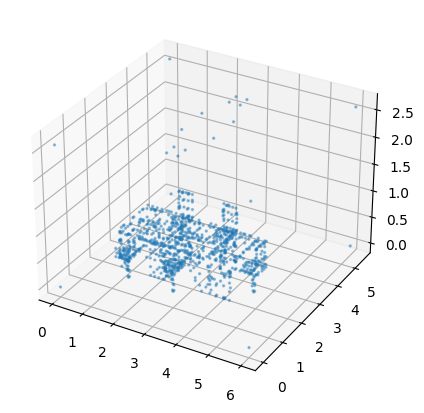

In [16]:
from matplotlib import pyplot as plt

def plot3d_points(point_cloud):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=0.4, s=2)
    # ax.set_axis_off()
    plt.show()
    
plot3d_points(pointCloud_dict['office1']["layout"])

In [17]:
# import numpy as np
# '''
# 点群シャッフルによるデータ増強
# よく考えると無意味だと思う
# '''
# rng = np.random.default_rng()

# pointCloud_augumented_dict = {}
# for office_name, pointCloud in sampledPointCloud_dict.items():
#     pc_list = []
#     for i in range(4):
#         pc = pointCloud.copy()

#         if i >= 1:
#             #点群のシャッフル
#             rng.shuffle(pc)

#         pc_list.append(pc)

#     pointCloud_augumented_dict[office_name] = pc_list

# pointCloud_augumented_dict

In [18]:
# plot3d_points(pointCloud_augumented_dict['office10'][0])
# plot3d_points(pointCloud_augumented_dict['office10'][1])
# plot3d_points(pointCloud_augumented_dict['office10'][2])
# plot3d_points(pointCloud_augumented_dict['office10'][3])

In [19]:
# def get_augumented_dataset():
#     '''
#     点群データ増強に合わせて、メタデータや感染リスク分布のデータも複製して増やす
#     '''
#     case_index_list = list(df_total.index)
#     # case_index_list = list(df_total["casename"])


#     case_index_augumented_list = []

#     pointCloudArray_list = []
#     metaArray_list = []

#     RoI_list = []

#     for case_index in case_index_list:
#         office_name = case_index.split('_', maxsplit=1)[0]
#         pc_list = pointCloud_augumented_dict[office_name]
#         for augumentID, pointCloud in enumerate(pc_list):
#             case_index_augumented_list.append(case_index + '-' + str(augumentID))
#             pointCloudArray_list.append(pointCloud)
#             metaArray_list.append(df_meta_standardized.loc[case_index])
#             # RoI_list.append(df_total["RoI"].loc[case_index])
#             RoI_list.append(df_total["count_timeMean"].loc[case_index])

#     case_index_array = np.array(case_index_augumented_list)
#     metaArray = np.array(metaArray_list)
#     RoIArray = np.array(RoI_list)

#     pointCloudArray = np.array(pointCloudArray_list)
    
#     return case_index_array, pointCloudArray, metaArray, RoIArray

# X_index, X_pc, X_meta, y = get_augumented_dataset()

In [54]:
pointCloud_dict['office1']["layout"]

array([[0.    , 0.    , 0.    ],
       [0.    , 0.    , 2.6   ],
       [0.    , 5.5   , 0.    ],
       ...,
       [1.72  , 3.485 , 0.53  ],
       [4.475 , 2.85  , 0.5375],
       [0.975 , 1.525 , 0.2125]], dtype=float32)

In [55]:
a = np.tile(pointCloud_dict['office1']["layout"], (3,1,1))
a

array([[[0.    , 0.    , 0.    ],
        [0.    , 0.    , 2.6   ],
        [0.    , 5.5   , 0.    ],
        ...,
        [1.72  , 3.485 , 0.53  ],
        [4.475 , 2.85  , 0.5375],
        [0.975 , 1.525 , 0.2125]],

       [[0.    , 0.    , 0.    ],
        [0.    , 0.    , 2.6   ],
        [0.    , 5.5   , 0.    ],
        ...,
        [1.72  , 3.485 , 0.53  ],
        [4.475 , 2.85  , 0.5375],
        [0.975 , 1.525 , 0.2125]],

       [[0.    , 0.    , 0.    ],
        [0.    , 0.    , 2.6   ],
        [0.    , 5.5   , 0.    ],
        ...,
        [1.72  , 3.485 , 0.53  ],
        [4.475 , 2.85  , 0.5375],
        [0.975 , 1.525 , 0.2125]]], dtype=float32)

In [178]:
def get_officeDataset(officename_list:list, df_core:pd.DataFrame, pointCloud_dict:dict, shuffle:bool):
    """
    Return a certain office Dataset.
    You can specify List of offices.
    """
    
    df_main = pd.DataFrame()
    
    for officename in officename_list:
        df = df_core[ df_core["office"]==officename ]
        df_main = pd.concat([df_main, df])
        
    if shuffle:
        df_main = df_main.sample(frac=1, random_state=0)
        
    # meke Dictionary of pointCloudList in order of MainDataFrame
    pc_list_dict = {"aircon":[], "airvent":[], "body":[], "layout":[], }
    for officename in df_main["office"]:
        for key, pc_list in pc_list_dict.items():
            pc_list.append(pointCloud_dict[officename][key])
            
    # make input-Dictionary and to ND-Array
    input_dict = {"meta":df_main[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off", ]]}
    for key, pc in pc_list_dict.items():
        input_dict[f"pointCloud_{key}"] = np.array(pc)
                
    return input_dict, df_main["countTimeMean_sit2stand"]
        

In [179]:
X_dict, y = get_officeDataset(["office1", "office2"], df_ml, pointCloud_dict, shuffle=True)

In [180]:
X_dict

{'meta':                         aircon  ventilation  exhaust_a  exhaust_b  exhaust_off
 case_name                                                                     
 office1_960_123_aout  1.278731    -0.200715   1.147695  -0.871311    -0.398249
 office2_660_246_aout  0.446455     1.265523   1.147695  -0.871311    -0.398249
 office1_960_41_aout   1.278731    -1.178206   1.147695  -0.871311    -0.398249
 office1_960_246_aout  1.278731     1.265523   1.147695  -0.871311    -0.398249
 office1_960_205_aout  1.278731     0.776777   1.147695  -0.871311    -0.398249
 ...                        ...          ...        ...        ...          ...
 office2_660_82_bout   0.446455    -0.689460  -0.871311   1.147695    -0.398249
 office1_0_164_aout   -1.384552     0.288031   1.147695  -0.871311    -0.398249
 office2_960_246_bout  1.278731     1.265523  -0.871311   1.147695    -0.398249
 office2_360_164_aout -0.385821     0.288031   1.147695  -0.871311    -0.398249
 office2_0_82_aout    -1.384552 

In [181]:
y

case_name
office1_960_123_aout    1618.426622
office2_660_246_aout    2795.364393
office1_960_41_aout     1062.150416
office1_960_246_aout    1405.492845
office1_960_205_aout    1454.552745
                           ...     
office2_660_82_bout     2061.518802
office1_0_164_aout      2503.411647
office2_960_246_bout    1970.486855
office2_360_164_aout    1508.189684
office2_0_82_aout       4003.190349
Name: countTimeMean_sit2stand, Length: 67, dtype: float64

In [153]:
# def get_dataset(df_main, df_meta):
#     '''
#     説明変数と目的変数をNDArrayに変換する
#     '''
    
#     pc_aircon_list = []
#     pc_airvent_list = []
#     pc_body_list = []
#     pc_layout_list = []
    
#     metaArray_list = []

#     RoI_list = []

#     for index, row in df_total.iterrows():
#         office_name = row["office"]
#         pc_aircon_list.append(pointCloud_dict[office_name]["aircon"])
#         pc_airvent_list.append(pointCloud_dict[office_name]["airvent"])
#         pc_body_list.append(pointCloud_dict[office_name]["body"])
#         pc_layout_list.append(pointCloud_dict[office_name]["layout"])
        
#         metaArray_list.append(df_meta_standardized.loc[index])
            
#         RoI_list.append(df_main["countTimeMean_sit2stand"].loc[index])
#         # RoI_list.append(df_main["count_timeMean"].loc[case_index])

#     officename_array = df_total["office"].to_numpy()
#     metaArray = np.array(metaArray_list)
#     RoIArray = np.array(RoI_list)

#     pc_aircon_array = np.array(pc_aircon_list)
#     pc_airvent_array = np.array(pc_airvent_list)
#     pc_body_array = np.array(pc_body_list)
#     pc_layout_array = np.array(pc_layout_list)
    
#     pc_array_dict = {"aircon":pc_aircon_array, "airvent":pc_airvent_array, "body":pc_body_array, "layout":pc_layout_array}
    
#     return officename_array, pc_array_dict, metaArray, RoIArray.reshape(-1,1)


In [156]:
# X_officename, X_pc_dict, X_meta, y = get_dataset(df_total, df_meta)

# # print(X_pc.max())
# # X_pc /= X_pc.max() #Normalization
# # print(X_pc.max())

# for key, X_pc in X_pc_dict.items():
#     #Standardization
#     X_pc_dict[key] = ( X_pc - X_pc.mean() ) / X_pc.std()
    
    
# # l_mul = map(lambda X_pc: ( X_pc - X_pc.std() ) / X_pc.std(), X_pc_list)
# # # print(list(l_mul))

# # X_pc_airvent.std()

In [157]:
import sys

def standardization_test(X:np.ndarray):
    """
    標準化されているかをテスト
    """
    threshold = 1.e-5
    
    if abs(X.mean()) > threshold:
        sys.stderr.write(f'StandardizationError: mean= {X.mean()}\n')
        
    if abs(X.std() - 1.) > threshold:
        sys.stderr.write(f'StandardizationError: std= {X.std()}')
        

In [158]:
# print(X_officename.shape)


# print("=============pointClouds=============")
# for key, X_pc in X_pc_dict.items():
#     standardization_test(X_pc)
#     print(key)
#     print(X_pc.shape, X_pc.mean(), X_pc.var())
# print("=====================================")
    
# print(X_meta.shape, X_meta.mean(), X_meta.var())

# print(y.shape, y.mean(), y.var())

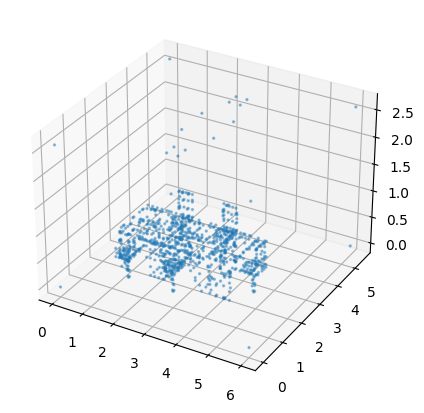

In [159]:
plot3d_points(pc_array_dict["layout"][0, :,:])

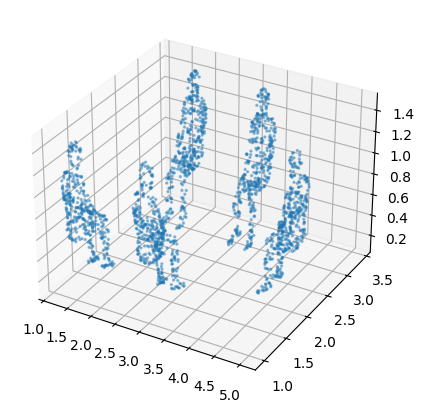

In [160]:
plot3d_points(pc_array_dict["body"][0, :,:])

# チューニング

In [162]:
office_list = list(df_total["office"].unique())

office_list

['office2',
 'office15',
 'office14',
 'office1',
 'office22',
 'office6',
 'office4',
 'office16',
 'office8',
 'office9',
 'office7',
 'office10',
 'office28',
 'office5',
 'office3']

In [163]:
# test_office_list = ["office1", "office7", "office10", "office16", "office22", "office28", ]
test_office_list = ["office1", "office7", "office10", "office16", "office22", "office28", ]

In [164]:
from tensorflow.python.client import device_lib; print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3595781587326386439
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9985785856
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3386973394566133836
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2022-12-17 01:01:32.356723: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-17 01:01:32.873534: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /device:GPU:0 with 9523 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [165]:
# def conv_bn(x, filters):
#     x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
#     x = layers.BatchNormalization(momentum=0.0)(x)
#     return layers.Activation("relu")(x)


In [182]:
from tensorflow import keras
import PointNet

def myPointNet(trial, input_pointCloud:keras.Input, suffix:str):
    
    hp_conv_layers = trial.suggest_int(f'conv_layers_{suffix}', 1, 3, step=1)
    
    x = input_pointCloud
    for i in range(hp_conv_layers):
        hp_filters = trial.suggest_int(f'filters_{suffix}-{i}', 32, 256, step=32)
        
        x = PointNet.conv_bn(x, hp_filters)
        
#         x = keras.layers.Conv1D(hp_filters, kernel_size=1, padding="valid")(x)
#         x = keras.layers.BatchNormalization(momentum=0.99)(x)       
#         x = keras.layers.ReLU()(x)
    
    return keras.layers.GlobalMaxPooling1D()(x)

In [193]:
from PointNet import conv_bn
from tensorflow import keras

db_path = '/mnt/MachineLearning/OptunaLog/separatePointCloud_study_timeMean_sit2stand.db'


def total_model_builder(trial):
    """
    感染リスク分布予測モデル

    順序不変性モデルに、メタデータ（空調条件）を合流させ、MLPで感染リスク予測

    KerasTunerから呼び出され、ハイパーパラメータをチューニングする
    """
    input_meta = keras.Input(shape=(X_meta.shape[1], ), name='meta')
    
    input_list = [input_meta]
    features_list = [input_meta]
    for key, X_pc in X_pc_dict.items():
        input_pc = keras.Input(shape=(X_pc.shape[1], 3), name=f'pointCloud_{key}')
        
        # append pointClouds to input_list
        input_list.append(input_pc)
        
        # append feturesOfPointClouds to features_list
        features_list.append(myPointNet(trial, input_pointCloud=input_pc, suffix=key))
        
    
    x = keras.layers.Concatenate()(features_list)
    
    hp_dense_layers = trial.suggest_int('dense_layers', 0, 4, step=1)
    if hp_dense_layers > 0:
        hp_activation = trial.suggest_categorical('activation', ["ReLU", "LeakyReLU", "ELU"])
        hp_dropout = trial.suggest_categorical('dropout', [None, 0.3, 0.5])
    
    for i in range(hp_dense_layers):
        hp_units = trial.suggest_int(f'units-{i}', 64, 512, step=64)
        x = keras.layers.Dense(hp_units)(x)
        
        if hp_activation == "ReLU":
            x = keras.layers.ReLU()(x)
        elif hp_activation == "LeakyReLU":
            x = keras.layers.LeakyReLU()(x)
        elif hp_activation == "ELU":
            x = keras.layers.ELU()(x)
            
        if hp_dropout is not None:
            x = keras.layers.Dropout(hp_dropout)(x)

    outputs = keras.layers.Dense(1)(x)

#     hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    hp_learning_rate = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    model = keras.Model(inputs=input_list, outputs=outputs, name="predictionnet")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
#         optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
        loss='mse',
        metrics=['mae']
        )

    return model


from tensorflow.keras.callbacks import EarlyStopping
import optuna
from keras.backend import clear_session

# 1. Define an objective function to be maximized.
# def objective(trial, X_dict_train, y_train, X_dict_val, y_val):
def objective(trial, fit_office_list, val_office_list):
    # Clear clutter from previous Keras session graphs.
    clear_session()
    
    mse_max_list = []
    for val_office in val_office_list:
        
        train_office_list = [office for office in fit_office_list if office != val_office]
    
        X_dict_train, y_train = get_officeDataset(train_office_list, df_ml, pointCloud_dict, shuffle=True)
        X_dict_val, y_val = get_officeDataset([val_office], df_ml, pointCloud_dict, shuffle=False)
    
        model = total_model_builder(trial)

        hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 32, 64, 128, 256])
    #     hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 64, 128, 256, 512])

        history = model.fit(
            X_dict_train, y_train,
            validation_data = (X_dict_val, y_val),
            epochs = 200,
            batch_size=hp_batch_size,
            callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10)],
            verbose=False,
        )

        #履歴の最後の１０エポック
        val_loss_list = history.history['val_loss'][-10:] #List of MSE
        
        # evaluate = model.evaluate({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val, verbose=0)

        mse_max = np.max(val_loss_list) #終盤の誤差の最大値（振動抑制が目的）
        mse_max_list.append(mse_max)
        
        print("(train, val): ", ([s.replace('office', '') for s in train_office_list], val_office), mse_max)

    #交差検証の結果の平均値を目的関数
    return np.mean(mse_max_list)#, np.mean(mse_min_list)


In [194]:
"""
最終テスト用オフィスを切り替えながらチューニング実行
"""

for test_office in test_office_list:
    print("test_office:", test_office)
    
    study_name = test_office + '_is_test'

    # 3. Create a study object and optimize the objective function.
    # study = optuna.create_study(direction='minimize')
    study = optuna.create_study(
        sampler=optuna.samplers.RandomSampler(),
        direction='minimize',
        study_name=study_name,
        storage='sqlite:///'+db_path,
        load_if_exists=True
    )
    
    fit_office_list = [office for office in office_list if office != test_office]
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]

    study.optimize(
        lambda trial: objective(trial, fit_office_list, val_office_list),
        n_trials=100,
        gc_after_trial=True
    )


[I 2022-12-17 01:45:39,951] Using an existing study with name 'office1_is_test' instead of creating a new one.


test_office: office1
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 607459.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1285222.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2188970.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 432713.4375


[I 2022-12-17 01:46:29,956] Trial 12 finished with value: 1024043.175 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 160, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 192, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 0.020245827408257935, 'batch_size': 16}. Best is trial 5 with value: 540119.525.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 605850.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1539787.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 5929845.5
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3456473.25
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 4031388.25


[I 2022-12-17 01:51:54,488] Trial 13 finished with value: 3188599.3375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 160, 'filters_aircon-2': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 96, 'filters_airvent-2': 160, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 128, 'filters_layout-2': 160, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 256, 'units-2': 192, 'units-3': 192, 'lr': 0.002599761194112402, 'batch_size': 1}. Best is trial 5 with value: 540119.525.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 985501.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 698639.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1013766.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4097771.75
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 443835.8125


[I 2022-12-17 01:53:58,230] Trial 14 finished with value: 1335732.60625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 128, 'filters_aircon-2': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 96, 'filters_airvent-2': 224, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 192, 'filters_body-2': 32, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.0021419273494770984, 'batch_size': 4}. Best is trial 5 with value: 540119.525.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 424649.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3878138.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 6027464.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 7951742.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 7517763.5


[I 2022-12-17 01:57:13,557] Trial 15 finished with value: 6226716.0 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'filters_airvent-2': 96, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 160, 'filters_body-2': 128, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 64, 'filters_layout-2': 256, 'dense_layers': 0, 'lr': 0.00043179210113882183, 'batch_size': 1}. Best is trial 5 with value: 540119.525.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 5758471.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 411407.53125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1130518.75
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 572837.75
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1233710.625


[I 2022-12-17 01:58:04,674] Trial 16 finished with value: 717636.225 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'filters_airvent-2': 128, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 32, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 96, 'filters_layout-2': 192, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'lr': 5.465886817020976e-05, 'batch_size': 16}. Best is trial 5 with value: 540119.525.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 239706.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 332938.03125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 956850.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 537150.875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1302358.375


[I 2022-12-17 01:59:09,883] Trial 17 finished with value: 697119.18125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 224, 'filters_body-2': 32, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 96, 'filters_layout-2': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 384, 'lr': 0.0001461226848362581, 'batch_size': 256}. Best is trial 5 with value: 540119.525.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 356297.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 444067.40625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1111270.375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 495804.46875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 486775.53125


[I 2022-12-17 02:01:46,443] Trial 18 finished with value: 579873.1875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 32, 'filters_aircon-2': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 192, 'lr': 0.0006811302422827734, 'batch_size': 4}. Best is trial 5 with value: 540119.525.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 361448.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 981254.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1928423.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1846315.125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 650609.375


[I 2022-12-17 02:02:46,536] Trial 19 finished with value: 1150301.65625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 32, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 64, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 128, 'filters_body-2': 256, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 224, 'filters_layout-2': 256, 'dense_layers': 0, 'lr': 0.038109288121368594, 'batch_size': 16}. Best is trial 5 with value: 540119.525.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 344905.90625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 342803.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 788806.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 510201.8125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1432625.75


[I 2022-12-17 02:03:07,752] Trial 20 finished with value: 733602.75 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 448, 'units-1': 128, 'units-2': 384, 'lr': 0.004405253370502338, 'batch_size': 64}. Best is trial 5 with value: 540119.525.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 593575.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 785600.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1908033.375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 407832.46875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1161166.375


[I 2022-12-17 02:04:16,104] Trial 21 finished with value: 958530.05625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 32, 'filters_layout-2': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 512, 'units-1': 448, 'lr': 9.009323121412804e-05, 'batch_size': 4}. Best is trial 5 with value: 540119.525.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 530017.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 471394.53125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1216973.375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 299213.40625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1234589.25


[I 2022-12-17 02:04:49,870] Trial 22 finished with value: 727591.1 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 160, 'filters_airvent-2': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 32, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 256, 'filters_layout-2': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'lr': 0.0009867989652794693, 'batch_size': 128}. Best is trial 5 with value: 540119.525.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 415784.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 416348.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 373750.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3131486.75
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 333422.40625


[I 2022-12-17 02:06:25,346] Trial 23 finished with value: 977294.43125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 96, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'units-1': 192, 'units-2': 384, 'lr': 0.010331345129838682, 'batch_size': 4}. Best is trial 5 with value: 540119.525.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 631464.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1998098.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 4123598.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 5566892.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 5868669.5


[I 2022-12-17 02:11:35,324] Trial 24 finished with value: 3946993.45 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 64, 'filters_aircon-2': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 256, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 384, 'units-2': 448, 'lr': 0.0003098147629838371, 'batch_size': 1}. Best is trial 5 with value: 540119.525.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2177708.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 4140313.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2608954.75
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3308308.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2395280.25


[I 2022-12-17 02:13:44,309] Trial 25 finished with value: 3335490.9 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 64, 'filters_airvent-2': 96, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 64, 'filters_body-2': 32, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'lr': 1.3934544220290675e-05, 'batch_size': 256}. Best is trial 5 with value: 540119.525.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 4224597.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1274997.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 562198.625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 971528.1875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1049682.125


[I 2022-12-17 02:14:19,552] Trial 26 finished with value: 976872.375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 256, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 64, 'units-2': 320, 'lr': 0.047115507329425335, 'batch_size': 128}. Best is trial 5 with value: 540119.525.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1025955.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.0369951848136704e+16
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 135193096617984.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 34667436703744.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3197018570752.0


[I 2022-12-17 02:16:19,518] Trial 27 finished with value: 1.899964691424215e+16 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 96, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 384, 'units-2': 448, 'units-3': 64, 'lr': 0.030709671259621783, 'batch_size': 1}. Best is trial 5 with value: 540119.525.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 7.445522517118157e+16
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 466825.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 817289.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 541507.9375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 776812.1875


[I 2022-12-17 02:16:49,627] Trial 28 finished with value: 603681.11875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 32, 'filters_body-2': 64, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 448, 'lr': 0.0004023072739001627, 'batch_size': 16}. Best is trial 5 with value: 540119.525.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 415970.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3266162.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 3626617.25
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 8147363.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 14559913.0


[I 2022-12-17 02:19:38,079] Trial 29 finished with value: 9162910.15 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 160, 'filters_airvent-2': 96, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 96, 'filters_body-2': 128, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 128, 'filters_layout-2': 32, 'dense_layers': 0, 'lr': 0.003510706997747531, 'batch_size': 1}. Best is trial 5 with value: 540119.525.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 16214495.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 601011.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 996958.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 594639.25
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 561498.875


[I 2022-12-17 02:20:50,031] Trial 30 finished with value: 699484.0625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 160, 'filters_airvent-2': 256, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 256, 'filters_layout-2': 160, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'units-2': 128, 'lr': 0.0009292832786134224, 'batch_size': 16}. Best is trial 5 with value: 540119.525.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 743312.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 459533.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 606662.125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 460764.71875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 626813.875


[I 2022-12-17 02:22:12,556] Trial 31 finished with value: 495543.7125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 192, 'lr': 1.1663640768009589e-05, 'batch_size': 16}. Best is trial 31 with value: 495543.7125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 323944.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 541215.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1550849.75
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 396293.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 693600.625


[I 2022-12-17 02:23:00,457] Trial 32 finished with value: 737547.05 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 160, 'filters_layout-2': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 192, 'units-2': 256, 'units-3': 256, 'lr': 0.024914488911311605, 'batch_size': 32}. Best is trial 31 with value: 495543.7125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 505776.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 401508.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1231611.375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 260247.375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1465447.75


[I 2022-12-17 02:23:32,781] Trial 33 finished with value: 728545.86875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 256, 'filters_aircon-2': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 224, 'filters_airvent-2': 64, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 192, 'lr': 0.0011446446843996823, 'batch_size': 256}. Best is trial 31 with value: 495543.7125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 283914.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 423574.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 674285.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 243497.734375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 645294.6875


[I 2022-12-17 02:24:06,990] Trial 34 finished with value: 485851.253125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 0, 'lr': 0.007758708409267647, 'batch_size': 256}. Best is trial 34 with value: 485851.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 442603.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 580005.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 752217.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 557795.375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 753542.875


[I 2022-12-17 02:24:38,815] Trial 35 finished with value: 587760.15 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'filters_aircon-2': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 160, 'filters_airvent-2': 128, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 192, 'filters_layout-2': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 128, 'lr': 0.030326344242482022, 'batch_size': 128}. Best is trial 34 with value: 485851.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 295239.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 324287.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 631508.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 271242.1875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 680511.875


[I 2022-12-17 02:26:50,525] Trial 36 finished with value: 423797.965625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 192, 'filters_airvent-2': 128, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 96, 'filters_body-2': 192, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 128, 'units-2': 128, 'units-3': 448, 'lr': 2.8259878765180393e-05, 'batch_size': 128}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 211439.234375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 525720.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 6012171.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 21882304.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 13807355.0


[I 2022-12-17 02:29:04,760] Trial 37 finished with value: 9197329.2875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'units-1': 384, 'units-2': 192, 'units-3': 192, 'lr': 0.005756848384124368, 'batch_size': 1}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3759095.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 383873.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 966092.5
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 271312.4375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1145946.5


[I 2022-12-17 02:29:58,111] Trial 38 finished with value: 634997.35 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 64, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 96, 'filters_layout-2': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'units-2': 192, 'lr': 0.0004389711899681173, 'batch_size': 256}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 407761.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 534595.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 557378.375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 446482.96875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 487897.75


[I 2022-12-17 02:32:11,179] Trial 39 finished with value: 454247.428125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 128, 'filters_airvent-2': 160, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00016839085426548634, 'batch_size': 256}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 244882.609375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 507123.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 837905.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 507018.71875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1248281.75


[I 2022-12-17 02:33:03,572] Trial 40 finished with value: 692780.34375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 192, 'filters_aircon-2': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 160, 'filters_airvent-2': 128, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'lr': 0.0006702229249864257, 'batch_size': 32}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 363571.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1906306.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 526587.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 834261.0625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 851907.5


[I 2022-12-17 02:34:27,514] Trial 41 finished with value: 1140671.85 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 64, 'filters_aircon-2': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 192, 'filters_airvent-2': 160, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 192, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'units-2': 384, 'units-3': 512, 'lr': 0.003842657066289548, 'batch_size': 4}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1584297.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 796792.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1043642.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 290533.9375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 511218.84375


[I 2022-12-17 02:37:38,884] Trial 42 finished with value: 621812.3 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 64, 'filters_aircon-2': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 64, 'filters_body-2': 256, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 256, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 512, 'lr': 0.00026511522031595944, 'batch_size': 4}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 466874.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 329996.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 939176.125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 722682.3125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 463177.5625


[I 2022-12-17 02:38:26,724] Trial 43 finished with value: 605029.25 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 192, 'filters_aircon-2': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 224, 'filters_airvent-2': 192, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 128, 'units-2': 320, 'units-3': 64, 'lr': 0.04019871046573366, 'batch_size': 64}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 570113.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 867717.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1297279.625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 604038.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 767174.5625


[I 2022-12-17 02:39:01,402] Trial 44 finished with value: 823829.2375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 64, 'filters_body-2': 192, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 192, 'dense_layers': 0, 'lr': 0.08246933794001055, 'batch_size': 32}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 582936.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 415672.90625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 970714.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 369421.84375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1471553.375


[I 2022-12-17 02:39:30,450] Trial 45 finished with value: 725009.7 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 32, 'filters_aircon-2': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 256, 'filters_airvent-2': 192, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 256, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 256, 'lr': 0.0051628008941631675, 'batch_size': 128}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 397686.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 437272.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1010699.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 871816.125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1295767.25


[I 2022-12-17 02:41:01,885] Trial 46 finished with value: 828128.95 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 128, 'filters_aircon-2': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 160, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 256, 'lr': 0.00022324237633440517, 'batch_size': 4}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 525089.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 746613.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1039299.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1583559.625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 532160.5625


[I 2022-12-17 02:42:49,477] Trial 47 finished with value: 854966.48125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 192, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 256, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 448, 'lr': 0.0003959025623505702, 'batch_size': 4}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 373198.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 382419.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 868266.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 506477.75
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 556647.375


[I 2022-12-17 02:43:19,369] Trial 48 finished with value: 614924.93125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 512, 'units-2': 128, 'lr': 0.0046443235945782275, 'batch_size': 128}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 760813.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 400293.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1105843.125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 304132.28125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1583803.0


[I 2022-12-17 02:43:51,895] Trial 49 finished with value: 744502.88125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 32, 'filters_aircon-2': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 160, 'filters_airvent-2': 192, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'lr': 0.001167517916374245, 'batch_size': 64}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 328442.71875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 364960.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 646777.375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 303537.8125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2038236.25


[I 2022-12-17 02:44:12,187] Trial 50 finished with value: 715725.40625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 224, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'lr': 0.0006843396923071765, 'batch_size': 128}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 225115.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 406634.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 920675.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 544549.5625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1053408.375


[I 2022-12-17 02:45:00,662] Trial 51 finished with value: 648604.175 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 64, 'filters_body-2': 96, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 192, 'filters_layout-2': 192, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 192, 'units-2': 128, 'lr': 0.00013500078301769, 'batch_size': 16}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 317752.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 637168.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 913218.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1455402.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 678338.6875


[I 2022-12-17 02:45:52,762] Trial 52 finished with value: 992697.7375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'filters_aircon-2': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 0, 'lr': 0.0006309905136929915, 'batch_size': 16}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1279361.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1188017.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1029251.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 716670.6875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 375145.9375


[I 2022-12-17 02:46:25,222] Trial 53 finished with value: 1064490.2375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 96, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 160, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 192, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 320, 'units-2': 448, 'lr': 0.02060184738590148, 'batch_size': 64}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2013366.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 510725.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 5953964.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 637917.0625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1677427.75


[I 2022-12-17 02:49:14,481] Trial 54 finished with value: 3926180.59375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 64, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 320, 'lr': 0.039302489958846755, 'batch_size': 1}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 10850869.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 351775.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1079138.375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 499100.65625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1385609.125


[I 2022-12-17 02:49:54,707] Trial 55 finished with value: 706937.021875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 192, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 224, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 512, 'lr': 0.00015286351580580466, 'batch_size': 64}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 219061.484375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 719381.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1466951.75
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 724244.625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 398910.03125


[I 2022-12-17 02:51:32,924] Trial 56 finished with value: 842822.18125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 256, 'filters_airvent-2': 256, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 64, 'filters_layout-2': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 64, 'units-2': 256, 'units-3': 128, 'lr': 0.0008014365110831766, 'batch_size': 4}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 904623.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 741401.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 746146.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 373019.03125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 4389264.5


[I 2022-12-17 02:52:11,854] Trial 57 finished with value: 1298988.171875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 64, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 224, 'filters_layout-2': 96, 'dense_layers': 0, 'lr': 0.07498704324032138, 'batch_size': 128}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 245108.703125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 646010.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 821523.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 491655.53125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 613362.125


[I 2022-12-17 02:53:00,654] Trial 58 finished with value: 601062.25 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 160, 'filters_layout-2': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 512, 'lr': 0.0003975990338258408, 'batch_size': 16}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 432760.03125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 468262.03125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1018106.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 537940.0625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 574349.1875


[I 2022-12-17 02:53:48,662] Trial 59 finished with value: 612911.6 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 160, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.0018259633775645264, 'batch_size': 16}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 465900.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 243175.015625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 880732.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 532946.75
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 587387.8125


[I 2022-12-17 02:54:49,796] Trial 60 finished with value: 548263.496875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 256, 'filters_aircon-2': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 32, 'filters_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 512, 'lr': 0.0006360504343312, 'batch_size': 16}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 497075.59375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 504292.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1062320.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 736713.1875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 603257.875


[I 2022-12-17 02:55:44,372] Trial 61 finished with value: 679579.70625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 160, 'filters_aircon-2': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 256, 'filters_airvent-2': 64, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 96, 'filters_body-2': 64, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 256, 'filters_layout-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.0022678393175713236, 'batch_size': 32}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 491314.59375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1613698.625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1385337.625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 7834124.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 8732250.0


[I 2022-12-17 02:58:59,224] Trial 62 finished with value: 5413148.65 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 128, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 192, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 128, 'units-2': 64, 'lr': 0.00027962531438792957, 'batch_size': 1}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 7500333.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 396084.59375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 829385.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 394994.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1021510.3125


[I 2022-12-17 02:59:33,641] Trial 63 finished with value: 585141.7875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'lr': 0.00024800933989778043, 'batch_size': 32}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 283734.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2549121.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1528094.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3152073.25
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2075768.0


[I 2022-12-17 03:02:17,651] Trial 64 finished with value: 2649566.65 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 192, 'filters_aircon-2': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 192, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 0, 'lr': 3.427585571408057e-05, 'batch_size': 16}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3942776.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 719403.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 859453.375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 390199.46875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 728251.4375


[I 2022-12-17 03:02:47,085] Trial 65 finished with value: 642460.49375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 192, 'filters_airvent-2': 160, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 256, 'dense_layers': 0, 'lr': 0.07081501136791657, 'batch_size': 64}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 514994.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 886156.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 944215.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3869437.75
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 750775.3125


[I 2022-12-17 03:03:22,011] Trial 66 finished with value: 1362450.05625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 128, 'filters_layout-2': 32, 'dense_layers': 0, 'lr': 0.052620881509101235, 'batch_size': 32}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 361664.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 328760.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 709265.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 292826.40625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 543813.9375


[I 2022-12-17 03:04:20,137] Trial 67 finished with value: 450676.08125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 32, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 96, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 32, 'dense_layers': 0, 'lr': 0.005912378294711977, 'batch_size': 256}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 378713.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 578325.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 608599.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 484454.15625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 549151.0


[I 2022-12-17 03:09:26,366] Trial 68 finished with value: 548999.19375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 224, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 0, 'lr': 2.7378015079387593e-05, 'batch_size': 4}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 524465.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 267472.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 737925.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 436135.4375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 600948.625


[I 2022-12-17 03:09:57,965] Trial 69 finished with value: 536096.325 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 256, 'units-2': 448, 'lr': 0.00579602995599827, 'batch_size': 256}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 637999.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 849206.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 792608.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 850457.375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 541551.625


[I 2022-12-17 03:10:43,486] Trial 70 finished with value: 679129.1375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 256, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 96, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 192, 'filters_body-2': 160, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 0, 'lr': 0.012813069184119629, 'batch_size': 128}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 361822.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 357790.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 923490.625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 246036.59375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1284470.625


[I 2022-12-17 03:11:27,041] Trial 71 finished with value: 607373.2625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 32, 'filters_aircon-2': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 512, 'units-2': 512, 'units-3': 128, 'lr': 5.467899879720922e-05, 'batch_size': 64}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 225078.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 333374.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 759902.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 292139.6875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 833508.375


[I 2022-12-17 03:12:33,591] Trial 72 finished with value: 483977.528125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 256, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 160, 'filters_layout-2': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 448, 'units-2': 320, 'lr': 2.618742517160842e-05, 'batch_size': 64}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 200962.328125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 372385.96875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 714722.625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3088431.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 468244.34375


[I 2022-12-17 03:13:04,675] Trial 73 finished with value: 1100026.975 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 32, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 224, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'lr': 0.028042096803572062, 'batch_size': 256}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 856350.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 494294.03125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 868376.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 445448.40625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 491687.03125


[I 2022-12-17 03:14:16,802] Trial 74 finished with value: 539319.45 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 192, 'filters_aircon-2': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 96, 'filters_airvent-2': 64, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 96, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 160, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 256, 'units-2': 320, 'lr': 0.0020608509118747237, 'batch_size': 32}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 396791.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 389890.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 775472.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 287318.65625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 800650.6875


[I 2022-12-17 03:14:59,951] Trial 75 finished with value: 531926.76875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 32, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 128, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.00014457449833551325, 'batch_size': 32}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 406301.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 348297.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 842790.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 330167.8125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1012357.6875


[I 2022-12-17 03:15:53,386] Trial 76 finished with value: 559586.2625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 96, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 224, 'filters_layout-2': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.00022668372826777422, 'batch_size': 64}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 264317.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3089287.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 865753.5
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 19224944.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1316925.75


[I 2022-12-17 03:19:38,629] Trial 77 finished with value: 5303673.475 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 160, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 512, 'units-2': 384, 'units-3': 512, 'lr': 0.003286368105918515, 'batch_size': 1}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2021456.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2545924.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 5474513.5
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 8170486.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 13000818.0


[I 2022-12-17 03:22:17,707] Trial 78 finished with value: 12391832.05 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 96, 'filters_layout-2': 160, 'dense_layers': 0, 'lr': 0.01166802546571554, 'batch_size': 1}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 32767418.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 739176.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 727170.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 343212.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 927522.5


[I 2022-12-17 03:22:49,524] Trial 79 finished with value: 668954.0375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 128, 'filters_aircon-2': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 128, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.05324320566223236, 'batch_size': 128}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 607689.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 368273.40625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 946584.5
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3241677.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 759205.9375


[I 2022-12-17 03:23:58,883] Trial 80 finished with value: 1436442.14375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 160, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 64, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 256, 'filters_body-2': 96, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 512, 'units-2': 192, 'units-3': 256, 'lr': 0.05989080874979524, 'batch_size': 4}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1866469.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 369315.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 920906.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 421350.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 752530.3125


[I 2022-12-17 03:24:46,874] Trial 81 finished with value: 554318.69375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 32, 'filters_body-2': 256, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 384, 'lr': 6.515892754538887e-05, 'batch_size': 32}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 307491.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 410797.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1394181.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 327939.03125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1748643.75


[I 2022-12-17 03:25:17,141] Trial 82 finished with value: 937934.55625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 128, 'filters_aircon-2': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'filters_airvent-2': 128, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 64, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 448, 'units-2': 320, 'units-3': 256, 'lr': 0.00023790869740810774, 'batch_size': 256}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 808111.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 5614184.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 6384014.5
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 6164137.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 4973024.0


[I 2022-12-17 03:28:29,210] Trial 83 finished with value: 7258494.8 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 256, 'filters_body-2': 64, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 512, 'lr': 0.00013938124752216355, 'batch_size': 1}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 13157114.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 445240.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 843958.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 563392.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1158432.875


[I 2022-12-17 03:29:21,135] Trial 84 finished with value: 649611.575 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 32, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 128, 'filters_layout-2': 256, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'lr': 4.5892864284611484e-05, 'batch_size': 32}. Best is trial 36 with value: 423797.965625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 237033.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 328051.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 582937.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 238773.40625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 547182.9375


[I 2022-12-17 03:30:42,079] Trial 85 finished with value: 391548.253125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 64, 'filters_airvent-2': 256, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 32, 'filters_body-2': 160, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 128, 'lr': 0.00017895769457958164, 'batch_size': 128}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 260795.890625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 503630.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 659869.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 287770.28125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 596503.75


[I 2022-12-17 03:31:16,721] Trial 86 finished with value: 472053.1625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 160, 'filters_aircon-2': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 256, 'filters_airvent-2': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 256, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 320, 'lr': 0.003501328770927771, 'batch_size': 128}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 312492.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 965098.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 728349.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 426251.78125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 705147.875


[I 2022-12-17 03:32:06,054] Trial 87 finished with value: 697383.79375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 128, 'filters_body-2': 96, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 32, 'filters_layout-2': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 128, 'lr': 0.02715114762416677, 'batch_size': 64}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 662071.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 261486.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 930611.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 363970.9375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1015897.375


[I 2022-12-17 03:33:02,671] Trial 88 finished with value: 615102.65 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 160, 'filters_airvent-2': 32, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 160, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 384, 'units-2': 64, 'units-3': 128, 'lr': 0.0005489249501389046, 'batch_size': 32}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 503546.90625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 678498.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1255098.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 349395.34375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1384209.0


[I 2022-12-17 03:34:19,221] Trial 89 finished with value: 833770.8 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 192, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 192, 'filters_layout-2': 256, 'dense_layers': 0, 'lr': 0.0011669273959622989, 'batch_size': 4}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 501652.09375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 381970.96875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 768650.375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 344532.46875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1331087.0


[I 2022-12-17 03:35:14,263] Trial 90 finished with value: 623812.61875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 64, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 128, 'units-2': 128, 'units-3': 128, 'lr': 2.033095620849319e-05, 'batch_size': 4}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 292822.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 659580.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 849138.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2064990.125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 502374.84375


[I 2022-12-17 03:36:04,223] Trial 91 finished with value: 874170.11875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 32, 'filters_layout-2': 128, 'dense_layers': 0, 'lr': 0.08658349743591885, 'batch_size': 16}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 294767.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 445627.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 539693.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 419552.21875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 499566.65625


[I 2022-12-17 03:37:55,614] Trial 92 finished with value: 503631.41875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 160, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 64, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 128, 'units-2': 256, 'lr': 1.0165580506475695e-05, 'batch_size': 64}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 613717.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 911673.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1056620.25
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1887542.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 533183.0625


[I 2022-12-17 03:38:45,365] Trial 93 finished with value: 972287.03125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 64, 'filters_airvent-2': 192, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 64, 'filters_body-2': 192, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 32, 'filters_layout-2': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 448, 'lr': 0.008236830274254177, 'batch_size': 32}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 472416.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 540090.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 990390.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 279476.34375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1056364.625


[I 2022-12-17 03:39:14,606] Trial 94 finished with value: 646042.05 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 128, 'filters_airvent-2': 64, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 96, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.01634461424345161, 'batch_size': 64}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 363888.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 383773.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1102382.625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 436851.84375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1526756.75


[I 2022-12-17 03:39:54,024] Trial 95 finished with value: 743573.875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 96, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 32, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 32, 'filters_layout-2': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.0012182656704140986, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 268104.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 539110.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1685423.375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 973717.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 651282.625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 255430.15625


[I 2022-12-17 03:41:57,836] Trial 96 finished with value: 820992.73125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 224, 'filters_aircon-2': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 64, 'filters_airvent-2': 96, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 32, 'dense_layers': 0, 'lr': 0.02755453919524017, 'batch_size': 4}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2050367.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2271443.5
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 5382952.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1539073.875


[I 2022-12-17 03:48:25,595] Trial 97 finished with value: 3001259.85 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 128, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 96, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 256, 'filters_layout-2': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'units-1': 320, 'lr': 0.0026640856669784556, 'batch_size': 1}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3762462.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 412290.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 768838.125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 278795.25
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1079556.0


[I 2022-12-17 03:48:59,762] Trial 98 finished with value: 569780.375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 32, 'filters_aircon-2': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 224, 'filters_airvent-2': 64, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 256, 'filters_layout-2': 128, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.0009894544770251985, 'batch_size': 64}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 309422.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 5229728.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 3578954.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3115523.75
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 6783283.5


[I 2022-12-17 03:52:09,657] Trial 99 finished with value: 4521477.3 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 256, 'filters_aircon-2': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 32, 'filters_body-2': 224, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'units-1': 128, 'units-2': 512, 'units-3': 448, 'lr': 1.8147877787942695e-05, 'batch_size': 1}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3899896.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 908305.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1280180.25
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1187236.25
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 820910.0625


[I 2022-12-17 03:52:56,151] Trial 100 finished with value: 937898.3 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 64, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 224, 'filters_layout-2': 96, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'lr': 0.02026437377630593, 'batch_size': 32}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 492859.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 389987.59375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 949516.125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 267468.8125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3313429.25


[I 2022-12-17 03:53:24,583] Trial 101 finished with value: 1060288.825 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 192, 'lr': 0.0019144137870462147, 'batch_size': 128}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 381042.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1394102.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 717769.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 843409.875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 555025.5


[I 2022-12-17 03:56:29,708] Trial 102 finished with value: 929635.0625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 256, 'filters_aircon-2': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 160, 'filters_airvent-2': 64, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 160, 'filters_layout-2': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 512, 'lr': 1.3439281909776731e-05, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1137868.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 284738.53125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 832721.5
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 610003.375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 844410.8125


[I 2022-12-17 03:58:04,411] Trial 103 finished with value: 650230.28125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 32, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 64, 'units-2': 128, 'lr': 0.0003910600436455982, 'batch_size': 4}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 679277.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 413542.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 788717.625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 311331.21875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 964078.5625


[I 2022-12-17 03:59:01,334] Trial 104 finished with value: 563442.0 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 96, 'filters_airvent-2': 160, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 256, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 128, 'filters_layout-2': 160, 'dense_layers': 0, 'lr': 0.0013832365688441922, 'batch_size': 32}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 339540.09375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 704241.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1386876.125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 797215.5625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1328490.875


[I 2022-12-17 04:00:28,662] Trial 105 finished with value: 901052.36875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 160, 'filters_aircon-2': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 96, 'filters_body-2': 96, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 192, 'units-2': 512, 'units-3': 256, 'lr': 7.079857395878807e-05, 'batch_size': 4}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 288437.71875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 560642.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 731727.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 438283.03125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 760757.125


[I 2022-12-17 04:01:08,036] Trial 106 finished with value: 552823.8625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 256, 'filters_airvent-2': 192, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 160, 'filters_body-2': 128, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 224, 'filters_layout-2': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 320, 'units-2': 192, 'lr': 0.0010814866810593857, 'batch_size': 128}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 272710.09375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 481227.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1104947.625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 290513.59375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1331570.875


[I 2022-12-17 04:01:52,929] Trial 107 finished with value: 715035.225 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 64, 'filters_airvent-2': 160, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 128, 'filters_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 448, 'lr': 0.00031103538327843664, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 366916.59375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 499714.96875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1137010.625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 600865.9375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1366643.625


[I 2022-12-17 04:03:12,870] Trial 108 finished with value: 792759.08125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 128, 'filters_body-2': 160, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'units-1': 512, 'lr': 1.4943234644587429e-05, 'batch_size': 4}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 359560.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 108673784.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 21909636.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 41651964.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 13433895.0


[I 2022-12-17 04:06:32,423] Trial 109 finished with value: 53671356.6 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 64, 'filters_airvent-2': 256, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 64, 'filters_body-2': 64, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 64, 'filters_layout-2': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 0.017362922203561656, 'batch_size': 1}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 82687504.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 355758.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 872394.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 370304.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 983698.875


[I 2022-12-17 04:07:17,875] Trial 110 finished with value: 581544.7625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 256, 'filters_layout-2': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'units-1': 256, 'units-2': 256, 'units-3': 128, 'lr': 6.341694040207918e-05, 'batch_size': 16}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 325568.71875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 753923.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 885799.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 506085.15625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 385960.84375


[I 2022-12-17 04:08:07,750] Trial 111 finished with value: 568808.14375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 96, 'filters_aircon-2': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 256, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 64, 'lr': 0.015900483787309357, 'batch_size': 128}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 312271.09375


[I 2022-12-17 04:08:08,528] A new study created in RDB with name: office7_is_test


test_office: office7
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4224321.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 3840595.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 26887744.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 9617609.0


[I 2022-12-17 04:10:13,964] Trial 0 finished with value: 10682155.35 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 192, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 256, 'units-2': 64, 'units-3': 512, 'lr': 0.0012869155973299516, 'batch_size': 1}. Best is trial 0 with value: 10682155.35.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 8840507.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 868072.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 683781.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 287991.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 557592.125


[I 2022-12-17 04:10:44,756] Trial 1 finished with value: 599636.25 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 96, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.014090676860416165, 'batch_size': 128}. Best is trial 1 with value: 599636.25.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 600744.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 791266.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1765394.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1415889.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 612420.5625


[I 2022-12-17 04:12:25,879] Trial 2 finished with value: 1143934.5125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 192, 'filters_aircon-2': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 256, 'filters_body-2': 224, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 512, 'units-2': 384, 'units-3': 64, 'lr': 0.009915862012305375, 'batch_size': 4}. Best is trial 1 with value: 599636.25.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1134700.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 759024.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 741558.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 275739.53125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 611119.875


[I 2022-12-17 04:13:18,022] Trial 3 finished with value: 540697.1625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 224, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 64, 'dense_layers': 0, 'lr': 0.00553107699374982, 'batch_size': 256}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 316042.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1305181.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1948120.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 530498.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2259720.5


[I 2022-12-17 04:15:10,655] Trial 4 finished with value: 1521432.6375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 160, 'filters_airvent-2': 64, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'units-2': 64, 'units-3': 384, 'lr': 2.623991163337844e-05, 'batch_size': 4}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1563643.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 916679.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 795103.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 267080.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 933022.375


[I 2022-12-17 04:15:47,088] Trial 5 finished with value: 630771.265625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 128, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 64, 'lr': 0.0004032802116922823, 'batch_size': 128}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 241969.890625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 759639.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1395792.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1271231.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 465804.75


[I 2022-12-17 04:17:11,481] Trial 6 finished with value: 966748.875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 256, 'lr': 0.006200025827336647, 'batch_size': 4}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 941275.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 563563.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 723342.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 351486.71875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 570251.1875


[I 2022-12-17 04:18:04,699] Trial 7 finished with value: 640490.28125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 32, 'filters_airvent-2': 64, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 256, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'units-1': 384, 'lr': 0.028637811521734134, 'batch_size': 64}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 993807.625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1030212.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1137972.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 725275.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 955413.6875


[I 2022-12-17 04:18:32,390] Trial 8 finished with value: 907944.1625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 32, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 256, 'filters_layout-2': 96, 'dense_layers': 0, 'lr': 0.013600256105922184, 'batch_size': 16}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 690846.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1263358.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1357098.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 8337208.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1283364.25


[I 2022-12-17 04:20:25,616] Trial 9 finished with value: 2582298.6 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 64, 'lr': 0.042749645801557566, 'batch_size': 4}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 670464.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 819043.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1754956.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 907732.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1932252.625


[I 2022-12-17 04:21:24,900] Trial 10 finished with value: 1188737.1375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 224, 'filters_layout-2': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'units-1': 384, 'units-2': 320, 'lr': 1.2219932757582862e-05, 'batch_size': 4}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 529700.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2249903.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2096217.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 64814532.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2052405.875


[I 2022-12-17 04:25:45,328] Trial 11 finished with value: 14585586.8 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 160, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'lr': 0.004620393082859517, 'batch_size': 1}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1714875.625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 939105.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1351021.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 982482.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2645721.25


[I 2022-12-17 04:27:11,146] Trial 12 finished with value: 1287687.6375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 256, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 256, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.00014401817045361115, 'batch_size': 4}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 520107.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 997999.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 917547.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 528483.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 994841.5


[I 2022-12-17 04:27:57,538] Trial 13 finished with value: 754016.33125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 96, 'filters_body-2': 128, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 512, 'units-2': 448, 'lr': 0.00010101677904254424, 'batch_size': 128}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 331209.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1889932.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 858294.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1130675.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 623312.9375


[I 2022-12-17 04:31:26,832] Trial 14 finished with value: 1186865.8625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 64, 'filters_body-2': 32, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 256, 'filters_layout-2': 128, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'lr': 1.4396889176272468e-05, 'batch_size': 64}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1432114.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 967281.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 603715.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2986547.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1331505.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 372215.15625


[I 2022-12-17 04:33:13,968] Trial 15 finished with value: 1252253.09375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 256, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'units-1': 384, 'units-2': 512, 'lr': 0.02563063485845975, 'batch_size': 4}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 508137.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 617250.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 633104.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 699293.625


[I 2022-12-17 04:34:23,559] Trial 16 finished with value: 600981.55 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 224, 'filters_body-2': 160, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 192, 'filters_layout-2': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'units-2': 512, 'lr': 0.001301449960432196, 'batch_size': 64}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 547121.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1308471.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1532911.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1003133.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1062094.875


[I 2022-12-17 04:35:42,035] Trial 17 finished with value: 1069933.84375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 224, 'filters_aircon-2': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 128, 'filters_airvent-2': 96, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 128, 'filters_body-2': 128, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 96, 'filters_layout-2': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.09131139843223252, 'batch_size': 16}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 443058.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1850673.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1839084.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 474577.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2263419.25


[I 2022-12-17 04:37:33,737] Trial 18 finished with value: 6561308.8125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 96, 'filters_aircon-2': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 96, 'filters_airvent-2': 128, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 384, 'units-2': 512, 'units-3': 192, 'lr': 0.03400839220790753, 'batch_size': 4}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 26378790.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 857894.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1417061.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1092608.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1609322.875


[I 2022-12-17 04:38:49,980] Trial 19 finished with value: 1089517.69375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 128, 'filters_body-2': 256, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 128, 'filters_layout-2': 224, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'lr': 4.366693601913585e-05, 'batch_size': 4}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 470701.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 791976.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 795622.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 236814.03125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1403510.625


[I 2022-12-17 04:39:52,879] Trial 20 finished with value: 734834.8375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 64, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 224, 'filters_body-2': 128, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 160, 'filters_layout-2': 128, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 448, 'units-2': 64, 'lr': 0.0071181564695350225, 'batch_size': 32}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 446250.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1018710.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 737417.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 297871.53125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 536776.75


[I 2022-12-17 04:40:28,664] Trial 21 finished with value: 547374.871875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 64, 'filters_airvent-2': 160, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 192, 'filters_layout-2': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 384, 'units-2': 320, 'units-3': 448, 'lr': 0.021689459060197314, 'batch_size': 64}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 146098.265625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1606189.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1386381.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2012200.625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1549746.625


[I 2022-12-17 04:41:39,656] Trial 22 finished with value: 1466446.9625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 32, 'filters_body-2': 192, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'lr': 0.00032043140607079936, 'batch_size': 4}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 777717.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 844833.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 920300.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 460084.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 596057.8125


[I 2022-12-17 04:42:20,698] Trial 23 finished with value: 784082.675 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 256, 'filters_layout-2': 64, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'units-2': 256, 'lr': 0.01705031383695055, 'batch_size': 128}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1099138.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 605779.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 400310.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 4320775.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 876953.6875


[I 2022-12-17 04:44:12,133] Trial 24 finished with value: 1518686.75 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 256, 'filters_aircon-2': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'units-1': 512, 'units-2': 448, 'lr': 0.0064950155925601605, 'batch_size': 4}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1389615.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 952149.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1160789.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 926423.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1530722.125


[I 2022-12-17 04:44:49,518] Trial 25 finished with value: 980559.90625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 128, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 224, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 128, 'filters_layout-2': 160, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'lr': 0.0002537080805845641, 'batch_size': 16}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 332715.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 928531.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2011097.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 213087.78125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 658215.0625


[I 2022-12-17 04:48:50,546] Trial 26 finished with value: 869075.60625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 128, 'filters_aircon-2': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 224, 'filters_airvent-2': 224, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 160, 'filters_body-2': 224, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 160, 'filters_layout-2': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 384, 'lr': 0.0017611330152563773, 'batch_size': 4}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 534446.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1555973.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 753594.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 333638.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 856520.125


[I 2022-12-17 04:50:25,196] Trial 27 finished with value: 765203.59375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 128, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 32, 'dense_layers': 0, 'lr': 0.00036590697050650306, 'batch_size': 4}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 326291.59375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 598373.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 963168.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1293300.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 773866.375


[I 2022-12-17 04:52:07,791] Trial 28 finished with value: 802690.6375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 64, 'filters_layout-2': 160, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'units-1': 448, 'units-2': 448, 'units-3': 384, 'lr': 0.0031801720719850965, 'batch_size': 4}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 384744.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1087361.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1373909.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 545774.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1323626.75


[I 2022-12-17 04:56:14,768] Trial 29 finished with value: 921185.76875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 96, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 224, 'filters_body-2': 192, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 224, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'units-1': 384, 'units-2': 192, 'units-3': 320, 'lr': 0.012089825318659202, 'batch_size': 1}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 275256.40625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1980088.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1279860.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2477630.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2838540.0


[I 2022-12-17 05:03:12,990] Trial 30 finished with value: 4070658.325 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 192, 'filters_airvent-2': 64, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 32, 'filters_layout-2': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 64, 'units-2': 448, 'units-3': 64, 'lr': 0.00023864686289878123, 'batch_size': 1}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 11777173.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 473571.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 444296.71875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 610830.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 939507.0625


[I 2022-12-17 05:04:10,250] Trial 31 finished with value: 563070.4875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 64, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 256, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 64, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'units-2': 256, 'lr': 0.00587584496740923, 'batch_size': 256}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 347146.71875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 3670167.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2228687.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 5663111.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 18622980.0


[I 2022-12-17 05:10:15,312] Trial 32 finished with value: 6969953.75 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 160, 'filters_aircon-2': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 192, 'filters_body-2': 32, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 96, 'filters_layout-2': 224, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 64, 'lr': 0.00011307919809530636, 'batch_size': 1}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 4664823.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1178708.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1787325.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 5348072.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1106742.625


[I 2022-12-17 05:11:54,413] Trial 33 finished with value: 2030056.55 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 192, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 64, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'units-1': 192, 'units-2': 64, 'lr': 0.03899101756132348, 'batch_size': 4}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 729433.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 815253.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 831640.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 330600.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 945229.8125


[I 2022-12-17 05:12:53,597] Trial 34 finished with value: 636320.80625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 160, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 256, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 192, 'lr': 4.6487950419878693e-05, 'batch_size': 32}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 258879.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 596343.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1164535.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 624844.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1924239.875


[I 2022-12-17 05:14:17,806] Trial 35 finished with value: 1190787.025 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'filters_airvent-2': 64, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'lr': 0.029195276162956068, 'batch_size': 16}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1643971.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 891553.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 989610.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 773981.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 549416.625


[I 2022-12-17 05:27:21,214] Trial 36 finished with value: 792582.1 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 128, 'filters_aircon-2': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 32, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 0, 'lr': 1.1036453058697643e-05, 'batch_size': 1}. Best is trial 3 with value: 540697.1625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 758348.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 756353.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 660718.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 253989.28125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 688662.0


[I 2022-12-17 05:28:29,864] Trial 37 finished with value: 532045.3875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 224, 'filters_airvent-2': 160, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 64, 'filters_body-2': 256, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 256, 'lr': 0.00022522799684322913, 'batch_size': 256}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 300503.96875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 772426.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 740541.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 649992.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 997869.6875


[I 2022-12-17 05:28:58,740] Trial 38 finished with value: 681706.0625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 64, 'filters_aircon-2': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 192, 'filters_airvent-2': 128, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 0, 'lr': 0.02416571656414502, 'batch_size': 64}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 247700.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1029109.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1154522.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 450986.34375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1063573.875


[I 2022-12-17 05:29:43,640] Trial 39 finished with value: 810840.4 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 192, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 64, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 0.0021987016008921923, 'batch_size': 16}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 356009.90625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1445138.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 3506290.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 19125834.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 6540263.5


[I 2022-12-17 05:34:13,035] Trial 40 finished with value: 7891516.325 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 32, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 384, 'units-2': 64, 'units-3': 256, 'lr': 0.00036957556832884663, 'batch_size': 1}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 8840055.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1194847.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1549375.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1420634.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2785322.75


[I 2022-12-17 05:38:03,938] Trial 41 finished with value: 1719453.775 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 224, 'filters_body-2': 32, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'units-1': 384, 'lr': 4.7378456308049634e-05, 'batch_size': 1}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1647088.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 730153.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 3160427.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1224121.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 421964.0


[I 2022-12-17 05:39:25,763] Trial 42 finished with value: 1234426.725 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 256, 'units-1': 128, 'units-2': 384, 'units-3': 384, 'lr': 0.03425433618718869, 'batch_size': 4}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 635466.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1364020.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2436033.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 5256593.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 6329431.0


[I 2022-12-17 05:42:53,359] Trial 43 finished with value: 4379835.125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 96, 'filters_airvent-2': 160, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 32, 'filters_layout-2': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'units-1': 320, 'lr': 5.457175936216407e-05, 'batch_size': 1}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 6513097.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 929250.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 940940.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 596472.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1292878.25


[I 2022-12-17 05:43:53,510] Trial 44 finished with value: 815192.21875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 224, 'filters_layout-2': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'units-1': 256, 'lr': 3.837361593737537e-05, 'batch_size': 16}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 316419.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 536680.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 710760.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1177744.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 830994.5625


[I 2022-12-17 05:45:03,217] Trial 45 finished with value: 750489.25625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 256, 'filters_airvent-2': 64, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 224, 'filters_body-2': 224, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 320, 'units-2': 192, 'lr': 0.00041396071586172233, 'batch_size': 32}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 496266.09375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1017226.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1044361.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 539315.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1366185.25


[I 2022-12-17 05:45:25,951] Trial 46 finished with value: 854175.56875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 96, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'lr': 0.0033278750191073985, 'batch_size': 256}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 303788.40625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 755523.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 719493.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 250115.234375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 736156.125


[I 2022-12-17 05:46:02,018] Trial 47 finished with value: 568884.346875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 96, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 32, 'filters_body-2': 224, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 0, 'lr': 0.02243755187763407, 'batch_size': 64}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 383133.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 604871.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 844795.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 670869.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 848480.9375


[I 2022-12-17 05:47:11,894] Trial 48 finished with value: 713669.375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'filters_aircon-2': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 160, 'filters_body-2': 224, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'units-1': 384, 'units-2': 320, 'lr': 0.0013357294047749, 'batch_size': 32}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 599329.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4022340.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2375740.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 3060183.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2084014.125


[I 2022-12-17 05:51:21,953] Trial 49 finished with value: 3093016.875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 64, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 192, 'filters_body-2': 160, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 3.139802418138126e-05, 'batch_size': 128}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 3922806.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 617647.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 768335.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 254822.828125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 4138990.0


[I 2022-12-17 05:52:14,945] Trial 50 finished with value: 1656758.465625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 128, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 64, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 96, 'filters_body-2': 64, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 256, 'units-2': 256, 'lr': 0.07111889088850894, 'batch_size': 32}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2503997.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4264659.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2328879.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 3058755.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2185465.0


[I 2022-12-17 05:55:12,947] Trial 51 finished with value: 3176878.25 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 96, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 128, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 160, 'filters_layout-2': 160, 'dense_layers': 0, 'lr': 1.1356976052744626e-05, 'batch_size': 32}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 4046632.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 755277.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1056573.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 376033.65625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1198918.25


[I 2022-12-17 05:55:45,196] Trial 52 finished with value: 723309.265625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 64, 'filters_layout-2': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'lr': 0.0005721516822878399, 'batch_size': 64}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 229743.609375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1700240.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 6025220980736.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 22515169280.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 3197395200.0


[I 2022-12-17 05:58:52,089] Trial 53 finished with value: 1210227654156.8 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 64, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 512, 'units-1': 448, 'units-2': 256, 'units-3': 128, 'lr': 0.013249299029841857, 'batch_size': 1}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 203025328.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1121059.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 671912.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 804280.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 696975.625


[I 2022-12-17 06:02:08,887] Trial 54 finished with value: 1069098.55 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 32, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 192, 'filters_airvent-2': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 64, 'filters_body-2': 224, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 64, 'filters_layout-2': 160, 'dense_layers': 0, 'lr': 0.00015034767095058668, 'batch_size': 64}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2051264.625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2890304.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 7794008.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 815749.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 7499647.0


[I 2022-12-17 06:06:47,276] Trial 55 finished with value: 4509675.7125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 64, 'filters_body-2': 192, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 224, 'filters_layout-2': 96, 'dense_layers': 0, 'lr': 0.016830434277252043, 'batch_size': 1}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 3548669.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1370211.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 7550346.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 33009138.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 3045770.5


[I 2022-12-17 06:08:30,037] Trial 56 finished with value: 9389990.425 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 128, 'filters_aircon-2': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 128, 'filters_body-2': 128, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 0, 'lr': 0.013472712103954721, 'batch_size': 4}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1974486.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 755219.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 667122.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 346621.28125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 654045.6875


[I 2022-12-17 06:10:02,453] Trial 57 finished with value: 539063.25 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 160, 'filters_aircon-2': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 256, 'lr': 1.958516540794989e-05, 'batch_size': 32}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 272307.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 974751.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 525914.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 27828606.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 29666898.0


[I 2022-12-17 06:14:43,555] Trial 58 finished with value: 15952096.9 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 192, 'filters_layout-2': 192, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 448, 'units-2': 192, 'lr': 0.005554077659878801, 'batch_size': 1}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 20764314.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 734103.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2163473.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 3395977.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1803337.75


[I 2022-12-17 06:16:26,083] Trial 59 finished with value: 1721165.14375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 64, 'filters_body-2': 160, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 0.001189979536300764, 'batch_size': 4}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 508934.40625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 5169585.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 762050.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 662021.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 89260216.0


[I 2022-12-17 06:17:01,074] Trial 60 finished with value: 19214728.60625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 512, 'units-2': 320, 'units-3': 192, 'lr': 0.0803984450451892, 'batch_size': 128}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 219770.03125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1151957.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2096771.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2012525.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1290014.0


[I 2022-12-17 06:19:56,792] Trial 61 finished with value: 1795014.375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 128, 'filters_aircon-2': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'filters_airvent-2': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 192, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 0, 'lr': 3.8417122166552877e-05, 'batch_size': 4}. Best is trial 37 with value: 532045.3875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2423802.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 803181.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 569330.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 238546.203125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 526318.625


[I 2022-12-17 06:22:21,169] Trial 62 finished with value: 468572.65 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 32, 'filters_layout-2': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 64, 'lr': 1.1279248451699267e-05, 'batch_size': 64}. Best is trial 62 with value: 468572.65.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 205486.609375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 740097.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 529854.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 238275.046875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 479064.21875


[I 2022-12-17 06:24:52,277] Trial 63 finished with value: 459845.790625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 0, 'lr': 0.000953510740246747, 'batch_size': 128}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 311937.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 766483.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 558496.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 395681.21875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 582191.0


[I 2022-12-17 06:25:37,761] Trial 64 finished with value: 567486.98125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 96, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'lr': 0.04984047888238239, 'batch_size': 256}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 534582.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 878276.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1110088.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 923025.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1036274.875


[I 2022-12-17 06:27:21,012] Trial 65 finished with value: 934316.6625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 160, 'filters_airvent-2': 128, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 32, 'filters_body-2': 192, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 160, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 192, 'units-2': 512, 'units-3': 64, 'lr': 0.0018331938008901195, 'batch_size': 16}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 723918.625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 858730.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 684494.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 200616.390625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 390229.15625


[I 2022-12-17 06:28:05,655] Trial 66 finished with value: 506823.446875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'filters_airvent-2': 96, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 96, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'units-1': 512, 'units-2': 192, 'units-3': 192, 'lr': 0.024008716304749836, 'batch_size': 32}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 400046.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 562152.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1272255.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2532428.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 466813.0625


[I 2022-12-17 06:29:43,222] Trial 67 finished with value: 1062219.36875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'units-1': 192, 'units-2': 128, 'lr': 0.0005992734672789543, 'batch_size': 4}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 477447.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1099752.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 577030.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 492799.90625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 532452.375


[I 2022-12-17 06:30:29,664] Trial 68 finished with value: 719122.99375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 224, 'filters_airvent-2': 192, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 160, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 512, 'units-2': 384, 'lr': 0.014652276022031526, 'batch_size': 32}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 893580.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1655089.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1998458.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 884904.625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1625684.0


[I 2022-12-17 06:31:36,006] Trial 69 finished with value: 1311092.54375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 64, 'filters_airvent-2': 256, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 64, 'dense_layers': 0, 'lr': 0.0012244641092191504, 'batch_size': 4}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 391326.59375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1454303.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 807478.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 959591.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 578331.625


[I 2022-12-17 06:34:26,599] Trial 70 finished with value: 963573.9125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 96, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 96, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'lr': 6.636691692698141e-05, 'batch_size': 256}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1018165.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 530137.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 701798.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 379481.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 506699.90625


[I 2022-12-17 06:35:35,958] Trial 71 finished with value: 499954.6625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 224, 'filters_airvent-2': 32, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 128, 'filters_layout-2': 96, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'lr': 0.025871897623840796, 'batch_size': 64}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 381655.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 755634.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1542092.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 306538.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2017808.25


[I 2022-12-17 06:36:13,316] Trial 72 finished with value: 979743.30625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 192, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 160, 'filters_layout-2': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 256, 'units-2': 128, 'units-3': 512, 'lr': 0.00012991692690295103, 'batch_size': 64}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 276642.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 827761.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1542902.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 714999.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1872036.625


[I 2022-12-17 06:36:49,826] Trial 73 finished with value: 1050466.1875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 192, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 64, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 256, 'units-1': 448, 'units-2': 128, 'units-3': 320, 'lr': 0.0002883561288362681, 'batch_size': 256}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 294630.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 784953.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 8206050.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2837643.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 6268988.5


[I 2022-12-17 06:42:00,686] Trial 74 finished with value: 4118126.075 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 160, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 64, 'filters_body-2': 32, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 384, 'lr': 0.010305932700667628, 'batch_size': 1}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2492994.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 945642.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1179091.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 416643.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1256701.625


[I 2022-12-17 06:42:40,762] Trial 75 finished with value: 822765.09375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 256, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 96, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 160, 'filters_body-2': 192, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 96, 'filters_layout-2': 160, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'lr': 0.0024135321539095573, 'batch_size': 128}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 315746.90625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 705657.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 782057.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 530107.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 524526.0625


[I 2022-12-17 06:43:25,379] Trial 76 finished with value: 613187.55625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 160, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 64, 'units-2': 512, 'units-3': 384, 'lr': 0.01625705221385369, 'batch_size': 64}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 523589.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 895189.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1108673.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 942045.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1486361.0


[I 2022-12-17 06:44:14,031] Trial 77 finished with value: 950606.03125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 64, 'filters_aircon-2': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 192, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 448, 'lr': 7.918548538315178e-05, 'batch_size': 16}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 320761.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 811965.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 545991.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 407924.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 494199.5625


[I 2022-12-17 06:46:58,706] Trial 78 finished with value: 513822.1625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 96, 'filters_airvent-2': 160, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 1.6925308613264892e-05, 'batch_size': 32}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 309030.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 753976.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 801385.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 350481.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 986322.5625


[I 2022-12-17 06:47:53,098] Trial 79 finished with value: 618458.084375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 192, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 512, 'units-2': 192, 'units-3': 256, 'lr': 2.2303549644013358e-05, 'batch_size': 64}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 200124.234375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 110138359808.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1218880.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 243517.71875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 730807.125


[I 2022-12-17 06:53:25,468] Trial 80 finished with value: 22028275936.08125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 32, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 128, 'filters_airvent-2': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 96, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 320, 'lr': 0.016361281111349563, 'batch_size': 1}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 826667.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4142313.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2147502.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2241037.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 3701815.5


[I 2022-12-17 06:57:42,022] Trial 81 finished with value: 2790940.9 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 64, 'filters_body-2': 160, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 32, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 6.376851649508508e-05, 'batch_size': 1}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1722035.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 793638.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 563655.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 415237.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 513600.15625


[I 2022-12-17 06:59:30,366] Trial 82 finished with value: 582820.60625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 96, 'filters_aircon-2': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 128, 'filters_body-2': 160, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'lr': 4.906641197458042e-05, 'batch_size': 32}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 627972.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1055381.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 653924.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 536514.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 672580.625


[I 2022-12-17 07:00:06,838] Trial 83 finished with value: 666782.43125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 224, 'filters_aircon-2': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 160, 'filters_airvent-2': 224, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 96, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 128, 'filters_layout-2': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 256, 'units-2': 384, 'lr': 0.0008710850685970759, 'batch_size': 64}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 415511.53125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 597739.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1314455.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1363774.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 891237.125


[I 2022-12-17 07:02:21,037] Trial 84 finished with value: 945283.5 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'filters_airvent-2': 96, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 256, 'filters_layout-2': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'lr': 0.003939970358222083, 'batch_size': 4}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 559211.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 893805.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 975980.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 259758.421875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1092275.125


[I 2022-12-17 07:02:58,779] Trial 85 finished with value: 695902.1375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 64, 'filters_airvent-2': 96, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 192, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'lr': 0.001445136039329038, 'batch_size': 256}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 257690.515625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 3310243.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2020980.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2455878.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1677595.875


[I 2022-12-17 07:07:01,825] Trial 86 finished with value: 2557330.75 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'filters_aircon-2': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 160, 'filters_body-2': 256, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'lr': 3.264096655843261e-05, 'batch_size': 256}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 3321955.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 849303.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 773941.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 436437.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 874662.4375


[I 2022-12-17 07:07:42,385] Trial 87 finished with value: 650114.58125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 96, 'filters_airvent-2': 160, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 96, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 64, 'filters_layout-2': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'lr': 0.0004162685675040583, 'batch_size': 32}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 316227.53125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2771059.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1010459.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2114490.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 544731.5625


[I 2022-12-17 07:08:34,006] Trial 88 finished with value: 1732796.1875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 192, 'filters_body-2': 256, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 64, 'filters_layout-2': 32, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 320, 'lr': 0.04384980787528311, 'batch_size': 16}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2223239.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 867667.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 985183.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 405480.96875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 3482704.0


[I 2022-12-17 07:09:18,311] Trial 89 finished with value: 1250058.675 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 32, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 32, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 320, 'units-2': 512, 'units-3': 256, 'lr': 0.0008556482279239665, 'batch_size': 256}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 509256.71875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 942253.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 894409.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 503902.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1014623.125


[I 2022-12-17 07:11:01,379] Trial 90 finished with value: 815842.525 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 192, 'filters_airvent-2': 32, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 224, 'filters_layout-2': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'units-2': 256, 'units-3': 448, 'lr': 0.0001887354574274234, 'batch_size': 4}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 724024.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 840289.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1240670.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1786561.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 702139.0


[I 2022-12-17 07:12:16,480] Trial 91 finished with value: 1012011.33125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'units-1': 384, 'lr': 0.007249586340877579, 'batch_size': 4}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 490396.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 643217.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2428557.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 7104275.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 584455.75


[I 2022-12-17 07:13:49,683] Trial 92 finished with value: 2238157.5625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 32, 'filters_aircon-2': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 224, 'filters_airvent-2': 128, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 96, 'dense_layers': 0, 'lr': 0.06257356376158267, 'batch_size': 16}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 430281.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1454656.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2176483.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1133340.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1346958.0


[I 2022-12-17 07:15:41,992] Trial 93 finished with value: 1362006.7875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 96, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 256, 'filters_layout-2': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'units-2': 256, 'units-3': 256, 'lr': 3.968184864811744e-05, 'batch_size': 4}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 698595.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1136382.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 708120.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 325029.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 768860.3125


[I 2022-12-17 07:16:03,450] Trial 94 finished with value: 685575.20625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 0, 'lr': 0.009845054390587223, 'batch_size': 16}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 489483.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 881450.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 774888.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 681012.625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 928820.5625


[I 2022-12-17 07:16:58,209] Trial 95 finished with value: 795598.825 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 0, 'lr': 0.0013003291043268356, 'batch_size': 32}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 711822.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1524086.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2070226.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 12194250.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 12318784.0


[I 2022-12-17 07:21:10,296] Trial 96 finished with value: 5955395.275 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 128, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 160, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'lr': 0.00012894319998757778, 'batch_size': 1}. Best is trial 63 with value: 459845.790625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1669629.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 545162.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 660490.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 232614.796875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 555235.0625


[I 2022-12-17 07:22:26,273] Trial 97 finished with value: 424254.3625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 192, 'filters_layout-2': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 256, 'lr': 0.04899161190597068, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 127769.765625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 809724.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 631438.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1146931.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 848142.1875


[I 2022-12-17 07:31:55,172] Trial 98 finished with value: 893789.825 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 160, 'filters_aircon-2': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 192, 'filters_body-2': 128, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 192, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 1.4012742516134677e-05, 'batch_size': 1}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1032712.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1967158.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 695337.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1024208.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1397812.25


[I 2022-12-17 07:35:00,314] Trial 99 finished with value: 1698115.75 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 96, 'filters_airvent-2': 128, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 64, 'filters_body-2': 96, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 64, 'filters_layout-2': 32, 'dense_layers': 0, 'lr': 0.0002161220886382, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 3406061.75


[I 2022-12-17 07:35:00,833] A new study created in RDB with name: office10_is_test


test_office: office10
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 589330.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 530657.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1527649.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 651044.9375


[I 2022-12-17 07:38:29,568] Trial 0 finished with value: 744666.23125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 256, 'filters_body-2': 224, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 32, 'filters_layout-2': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 320, 'units-2': 128, 'lr': 0.0008054770956992993, 'batch_size': 4}. Best is trial 0 with value: 744666.23125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 424648.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 558274.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1104972.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 519370.09375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 984469.6875


[I 2022-12-17 07:42:48,061] Trial 1 finished with value: 781256.49375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'filters_airvent-2': 96, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 0.08845428115368097, 'batch_size': 4}. Best is trial 0 with value: 744666.23125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 739196.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 807673.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 531482.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1020208.625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1492279.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 323363.4375


[I 2022-12-17 07:43:43,732] Trial 2 finished with value: 835001.3125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 64, 'filters_body-2': 128, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'lr': 0.0008356905370769949, 'batch_size': 16}. Best is trial 0 with value: 744666.23125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1200432.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 769023.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 302997.90625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 883107.0625


[I 2022-12-17 07:44:30,594] Trial 3 finished with value: 752440.93125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 96, 'filters_body-2': 256, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 96, 'filters_layout-2': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 384, 'units-2': 256, 'lr': 0.035488393899771084, 'batch_size': 64}. Best is trial 0 with value: 744666.23125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 606643.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1181320.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 489067.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 5100285.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 4081376.5


[I 2022-12-17 07:48:25,248] Trial 4 finished with value: 2236846.40625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 192, 'filters_aircon-2': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 256, 'filters_body-2': 224, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'units-2': 64, 'units-3': 256, 'lr': 0.006154918337001925, 'batch_size': 1}. Best is trial 0 with value: 744666.23125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 332181.90625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 775684.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 351963.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 280251.03125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 768585.375


[I 2022-12-17 07:49:14,780] Trial 5 finished with value: 487416.69375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 128, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.00011638709808290182, 'batch_size': 16}. Best is trial 5 with value: 487416.69375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 260598.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1186129.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 4315345.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 4921973.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 8399441.0


[I 2022-12-17 07:53:22,976] Trial 6 finished with value: 4370370.375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 160, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 64, 'lr': 0.0008865847132470894, 'batch_size': 1}. Best is trial 5 with value: 487416.69375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 3028962.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1039796.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 439251.15625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2562707.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1276535.625


[I 2022-12-17 07:54:57,468] Trial 7 finished with value: 1165916.9 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 192, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 320, 'units-2': 512, 'lr': 0.013141011752954134, 'batch_size': 4}. Best is trial 5 with value: 487416.69375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 511293.53125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 4214991.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 4026954.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3231730.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2342029.25


[I 2022-12-17 07:57:26,753] Trial 8 finished with value: 3589918.75 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 0, 'lr': 2.5992711170245592e-05, 'batch_size': 32}. Best is trial 5 with value: 487416.69375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 4133888.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 906626.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 525717.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 298562.03125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1408512.0


[I 2022-12-17 07:58:23,288] Trial 9 finished with value: 677907.571875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 128, 'filters_aircon-2': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 192, 'filters_airvent-2': 96, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 128, 'filters_layout-2': 32, 'dense_layers': 0, 'lr': 0.008676413557493746, 'batch_size': 128}. Best is trial 5 with value: 487416.69375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 250119.953125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 790241.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 560515.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 865523.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 676461.3125


[I 2022-12-17 07:59:19,804] Trial 10 finished with value: 612214.3875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 96, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 160, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 448, 'lr': 0.04100143040815749, 'batch_size': 32}. Best is trial 5 with value: 487416.69375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 168329.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 977689.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 404338.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 432807.84375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1899613.375


[I 2022-12-17 08:00:03,497] Trial 11 finished with value: 795083.525 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 256, 'filters_aircon-2': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 224, 'filters_airvent-2': 32, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 192, 'filters_layout-2': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'lr': 0.001776705253370256, 'batch_size': 256}. Best is trial 5 with value: 487416.69375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 260967.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1206838.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1019215.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 8655990.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2696622.0


[I 2022-12-17 08:01:36,556] Trial 12 finished with value: 3196911.7 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 128, 'filters_aircon-2': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 96, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 0, 'lr': 0.010290084930744936, 'batch_size': 4}. Best is trial 5 with value: 487416.69375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2405893.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 4376728.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 4119732.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3309511.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2439249.25


[I 2022-12-17 08:05:08,784] Trial 13 finished with value: 3694601.2 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 224, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 0, 'lr': 2.724471716108186e-05, 'batch_size': 128}. Best is trial 5 with value: 487416.69375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 4227785.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 758258.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 358768.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 258063.890625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 525626.4375


[I 2022-12-17 08:07:34,772] Trial 14 finished with value: 471903.459375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'filters_aircon-2': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 128, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 384, 'lr': 1.9032328513393605e-05, 'batch_size': 64}. Best is trial 14 with value: 471903.459375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 458800.40625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3529595.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1522234.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2134460.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2175474.0


[I 2022-12-17 08:15:12,673] Trial 15 finished with value: 2216528.025 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 32, 'filters_airvent-2': 224, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 96, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 256, 'dense_layers': 0, 'lr': 0.012169284125575212, 'batch_size': 1}. Best is trial 14 with value: 471903.459375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1720875.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 510110.34375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 382613.71875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 352720.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 322972.71875


[I 2022-12-17 08:16:05,925] Trial 16 finished with value: 392899.2125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 64, 'filters_aircon-2': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 128, 'filters_airvent-2': 32, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 448, 'lr': 0.0029905290072667974, 'batch_size': 16}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 396078.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 939860.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 317688.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 766451.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 426694.34375


[I 2022-12-17 08:16:33,975] Trial 17 finished with value: 570699.10625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 96, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 96, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 192, 'units-2': 448, 'lr': 0.04629196036436692, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 402800.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 785465.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 375249.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 265231.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 690987.625


[I 2022-12-17 08:18:09,126] Trial 18 finished with value: 476757.49375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 96, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 32, 'filters_airvent-2': 224, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 128, 'lr': 7.797523589098966e-05, 'batch_size': 128}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 266853.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 479505.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 201338.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2393498.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 510898.96875


[I 2022-12-17 08:19:15,493] Trial 19 finished with value: 777793.725 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 64, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 128, 'filters_layout-2': 128, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'lr': 0.04543318340486328, 'batch_size': 32}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 303726.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 757804.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 350543.15625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 264597.09375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 662316.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 205934.828125


[I 2022-12-17 08:20:42,747] Trial 20 finished with value: 448239.303125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 64, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 320, 'units-2': 128, 'lr': 2.0332676351281355e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 639157.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 787808.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1422588.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1782963.625


[I 2022-12-17 08:23:02,363] Trial 21 finished with value: 965108.23125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 64, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 192, 'filters_body-2': 224, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 32, 'filters_layout-2': 128, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 256, 'units-2': 64, 'units-3': 256, 'lr': 0.0002942973970096362, 'batch_size': 16}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 193022.90625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 5329061.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1597850.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 397946.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1854526.25


[I 2022-12-17 08:24:48,621] Trial 22 finished with value: 1913111.41875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 32, 'filters_aircon-2': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 256, 'filters_airvent-2': 160, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 224, 'filters_layout-2': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 320, 'units-2': 64, 'lr': 0.00044296816552893406, 'batch_size': 4}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 386172.71875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3921243.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 3745705.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3236159.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2175136.5


[I 2022-12-17 08:27:01,055] Trial 23 finished with value: 3418720.5 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 192, 'filters_airvent-2': 224, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 160, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 0, 'lr': 0.00011903632483795881, 'batch_size': 128}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 4015357.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 852082.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 493726.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 482624.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1256132.75


[I 2022-12-17 08:28:27,256] Trial 24 finished with value: 694486.7875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 256, 'filters_body-2': 160, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'units-2': 512, 'units-3': 128, 'lr': 1.3592326630822546e-05, 'batch_size': 4}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 387867.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 992489.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1042461.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 266936.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1410196.0


[I 2022-12-17 08:29:06,932] Trial 25 finished with value: 821588.50625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 128, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 256, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 0.006433642683498995, 'batch_size': 256}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 395858.90625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 928098.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 600238.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 573569.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1853197.0


[I 2022-12-17 08:29:51,982] Trial 26 finished with value: 896254.3 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 160, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 160, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'lr': 0.001125393847644417, 'batch_size': 16}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 526167.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1224873.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 507410.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 523524.96875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1992335.125


[I 2022-12-17 08:30:40,326] Trial 27 finished with value: 898492.96875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 64, 'filters_aircon-2': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 256, 'filters_body-2': 224, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 192, 'filters_layout-2': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 256, 'units-1': 384, 'lr': 0.0010704514412141568, 'batch_size': 128}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 244320.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1053097.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 17320650.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 5244935.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 6535214.5


[I 2022-12-17 08:35:28,761] Trial 28 finished with value: 6899648.525 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 256, 'filters_aircon-2': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 96, 'filters_layout-2': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'units-2': 384, 'units-3': 192, 'lr': 0.0013683442095704175, 'batch_size': 1}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 4344346.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 974641.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 455050.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2021374.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1521874.0


[I 2022-12-17 08:36:09,909] Trial 29 finished with value: 1091284.84375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 0.023122816032465902, 'batch_size': 16}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 483483.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1634968.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 453232.46875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2350242.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1815769.75


[I 2022-12-17 08:39:07,213] Trial 30 finished with value: 1322477.04375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 160, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 224, 'filters_body-2': 224, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 448, 'lr': 0.00018045378477357727, 'batch_size': 4}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 358172.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 803413.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 483058.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 496151.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 496156.09375


[I 2022-12-17 08:42:10,707] Trial 31 finished with value: 565897.33125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 224, 'filters_aircon-2': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 160, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'lr': 9.836858980218613e-05, 'batch_size': 256}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 550707.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 522083.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 619388.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 480623.28125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1201097.75


[I 2022-12-17 08:42:57,901] Trial 32 finished with value: 619280.05 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 128, 'filters_aircon-2': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 448, 'units-2': 512, 'units-3': 64, 'lr': 0.010841329389691328, 'batch_size': 128}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 273207.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 892092.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 463709.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 614829.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1524666.625


[I 2022-12-17 08:43:28,559] Trial 33 finished with value: 758136.19375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 64, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 512, 'lr': 0.00016407065971663084, 'batch_size': 16}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 295383.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 956431.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 267197.09375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 511140.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 572883.125


[I 2022-12-17 08:44:33,000] Trial 34 finished with value: 585054.36875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'lr': 0.010126210026030364, 'batch_size': 32}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 617619.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 5519628566528.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 3209460187136.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 4774050136064.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 15513517.0


[I 2022-12-17 08:45:47,555] Trial 35 finished with value: 2700643885745.0 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 256, 'filters_body-2': 160, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'units-2': 64, 'units-3': 384, 'lr': 0.03820729385505352, 'batch_size': 4}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 65025480.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 888069.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 549981.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1517090.625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1734531.0


[I 2022-12-17 08:46:44,060] Trial 36 finished with value: 991918.95625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 32, 'filters_body-2': 192, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 224, 'filters_layout-2': 224, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 192, 'lr': 0.00024112382614374956, 'batch_size': 16}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 269922.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 600688.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 595910.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 630015.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 809069.5625


[I 2022-12-17 08:47:49,304] Trial 37 finished with value: 555667.378125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 224, 'filters_aircon-2': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 160, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'units-1': 448, 'lr': 0.023662559295733493, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 142653.453125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 792293.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2182767.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2404916.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3412964.5


[I 2022-12-17 08:50:23,812] Trial 38 finished with value: 2735404.575 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 192, 'filters_airvent-2': 96, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 256, 'filters_body-2': 224, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 128, 'filters_layout-2': 32, 'dense_layers': 0, 'lr': 0.014299819547276197, 'batch_size': 4}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 4884081.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 835221.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 446442.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 296292.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 736213.125


[I 2022-12-17 08:50:51,854] Trial 39 finished with value: 644610.7875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'units-1': 64, 'lr': 0.008472628090262054, 'batch_size': 256}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 908884.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 591862.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 217959.140625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1130287.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 590611.1875


[I 2022-12-17 08:52:35,757] Trial 40 finished with value: 555727.0875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 160, 'filters_airvent-2': 192, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 96, 'filters_layout-2': 128, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'units-1': 448, 'units-2': 384, 'lr': 0.0005635406299055166, 'batch_size': 16}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 247915.234375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2916520.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1142236.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1891512.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3423811.75


[I 2022-12-17 08:56:27,350] Trial 41 finished with value: 2178789.95 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'filters_airvent-2': 96, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 448, 'lr': 0.013914628757457847, 'batch_size': 1}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1519869.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 551392.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 776797.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1152640.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1224696.25


[I 2022-12-17 08:57:25,992] Trial 42 finished with value: 804727.1 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'units-1': 256, 'units-2': 192, 'lr': 0.000508400852517091, 'batch_size': 16}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 318109.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 4007884.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 335677.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 516240.53125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 6657147.5


[I 2022-12-17 08:58:17,452] Trial 43 finished with value: 2637566.84375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 64, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 96, 'filters_layout-2': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 448, 'units-2': 384, 'lr': 0.0814354707565141, 'batch_size': 16}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1670884.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 864849.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1471428.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 352509.90625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1312721.75


[I 2022-12-17 08:59:04,343] Trial 44 finished with value: 885081.6375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 32, 'filters_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 256, 'lr': 0.00039057039368209747, 'batch_size': 16}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 423898.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 820707.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 563062.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 259988.578125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1245551.375


[I 2022-12-17 08:59:32,470] Trial 45 finished with value: 646759.759375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'filters_aircon-2': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'units-1': 128, 'lr': 0.0007187522273665746, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 344489.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 580558.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2513411.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 39827840.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 346516.5


[I 2022-12-17 09:00:15,970] Trial 46 finished with value: 17706877.25 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 96, 'filters_layout-2': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 448, 'units-2': 448, 'units-3': 512, 'lr': 0.09588153458278252, 'batch_size': 256}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 45266060.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 557303.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 532987.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1048132.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 347947.78125


[I 2022-12-17 09:01:01,304] Trial 47 finished with value: 655008.36875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 128, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 160, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 512, 'units-1': 320, 'units-2': 512, 'lr': 0.020893164372002056, 'batch_size': 16}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 788670.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 505995.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 555378.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 827734.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1663812.0


[I 2022-12-17 09:01:55,938] Trial 48 finished with value: 742056.428125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 128, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'units-1': 512, 'lr': 0.005761692762816683, 'batch_size': 128}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 157362.140625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 780253.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 447394.59375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 690806.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1439172.875


[I 2022-12-17 09:02:50,137] Trial 49 finished with value: 856070.05625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 128, 'filters_aircon-2': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 96, 'filters_body-2': 160, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 0, 'lr': 0.002854332187531398, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 922722.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 894992.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 363686.71875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1231474.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 393328.9375


[I 2022-12-17 09:05:18,239] Trial 50 finished with value: 659574.48125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 96, 'filters_aircon-2': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 96, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 128, 'lr': 0.004349773848757272, 'batch_size': 4}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 414390.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1011951.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 745969.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 307232.40625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1301877.625


[I 2022-12-17 09:06:00,356] Trial 51 finished with value: 750080.86875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 192, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 128, 'filters_body-2': 224, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 224, 'filters_layout-2': 64, 'dense_layers': 0, 'lr': 0.02086079259570648, 'batch_size': 128}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 383372.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1059066.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 339026.90625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 365030.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1337379.25


[I 2022-12-17 09:06:34,983] Trial 52 finished with value: 706046.89375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 128, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 96, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 160, 'filters_body-2': 32, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.004840637501009596, 'batch_size': 128}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 429731.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 728335.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 360685.59375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 237559.171875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1507545.75


[I 2022-12-17 09:07:43,016] Trial 53 finished with value: 616778.196875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'filters_airvent-2': 96, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 64, 'filters_layout-2': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 192, 'units-2': 384, 'units-3': 512, 'lr': 0.00011009067152687339, 'batch_size': 128}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 249765.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 817363.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 383379.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 264810.34375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 796708.375


[I 2022-12-17 09:08:19,075] Trial 54 finished with value: 536070.8125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 192, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 160, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 64, 'units-2': 320, 'lr': 0.0013669391723555426, 'batch_size': 128}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 418093.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1118543.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 427323.46875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 578570.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1254417.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 635976.9375


[I 2022-12-17 09:09:42,502] Trial 55 finished with value: 802966.41875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 128, 'filters_airvent-2': 96, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 32, 'filters_layout-2': 128, 'dense_layers': 0, 'lr': 0.0003008754893657478, 'batch_size': 4}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1088652.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 781628.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2612720.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1068122.25


[I 2022-12-17 09:10:51,084] Trial 56 finished with value: 1194942.6125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 64, 'filters_airvent-2': 160, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.06274210874729957, 'batch_size': 4}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 423589.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1111980.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 506102.40625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 577631.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1534944.0


[I 2022-12-17 09:13:45,444] Trial 57 finished with value: 874582.34375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 32, 'filters_body-2': 160, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 192, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'units-2': 64, 'units-3': 192, 'lr': 0.03807334939656954, 'batch_size': 1}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 642253.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1091041.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1451314.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 543079.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 857086.4375


[I 2022-12-17 09:14:37,573] Trial 58 finished with value: 972060.725 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 128, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 448, 'units-2': 512, 'units-3': 320, 'lr': 0.0033643724138445754, 'batch_size': 32}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 917782.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 807039.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 359376.34375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 347766.53125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1067960.875


[I 2022-12-17 09:15:34,113] Trial 59 finished with value: 576153.06875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 160, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 320, 'units-2': 256, 'lr': 2.047308237637078e-05, 'batch_size': 32}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 298621.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 863114.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 388434.53125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 290444.53125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 800851.8125


[I 2022-12-17 09:16:13,279] Trial 60 finished with value: 522161.8125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 192, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 0.0005821287988275238, 'batch_size': 256}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 267963.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1294502.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 579917.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 312097.84375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1052032.75


[I 2022-12-17 09:16:52,263] Trial 61 finished with value: 727023.60625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 256, 'filters_layout-2': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 320, 'units-2': 384, 'units-3': 512, 'lr': 0.0038526199972860223, 'batch_size': 128}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 396567.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 968271.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 661886.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 401642.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1076041.625


[I 2022-12-17 09:18:41,381] Trial 62 finished with value: 753373.775 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 64, 'filters_airvent-2': 64, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 224, 'filters_layout-2': 64, 'dense_layers': 0, 'lr': 0.0002780245866397957, 'batch_size': 4}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 659026.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 8865122.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2121137.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 23769174.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 9592440.0


[I 2022-12-17 09:21:49,124] Trial 63 finished with value: 9418930.8 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 96, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 32, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 384, 'lr': 0.0017927302997367985, 'batch_size': 1}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2746780.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 741537.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 364141.34375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 276039.53125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 485668.4375


[I 2022-12-17 09:24:52,527] Trial 64 finished with value: 483698.2625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 64, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 32, 'filters_layout-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 256, 'lr': 1.576057866213949e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 551104.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 772171.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 257708.703125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 494112.71875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 389681.90625


[I 2022-12-17 09:25:46,793] Trial 65 finished with value: 460591.046875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 32, 'filters_airvent-2': 256, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 512, 'lr': 0.02757171852261866, 'batch_size': 32}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 389280.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 966001.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 87358160.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 442402.40625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 769838.875


[I 2022-12-17 09:27:41,529] Trial 66 finished with value: 17987268.04375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 32, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 224, 'filters_body-2': 96, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 32, 'filters_layout-2': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'units-1': 192, 'lr': 0.07329062404007725, 'batch_size': 4}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 399937.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 496586.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 828961.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1807459.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1133985.75


[I 2022-12-17 09:30:57,798] Trial 67 finished with value: 1182158.55 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'filters_airvent-2': 32, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 224, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 128, 'lr': 0.0008345825380257752, 'batch_size': 4}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1643799.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2022246.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 3109489.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2602862.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2146710.25


[I 2022-12-17 09:34:14,217] Trial 68 finished with value: 2441414.75 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 224, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 128, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 0, 'lr': 3.9334512369720354e-05, 'batch_size': 4}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2325765.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 509330.65625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 351199.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 808354.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 493495.0


[I 2022-12-17 09:36:43,793] Trial 69 finished with value: 540535.05 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 128, 'filters_aircon-2': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 128, 'filters_layout-2': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 256, 'units-2': 64, 'units-3': 128, 'lr': 0.0005755597699331898, 'batch_size': 4}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 540295.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1420703.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 435606.90625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 373507.71875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1725261.625


[I 2022-12-17 09:37:31,662] Trial 70 finished with value: 930855.725 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 128, 'filters_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 256, 'units-2': 64, 'lr': 0.0574005352391318, 'batch_size': 32}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 699198.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 569594.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 240644.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 536514.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 775520.6875


[I 2022-12-17 09:38:06,327] Trial 71 finished with value: 453287.325 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'filters_airvent-2': 96, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 192, 'lr': 0.007766935473346586, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 144162.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 733810.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 676682.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 360812.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1086007.375


[I 2022-12-17 09:40:43,049] Trial 72 finished with value: 866013.8375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 32, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 128, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 192, 'units-2': 384, 'units-3': 384, 'lr': 0.001629006649110334, 'batch_size': 4}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1472756.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 863716.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 392564.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 455018.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1102942.125


[I 2022-12-17 09:41:35,389] Trial 73 finished with value: 630687.53125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 224, 'filters_airvent-2': 224, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 32, 'filters_body-2': 160, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 64, 'filters_layout-2': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'lr': 0.00017861513250337814, 'batch_size': 32}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 339196.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 495172.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 294857.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 661509.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 344369.34375


[I 2022-12-17 09:43:05,257] Trial 74 finished with value: 423214.6375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 256, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 192, 'filters_layout-2': 128, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'lr': 0.039214704110921726, 'batch_size': 32}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 320164.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2140151.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 635836.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1257342.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2501488.25


[I 2022-12-17 09:45:16,441] Trial 75 finished with value: 1526800.325 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 192, 'filters_body-2': 32, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 192, 'filters_layout-2': 96, 'dense_layers': 0, 'lr': 0.0005241637511079781, 'batch_size': 1}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1099182.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 968530.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 390501.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 474643.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1229058.625


[I 2022-12-17 09:45:59,192] Trial 76 finished with value: 711117.21875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 128, 'filters_layout-2': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 384, 'units-2': 512, 'units-3': 256, 'lr': 0.003139166967159081, 'batch_size': 256}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 492852.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 854463.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 507761.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 765491.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1654858.25


[I 2022-12-17 09:46:49,266] Trial 77 finished with value: 817707.55 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 256, 'filters_layout-2': 224, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 64, 'units-2': 192, 'units-3': 448, 'lr': 9.161950134651822e-05, 'batch_size': 16}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 305963.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 735042.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 481752.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 501099.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 874108.375


[I 2022-12-17 09:47:43,101] Trial 78 finished with value: 577498.0875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 0.006752654296074705, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 295486.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1743966.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2186866.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3111086.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 4229270.0


[I 2022-12-17 09:53:30,287] Trial 79 finished with value: 3250881.575 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 224, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.004432377545363778, 'batch_size': 1}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 4983219.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 890153.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 352767.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 268919.40625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1421681.125


[I 2022-12-17 09:54:18,764] Trial 80 finished with value: 658958.75625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 192, 'filters_body-2': 192, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'units-1': 192, 'units-2': 64, 'lr': 0.0006568256971161196, 'batch_size': 256}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 361272.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3915147.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 3741930.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2805703.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1985200.25


[I 2022-12-17 09:56:55,598] Trial 81 finished with value: 3202885.95 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 96, 'filters_airvent-2': 96, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 32, 'filters_layout-2': 128, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 448, 'units-1': 64, 'units-2': 256, 'lr': 1.2787085006399243e-05, 'batch_size': 256}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 3566448.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 744023.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 326624.65625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 260649.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 651553.6875


[I 2022-12-17 09:58:42,100] Trial 82 finished with value: 461362.23125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 128, 'filters_aircon-2': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 160, 'filters_body-2': 192, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'lr': 4.571469926290262e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 323960.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 506735.84375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 516631.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 761514.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 431831.1875


[I 2022-12-17 09:59:46,492] Trial 83 finished with value: 488923.86875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 96, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 64, 'filters_layout-2': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'lr': 0.008406167673037637, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 227906.53125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 837594.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 766254.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 484535.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1482194.125


[I 2022-12-17 10:01:00,811] Trial 84 finished with value: 760575.275 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 32, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.0003028234777140896, 'batch_size': 4}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 232297.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 496167.53125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 599452.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 262935.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 707523.0625


[I 2022-12-17 10:02:53,835] Trial 85 finished with value: 453318.728125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 160, 'filters_airvent-2': 96, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 256, 'filters_body-2': 160, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'units-2': 384, 'units-3': 384, 'lr': 0.00041034798321563676, 'batch_size': 32}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 200514.671875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1100395.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 401023.28125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 256096.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 850129.3125


[I 2022-12-17 10:03:17,068] Trial 86 finished with value: 588546.55 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 0, 'lr': 0.011894055607513753, 'batch_size': 32}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 335088.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 761405.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 334923.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 266561.96875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 529481.375


[I 2022-12-17 10:04:39,661] Trial 87 finished with value: 421288.90625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 32, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 160, 'filters_layout-2': 96, 'dense_layers': 0, 'lr': 0.0007826743783369599, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 214072.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 551869.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 441412.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3276502.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1787709.125


[I 2022-12-17 10:07:42,840] Trial 88 finished with value: 1389377.2625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 256, 'filters_aircon-2': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 256, 'filters_body-2': 160, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 128, 'filters_layout-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 384, 'lr': 0.0005424290488153658, 'batch_size': 4}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 889392.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 401617.90625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 26854610944.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 6262928.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1468871.25


[I 2022-12-17 10:08:39,355] Trial 89 finished with value: 5372586579.725 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 128, 'filters_aircon-2': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 192, 'filters_layout-2': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 320, 'units-2': 448, 'lr': 0.08875534161179928, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 188537.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2434962.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1731972.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1451407.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1005030.3125


[I 2022-12-17 10:11:45,183] Trial 90 finished with value: 1762968.7375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 64, 'filters_airvent-2': 160, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'lr': 1.2450608930033583e-05, 'batch_size': 32}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2191470.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 903879.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1487408.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1190210.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1319068.875


[I 2022-12-17 10:12:22,434] Trial 91 finished with value: 1059317.7375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 192, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 32, 'filters_layout-2': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'lr': 0.0003406596898074892, 'batch_size': 16}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 396021.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 903798.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 443138.59375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 352097.71875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 897838.125


[I 2022-12-17 10:12:48,270] Trial 92 finished with value: 575465.03125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 256, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.001527079389450499, 'batch_size': 128}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 280451.96875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2373007.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 677606.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 621313.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2600024.0


[I 2022-12-17 10:13:58,034] Trial 93 finished with value: 1396106.375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 32, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 64, 'filters_layout-2': 64, 'dense_layers': 0, 'lr': 0.0011520600157671058, 'batch_size': 4}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 708580.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1043534.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 485202.15625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 333446.84375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1102037.625


[I 2022-12-17 10:14:33,726] Trial 94 finished with value: 667576.00625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 160, 'filters_airvent-2': 32, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 256, 'filters_layout-2': 256, 'dense_layers': 0, 'lr': 0.014810478273211799, 'batch_size': 32}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 373659.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1040235.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 490545.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 926042.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1046734.4375


[I 2022-12-17 10:15:10,376] Trial 95 finished with value: 752543.921875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 256, 'filters_aircon-2': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 128, 'filters_body-2': 256, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'lr': 0.002908411451392579, 'batch_size': 128}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 259161.359375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2188445.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1232816.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1040742.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 713636.125


[I 2022-12-17 10:16:00,360] Trial 96 finished with value: 1158870.1125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 96, 'filters_layout-2': 192, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 320, 'units-2': 256, 'lr': 0.09572286493409442, 'batch_size': 16}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 618709.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 598694.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 314655.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 554164.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 916085.5625


[I 2022-12-17 10:16:51,410] Trial 97 finished with value: 543601.14375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'filters_airvent-2': 192, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 32, 'filters_layout-2': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 128, 'units-2': 256, 'lr': 0.02939338151787502, 'batch_size': 32}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 334405.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 779266.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 347352.65625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 259695.328125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1402520.875


[I 2022-12-17 10:17:40,645] Trial 98 finished with value: 631579.478125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'filters_airvent-2': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 448, 'units-2': 384, 'lr': 0.000200934073785884, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 369061.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1444316.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 366723.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 720536.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1226943.875


[I 2022-12-17 10:19:37,379] Trial 99 finished with value: 847787.36875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 224, 'filters_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'lr': 0.00038304861670020174, 'batch_size': 16}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 480415.96875
test_office: office16


[I 2022-12-17 10:19:38,429] A new study created in RDB with name: office16_is_test


(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 843859.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 456352.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1022083.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1308002.125


[I 2022-12-17 10:20:23,158] Trial 0 finished with value: 787380.39375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 192, 'filters_aircon-2': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 128, 'filters_airvent-2': 64, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 448, 'units-2': 448, 'units-3': 384, 'lr': 4.459266998356956e-05, 'batch_size': 32}. Best is trial 0 with value: 787380.39375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 306604.03125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 802996.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 354094.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 734440.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 760419.375


[I 2022-12-17 10:21:47,014] Trial 1 finished with value: 571201.1125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 160, 'filters_airvent-2': 160, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 256, 'filters_body-2': 32, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 256, 'units-2': 256, 'units-3': 64, 'lr': 2.4927677605020427e-05, 'batch_size': 64}. Best is trial 1 with value: 571201.1125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 204054.75
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2613767.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 11162315.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 4983519.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 4441075.5


[I 2022-12-17 10:26:03,967] Trial 2 finished with value: 5179598.15 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 96, 'filters_aircon-2': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 192, 'filters_airvent-2': 160, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 64, 'dense_layers': 0, 'lr': 0.0020770815673736872, 'batch_size': 1}. Best is trial 1 with value: 571201.1125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2697314.25
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1007750.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 626363.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 532078.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 537788.5


[I 2022-12-17 10:29:04,710] Trial 3 finished with value: 781099.3875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 96, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 96, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 0, 'lr': 0.00019438574600222973, 'batch_size': 32}. Best is trial 1 with value: 571201.1125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1201516.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 774143.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 509061.28125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1832652.875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 509078.53125


[I 2022-12-17 10:31:11,795] Trial 4 finished with value: 923817.025 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 160, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 256, 'units-2': 256, 'lr': 0.0008205799148231009, 'batch_size': 4}. Best is trial 1 with value: 571201.1125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 994148.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1010936.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 434217.84375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 662103.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 922271.5625


[I 2022-12-17 10:31:43,052] Trial 5 finished with value: 680581.25625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 320, 'units-2': 128, 'units-3': 256, 'lr': 0.0009797834074533618, 'batch_size': 64}. Best is trial 1 with value: 571201.1125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 373376.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1023906.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 591714.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1665239.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1512322.25


[I 2022-12-17 10:33:44,714] Trial 6 finished with value: 1042539.91875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 64, 'filters_airvent-2': 96, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 256, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 32, 'dense_layers': 0, 'lr': 0.00922416621884301, 'batch_size': 4}. Best is trial 1 with value: 571201.1125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 419516.96875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 967200.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 591905.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 611586.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 483836.78125


[I 2022-12-17 10:34:21,448] Trial 7 finished with value: 748470.31875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 128, 'filters_aircon-2': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'filters_airvent-2': 224, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 256, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'units-3': 512, 'lr': 0.00038955463329976215, 'batch_size': 64}. Best is trial 1 with value: 571201.1125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1087822.25
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 636084.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 784320.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 623669.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3713624.5


[I 2022-12-17 10:35:24,958] Trial 8 finished with value: 1212746.85625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 160, 'filters_airvent-2': 224, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 192, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 64, 'dense_layers': 0, 'lr': 0.08567362419496519, 'batch_size': 64}. Best is trial 1 with value: 571201.1125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 306035.71875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3692799.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 3506644.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2063514.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1855868.0


[I 2022-12-17 10:38:23,567] Trial 9 finished with value: 2909367.925 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 96, 'filters_body-2': 32, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 64, 'dense_layers': 0, 'lr': 0.00020349969959427623, 'batch_size': 256}. Best is trial 1 with value: 571201.1125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 3428013.75
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 823910.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 330285.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 871348.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1054371.25


[I 2022-12-17 10:40:03,720] Trial 10 finished with value: 677461.6375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 64, 'filters_aircon-2': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 32, 'filters_layout-2': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 512, 'units-2': 128, 'units-3': 320, 'lr': 5.707899405120473e-05, 'batch_size': 256}. Best is trial 1 with value: 571201.1125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 307392.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 506897.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 456587.84375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1332422.875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 774191.375


[I 2022-12-17 10:40:54,002] Trial 11 finished with value: 682015.9375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 64, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 64, 'filters_layout-2': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 448, 'lr': 0.0017557011344441857, 'batch_size': 64}. Best is trial 1 with value: 571201.1125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 339979.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 547530.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 516110.15625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 501218.71875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 356638.84375


[I 2022-12-17 10:43:07,403] Trial 12 finished with value: 558728.86875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 128, 'filters_aircon-2': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 160, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 64, 'filters_layout-2': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 64, 'units-2': 512, 'units-3': 448, 'lr': 0.009758628192481529, 'batch_size': 4}. Best is trial 12 with value: 558728.86875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 872145.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 900545.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 427295.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 724232.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 511438.53125


[I 2022-12-17 10:44:28,322] Trial 13 finished with value: 705818.54375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 192, 'filters_aircon-2': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 128, 'lr': 4.373904465276633e-05, 'batch_size': 64}. Best is trial 12 with value: 558728.86875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 965580.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 799897.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 353785.71875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 785846.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1040993.875


[I 2022-12-17 10:45:49,284] Trial 14 finished with value: 643406.125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'filters_aircon-2': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 128, 'filters_airvent-2': 256, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 224, 'filters_body-2': 224, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 256, 'filters_layout-2': 192, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'units-1': 128, 'units-2': 256, 'units-3': 128, 'lr': 4.114813188096201e-05, 'batch_size': 64}. Best is trial 12 with value: 558728.86875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 236507.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 938339.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1715541.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 934520.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 855829.6875


[I 2022-12-17 10:46:24,005] Trial 15 finished with value: 1584539.1 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 256, 'filters_airvent-2': 32, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 224, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'units-1': 128, 'units-2': 256, 'units-3': 128, 'lr': 0.08592630666060107, 'batch_size': 256}. Best is trial 12 with value: 558728.86875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 3478464.5
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3914703.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 3645340.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2289991.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2068863.0


[I 2022-12-17 10:49:53,616] Trial 16 finished with value: 3179452.3 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 256, 'filters_aircon-2': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 96, 'filters_airvent-2': 224, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 192, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 192, 'dense_layers': 0, 'lr': 1.9729530265837035e-05, 'batch_size': 32}. Best is trial 12 with value: 558728.86875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 3978363.75
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 584797.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 525750.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1385555.75
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 527089.8125


[I 2022-12-17 10:50:59,392] Trial 17 finished with value: 666689.2375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 96, 'filters_body-2': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 224, 'filters_layout-2': 224, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'lr': 0.020054552118851834, 'batch_size': 256}. Best is trial 12 with value: 558728.86875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 310251.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1005997.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1091904.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 847483.875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1451607.375


[I 2022-12-17 10:51:51,850] Trial 18 finished with value: 953260.55 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 256, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 96, 'filters_airvent-2': 160, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 160, 'filters_body-2': 32, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 32, 'filters_layout-2': 128, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 128, 'lr': 0.0005289458741141561, 'batch_size': 256}. Best is trial 12 with value: 558728.86875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 369308.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 804123.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 429285.15625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 645499.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 668808.5


[I 2022-12-17 10:52:39,102] Trial 19 finished with value: 557584.50625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 160, 'filters_airvent-2': 256, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 512, 'units-2': 128, 'lr': 4.80097392883207e-05, 'batch_size': 64}. Best is trial 19 with value: 557584.50625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 240205.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 602041.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 730930.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1114775.875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 4053379.5


[I 2022-12-17 10:54:24,527] Trial 20 finished with value: 1424591.4 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 256, 'filters_airvent-2': 128, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 96, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 160, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.04102176665531695, 'batch_size': 16}. Best is trial 19 with value: 557584.50625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 621830.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 750158.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 336575.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 784377.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 860761.875


[I 2022-12-17 10:56:38,245] Trial 21 finished with value: 586417.434375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 128, 'filters_body-2': 192, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 128, 'filters_layout-2': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 192, 'units-2': 320, 'units-3': 256, 'lr': 2.8566473284250408e-05, 'batch_size': 256}. Best is trial 19 with value: 557584.50625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 200214.171875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2860374.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2528611.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2012373.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1137170.125


[I 2022-12-17 10:59:27,797] Trial 22 finished with value: 2199267.8 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 96, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 96, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 1.0099615019326446e-05, 'batch_size': 4}. Best is trial 19 with value: 557584.50625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2457809.75
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 912297.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 313926.09375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1889845.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 633358.125


[I 2022-12-17 11:01:58,744] Trial 23 finished with value: 882527.99375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 32, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 64, 'filters_body-2': 160, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 320, 'units-2': 448, 'units-3': 512, 'lr': 0.000833992953404554, 'batch_size': 4}. Best is trial 19 with value: 557584.50625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 663212.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 753309.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 364197.53125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 609781.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 539633.0625


[I 2022-12-17 11:03:14,084] Trial 24 finished with value: 494878.89375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 32, 'filters_airvent-2': 192, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 256, 'dense_layers': 0, 'lr': 0.0006915646372402612, 'batch_size': 64}. Best is trial 24 with value: 494878.89375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 207472.25
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 662424.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 319960.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 805596.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 418948.8125


[I 2022-12-17 11:04:45,427] Trial 25 finished with value: 565357.325 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 32, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 160, 'filters_layout-2': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 448, 'units-2': 256, 'lr': 0.0013429928914941724, 'batch_size': 64}. Best is trial 24 with value: 494878.89375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 619856.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 543308.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 600724.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 3126928.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1431277.25


[I 2022-12-17 11:07:04,828] Trial 26 finished with value: 1241198.4625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 160, 'filters_airvent-2': 160, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 64, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 32, 'filters_layout-2': 96, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'units-2': 512, 'units-3': 192, 'lr': 0.00039471120393847576, 'batch_size': 4}. Best is trial 24 with value: 494878.89375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 503754.25
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1902539.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 510288.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 754012.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1006937.125


[I 2022-12-17 11:15:28,982] Trial 27 finished with value: 970433.0875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 128, 'filters_body-2': 192, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 0, 'lr': 1.5495860909466383e-05, 'batch_size': 1}. Best is trial 24 with value: 494878.89375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 678388.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1023009.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 375543.84375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 559559.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 502752.9375


[I 2022-12-17 11:17:36,776] Trial 28 finished with value: 536503.73125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 128, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 96, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 96, 'filters_layout-2': 192, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 2.7169396995157844e-05, 'batch_size': 64}. Best is trial 24 with value: 494878.89375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 221653.5
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 946583.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 481860.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 725144.875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 999833.375


[I 2022-12-17 11:18:31,001] Trial 29 finished with value: 699364.55625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 224, 'filters_aircon-2': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 192, 'filters_airvent-2': 128, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 128, 'filters_body-2': 64, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 448, 'units-2': 64, 'lr': 0.00011715513466397489, 'batch_size': 128}. Best is trial 24 with value: 494878.89375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 343400.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 734533.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 604257.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 746988.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 835838.4375


[I 2022-12-17 11:19:16,145] Trial 30 finished with value: 680253.775 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 96, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 32, 'filters_body-2': 64, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 256, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.035568104675201495, 'batch_size': 64}. Best is trial 24 with value: 494878.89375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 479650.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 798620.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 375491.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1156162.875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1238541.75


[I 2022-12-17 11:19:53,004] Trial 31 finished with value: 817314.8625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 96, 'filters_aircon-2': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 64, 'filters_airvent-2': 64, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 256, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 96, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 448, 'units-2': 448, 'lr': 0.0024165641886761367, 'batch_size': 128}. Best is trial 24 with value: 494878.89375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 517758.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 747701.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 341789.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 938661.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1204052.875


[I 2022-12-17 11:21:09,088] Trial 32 finished with value: 689428.69375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 32, 'filters_airvent-2': 64, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 160, 'filters_body-2': 32, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 224, 'filters_layout-2': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'units-1': 64, 'lr': 0.00018510379125676998, 'batch_size': 256}. Best is trial 24 with value: 494878.89375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 214938.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 6328682.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 29394080.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 25578646.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 18009904.0


[I 2022-12-17 11:24:13,271] Trial 33 finished with value: 22585632.9 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 160, 'filters_airvent-2': 192, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 32, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 512, 'units-2': 320, 'lr': 1.1347698485599182e-05, 'batch_size': 1}. Best is trial 24 with value: 494878.89375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 33616852.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 564678.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 553235.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 671274.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1087857.625


[I 2022-12-17 11:25:09,540] Trial 34 finished with value: 670882.1 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 128, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 64, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 32, 'filters_layout-2': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'lr': 0.02360233215573647, 'batch_size': 32}. Best is trial 24 with value: 494878.89375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 477364.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1887157.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 7587935.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1284746.75
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 4529901.0


[I 2022-12-17 11:30:54,726] Trial 35 finished with value: 4386784.05 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 192, 'filters_airvent-2': 128, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 32, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 384, 'lr': 0.0005407477574081654, 'batch_size': 1}. Best is trial 24 with value: 494878.89375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 6644179.5
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 545209.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 276708.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 953362.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 412156.15625


[I 2022-12-17 11:31:48,869] Trial 36 finished with value: 486593.465625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'filters_aircon-2': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 96, 'filters_airvent-2': 160, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 256, 'filters_layout-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 512, 'lr': 0.027385806961178365, 'batch_size': 32}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 245531.109375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 765541.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 351569.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1024236.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1299755.25


[I 2022-12-17 11:32:25,452] Trial 37 finished with value: 734939.35625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 224, 'filters_layout-2': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 64, 'lr': 0.00026788292171578865, 'batch_size': 64}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 233594.71875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 691986.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 692859.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1188994.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 603927.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 815714.4375


[I 2022-12-17 11:33:25,862] Trial 38 finished with value: 798696.475 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 128, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 64, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 224, 'filters_layout-2': 96, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'units-2': 64, 'lr': 0.007793010352030247, 'batch_size': 16}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 9095320.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 502621.28125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 947017.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 11902037.0


[I 2022-12-17 11:34:16,287] Trial 39 finished with value: 5032269.83125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 64, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 512, 'units-2': 512, 'units-3': 192, 'lr': 0.06804874178955019, 'batch_size': 32}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2714353.75
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1312407.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 881143.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1048464.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1014804.5


[I 2022-12-17 11:37:41,189] Trial 40 finished with value: 1190218.225 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 0, 'lr': 0.00020582334981018353, 'batch_size': 64}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1694271.25
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 11162777.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 10037009.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 13694147.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 11142263.0


[I 2022-12-17 11:41:06,475] Trial 41 finished with value: 12289977.2 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 96, 'filters_aircon-2': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 96, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 160, 'filters_body-2': 256, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 4.118561168004843e-05, 'batch_size': 1}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 15413690.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 759637.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 652279.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 622195.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1355734.875


[I 2022-12-17 11:42:10,484] Trial 42 finished with value: 761647.51875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 32, 'filters_aircon-2': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 192, 'filters_airvent-2': 64, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 224, 'filters_body-2': 128, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 192, 'filters_layout-2': 224, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 320, 'units-2': 192, 'units-3': 192, 'lr': 0.00019311621716746992, 'batch_size': 32}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 418391.03125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 820115.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 561381.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1293581.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 901159.5


[I 2022-12-17 11:43:01,593] Trial 43 finished with value: 753695.45625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 96, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 96, 'filters_body-2': 32, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 256, 'filters_layout-2': 192, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'units-1': 256, 'units-2': 128, 'lr': 0.023864868559842805, 'batch_size': 32}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 192239.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 835666.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 399484.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 656857.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2053847.125


[I 2022-12-17 11:43:28,913] Trial 44 finished with value: 853099.64375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'lr': 0.004633346544916828, 'batch_size': 256}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 319643.59375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 579675.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 413381.34375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 612053.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 749176.875


[I 2022-12-17 11:44:34,194] Trial 45 finished with value: 599307.36875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 32, 'filters_body-2': 192, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 512, 'units-2': 128, 'lr': 0.0012652041470553013, 'batch_size': 128}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 642250.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3006246.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2781457.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1577922.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1350584.0


[I 2022-12-17 11:47:06,720] Trial 46 finished with value: 2321668.375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 128, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 32, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'lr': 1.0970645921676222e-05, 'batch_size': 32}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2892131.75
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 885037.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 363363.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 749957.875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 979599.6875


[I 2022-12-17 11:47:47,612] Trial 47 finished with value: 695654.3625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 32, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 64, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 64, 'filters_body-2': 64, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 512, 'lr': 0.00013387459211902636, 'batch_size': 32}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 500313.71875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1443051.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 941419.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 534985.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 492790.59375


[I 2022-12-17 11:49:55,605] Trial 48 finished with value: 810010.54375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 64, 'lr': 4.339567198526323e-05, 'batch_size': 256}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 637805.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 588914.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 655903.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1581687.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 526286.625


[I 2022-12-17 11:52:19,073] Trial 49 finished with value: 832265.75 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 192, 'filters_airvent-2': 256, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 160, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 256, 'units-2': 256, 'lr': 0.0008563847648081918, 'batch_size': 4}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 808537.125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 675118.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 610099.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1113452.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 509052.84375


[I 2022-12-17 11:53:42,200] Trial 50 finished with value: 649041.3375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 96, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'units-1': 448, 'lr': 0.03394487196236204, 'batch_size': 4}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 337483.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 945380.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 460523.96875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 625123.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1983322.625


[I 2022-12-17 11:54:22,928] Trial 51 finished with value: 891834.6375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 224, 'filters_aircon-2': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 224, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.007766990664978594, 'batch_size': 256}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 444822.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 834470.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 598583.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 901718.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1441829.125


[I 2022-12-17 11:55:09,650] Trial 52 finished with value: 822728.06875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 64, 'filters_aircon-2': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 256, 'filters_layout-2': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 320, 'units-2': 320, 'lr': 0.00011369536256066415, 'batch_size': 16}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 337038.90625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 746213.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 378475.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 567113.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 521168.53125


[I 2022-12-17 11:56:26,876] Trial 53 finished with value: 486668.159375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 64, 'filters_airvent-2': 64, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'lr': 5.678022488717431e-05, 'batch_size': 32}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 220370.328125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 727169.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 328591.59375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 713770.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 768955.5


[I 2022-12-17 11:57:36,936] Trial 54 finished with value: 563317.1625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'filters_airvent-2': 32, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 224, 'filters_body-2': 192, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 384, 'lr': 0.00013298128958770332, 'batch_size': 128}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 278098.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 771492.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 429711.28125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 680387.5
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 583679.6875


[I 2022-12-17 11:58:51,494] Trial 55 finished with value: 572248.8375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 224, 'filters_airvent-2': 160, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 224, 'filters_body-2': 256, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.00012844359188500602, 'batch_size': 32}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 395973.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 717856.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 136454.984375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1190142.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 597609.1875


[I 2022-12-17 12:01:19,146] Trial 56 finished with value: 733635.259375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 64, 'filters_aircon-2': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 192, 'filters_airvent-2': 192, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 64, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 256, 'lr': 0.020206797804088936, 'batch_size': 4}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1026113.125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 913515.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 547708.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1063348.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1220416.625


[I 2022-12-17 12:01:51,463] Trial 57 finished with value: 825746.49375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 32, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 32, 'filters_layout-2': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'units-1': 192, 'lr': 0.0011999320555293065, 'batch_size': 256}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 383743.59375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 770118.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 352418.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 795675.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 989393.8125


[I 2022-12-17 12:02:30,472] Trial 58 finished with value: 623172.403125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 96, 'filters_airvent-2': 160, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 256, 'units-2': 448, 'units-3': 256, 'lr': 3.3723470151613715e-05, 'batch_size': 64}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 208255.328125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 950401.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 450559.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 886567.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1073018.625


[I 2022-12-17 12:03:10,447] Trial 59 finished with value: 760099.6625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 64, 'filters_aircon-2': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 192, 'filters_airvent-2': 96, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 384, 'units-2': 192, 'lr': 0.018880787239687977, 'batch_size': 128}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 439951.5
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 516084.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 285825.09375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1008243.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 453309.46875


[I 2022-12-17 12:03:41,072] Trial 60 finished with value: 592246.675 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 32, 'filters_layout-2': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'units-1': 256, 'units-2': 512, 'lr': 0.011725661746481588, 'batch_size': 32}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 697770.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1875984.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 5156165.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 3978796.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 14362110.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 8239072.0


[I 2022-12-17 12:08:43,971] Trial 61 finished with value: 6722425.625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 96, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 32, 'filters_body-2': 224, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'units-1': 128, 'units-2': 512, 'lr': 0.00028659592971579594, 'batch_size': 1}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 822263.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 337419.28125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 916838.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 955873.0625


[I 2022-12-17 12:09:59,268] Trial 62 finished with value: 662917.09375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 192, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 64, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 160, 'filters_body-2': 160, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 64, 'lr': 6.828279413480397e-05, 'batch_size': 32}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 282190.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 742604.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 331159.71875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 628955.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 608254.0


[I 2022-12-17 12:12:06,228] Trial 63 finished with value: 502420.871875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 192, 'filters_airvent-2': 128, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 64, 'filters_body-2': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 224, 'filters_layout-2': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 320, 'lr': 4.977464223845421e-05, 'batch_size': 128}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 201131.140625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 889956.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 351716.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 922920.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1360167.75


[I 2022-12-17 12:12:40,545] Trial 64 finished with value: 1638819.6625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 448, 'units-2': 64, 'units-3': 320, 'lr': 0.016449178060404013, 'batch_size': 256}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 4669337.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 886433.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2923705.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 8896815.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 7294384.0


[I 2022-12-17 12:19:13,350] Trial 65 finished with value: 4314829.8625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 224, 'filters_airvent-2': 32, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 160, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 128, 'units-2': 192, 'lr': 0.0005265350938910711, 'batch_size': 1}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1572811.625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 594263.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 896657.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1101409.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1053081.375


[I 2022-12-17 12:20:16,483] Trial 66 finished with value: 870107.2375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 160, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 224, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'units-1': 320, 'units-2': 256, 'units-3': 128, 'lr': 0.00730183786952095, 'batch_size': 32}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 705124.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 589548.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 651237.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 905189.875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1339411.375


[I 2022-12-17 12:21:27,577] Trial 67 finished with value: 763283.09375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 128, 'filters_airvent-2': 224, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 96, 'filters_body-2': 128, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 256, 'units-1': 512, 'lr': 0.0014828243402748773, 'batch_size': 32}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 331028.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1973667.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1235828.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1574185.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1442251.75


[I 2022-12-17 12:24:39,970] Trial 68 finished with value: 1450731.1625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 192, 'filters_aircon-2': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 192, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 0, 'lr': 0.00016324253978934814, 'batch_size': 1}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1027722.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4132947.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 3959921.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2438839.75
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2250420.75


[I 2022-12-17 12:28:03,982] Trial 69 finished with value: 3345854.55 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 128, 'filters_aircon-2': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 32, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 256, 'filters_layout-2': 128, 'dense_layers': 0, 'lr': 3.28502080517498e-05, 'batch_size': 128}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 3947143.25
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4669723.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 10965806.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 6488729.5
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 7249001.0


[I 2022-12-17 12:30:06,508] Trial 70 finished with value: 7755325.0 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 128, 'filters_airvent-2': 256, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 256, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 0, 'lr': 0.0005042012183630698, 'batch_size': 1}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 9403365.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 874980.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 421186.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 682443.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 863923.3125


[I 2022-12-17 12:30:59,124] Trial 71 finished with value: 701753.4125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 160, 'filters_aircon-2': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 32, 'filters_airvent-2': 64, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 160, 'filters_layout-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 256, 'lr': 7.761711984767997e-05, 'batch_size': 64}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 666233.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 12481622.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 20090238.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 17840906.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 15755328.0


[I 2022-12-17 12:33:33,169] Trial 72 finished with value: 19699820.8 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 160, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 96, 'filters_airvent-2': 256, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 224, 'filters_body-2': 64, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 384, 'units-2': 320, 'lr': 3.0412726352357804e-05, 'batch_size': 1}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 32331010.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 986417.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 547369.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1199306.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1456741.375


[I 2022-12-17 12:34:04,726] Trial 73 finished with value: 907273.45 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 96, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 160, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'units-1': 128, 'units-2': 512, 'units-3': 128, 'lr': 0.00021441843997227272, 'batch_size': 32}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 346533.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 9498845.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 7106123.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 10766949.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 8622723.0


[I 2022-12-17 12:37:15,620] Trial 74 finished with value: 9195581.1 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 64, 'filters_aircon-2': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 128, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'lr': 1.25468113666602e-05, 'batch_size': 1}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 9983265.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1046934.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 346758.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1256453.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1710074.25


[I 2022-12-17 12:37:56,021] Trial 75 finished with value: 917038.571875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 384, 'lr': 0.0003988144973556437, 'batch_size': 256}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 224971.484375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1133003.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 510644.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1584728.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2690543.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 480329.28125


[I 2022-12-17 12:39:37,510] Trial 76 finished with value: 1279849.69375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 192, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 160, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 192, 'lr': 4.1701562051565696e-05, 'batch_size': 4}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4261191.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 4060671.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2538021.75
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2286012.25


[I 2022-12-17 12:42:17,116] Trial 77 finished with value: 3462165.8 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 256, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 128, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 160, 'filters_layout-2': 64, 'dense_layers': 0, 'lr': 2.321779803596824e-05, 'batch_size': 64}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 4164932.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 553859.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 353132.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1109378.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 598451.9375


[I 2022-12-17 12:43:08,433] Trial 78 finished with value: 596590.51875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 256, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 224, 'filters_layout-2': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'units-1': 512, 'lr': 0.06585207561662663, 'batch_size': 32}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 368130.71875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 799005.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 392330.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 796814.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 965923.8125


[I 2022-12-17 12:43:52,441] Trial 79 finished with value: 632499.578125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 128, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'units-1': 256, 'units-2': 320, 'lr': 0.00010581209121914966, 'batch_size': 128}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 208423.609375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 749570.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 350171.40625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 635575.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 766439.3125


[I 2022-12-17 12:45:23,751] Trial 80 finished with value: 570658.6125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 64, 'filters_body-2': 256, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'lr': 3.2461256664272375e-05, 'batch_size': 16}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 351536.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 735212.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 225161.578125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1270878.75
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1574484.0


[I 2022-12-17 12:45:52,611] Trial 81 finished with value: 833819.059375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 192, 'units-2': 320, 'units-3': 256, 'lr': 0.0011132422907174973, 'batch_size': 128}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 363358.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1056061.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 775884.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1441262.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1349592.875


[I 2022-12-17 12:47:58,254] Trial 82 finished with value: 1070559.575 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 256, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 256, 'filters_airvent-2': 192, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 224, 'filters_body-2': 96, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 192, 'filters_layout-2': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 320, 'lr': 6.0847023996764274e-05, 'batch_size': 4}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 729996.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1539379.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 3377555.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 3770045.5
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 4461531.5


[I 2022-12-17 12:55:28,382] Trial 83 finished with value: 3142108.8 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 128, 'filters_aircon-2': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 160, 'filters_airvent-2': 192, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 192, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 96, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 64, 'units-2': 64, 'lr': 0.00026973959920510677, 'batch_size': 1}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2562032.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 875495.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 635811.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1155458.875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2094452.25


[I 2022-12-17 12:56:34,125] Trial 84 finished with value: 1048806.41875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'filters_airvent-2': 64, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 192, 'dense_layers': 0, 'lr': 0.0005876288738435158, 'batch_size': 4}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 482813.96875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 891876.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 949237.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 753386.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1079976.75


[I 2022-12-17 12:57:21,658] Trial 85 finished with value: 815273.9875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 256, 'filters_aircon-2': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'units-1': 192, 'lr': 4.750374413416564e-05, 'batch_size': 16}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 401894.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 484889.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 539126.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1756711.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 535969.1875


[I 2022-12-17 12:59:19,009] Trial 86 finished with value: 822393.0 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 256, 'filters_airvent-2': 96, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'lr': 0.006812775681434784, 'batch_size': 4}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 795268.375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 769895.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 389825.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 793000.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 977346.6875


[I 2022-12-17 13:00:34,560] Trial 87 finished with value: 646749.96875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 96, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 256, 'filters_layout-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 192, 'lr': 2.009245300613556e-05, 'batch_size': 16}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 303680.40625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1933925.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1904965.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 913816.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 665585.6875


[I 2022-12-17 13:03:55,961] Trial 88 finished with value: 1395343.6125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'filters_airvent-2': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 64, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 64, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'lr': 2.645989297966128e-05, 'batch_size': 64}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1558424.625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1082361.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 507389.84375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 676955.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 991713.9375


[I 2022-12-17 13:04:21,520] Trial 89 finished with value: 751052.3125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 192, 'filters_aircon-2': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 0, 'lr': 0.024874463138064677, 'batch_size': 64}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 496840.96875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1120327.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 578855.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 919208.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1097014.75


[I 2022-12-17 13:04:52,754] Trial 90 finished with value: 842072.2125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 160, 'filters_airvent-2': 128, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 32, 'filters_layout-2': 64, 'dense_layers': 0, 'lr': 0.010379555583930288, 'batch_size': 16}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 494954.25
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4417063.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 11254297.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 15617696.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 10360691.0


[I 2022-12-17 13:07:12,798] Trial 91 finished with value: 10183887.0 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 32, 'filters_aircon-2': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'units-1': 192, 'lr': 7.190474311490172e-05, 'batch_size': 1}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 9269688.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 594470.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 493826.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 885398.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1585557.125


[I 2022-12-17 13:08:05,133] Trial 92 finished with value: 834833.85 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 128, 'filters_body-2': 32, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 224, 'filters_layout-2': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 512, 'lr': 0.0030842610458165606, 'batch_size': 32}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 614916.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3495226.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 3498877.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2097675.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2002692.875


[I 2022-12-17 13:09:43,941] Trial 93 finished with value: 2898857.825 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 256, 'filters_airvent-2': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 32, 'filters_layout-2': 32, 'dense_layers': 0, 'lr': 0.0003211988421005865, 'batch_size': 256}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 3399817.75
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 915765.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 495671.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 992427.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1338747.125


[I 2022-12-17 13:10:15,392] Trial 94 finished with value: 809023.675 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'units-1': 448, 'units-2': 448, 'lr': 0.00010626408565773325, 'batch_size': 32}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 302507.5
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 632102.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 646340.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1567497.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 568028.4375


[I 2022-12-17 13:11:25,810] Trial 95 finished with value: 743782.15 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 96, 'filters_layout-2': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 192, 'units-2': 512, 'lr': 0.013536860447172961, 'batch_size': 16}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 304941.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 745986.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 348304.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 567637.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 495569.15625


[I 2022-12-17 13:13:18,001] Trial 96 finished with value: 582046.48125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 64, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 192, 'filters_layout-2': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'lr': 0.0003348823744719459, 'batch_size': 256}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 752735.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 460031.28125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 557818.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 719283.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 970396.5625


[I 2022-12-17 13:14:42,368] Trial 97 finished with value: 642616.99375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 160, 'filters_body-2': 160, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 64, 'filters_layout-2': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'units-2': 320, 'units-3': 256, 'lr': 0.0007537314419507141, 'batch_size': 64}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 505555.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 764718.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 354659.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 664374.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 672901.5625


[I 2022-12-17 13:15:32,703] Trial 98 finished with value: 546290.93125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'lr': 0.0007014513299904621, 'batch_size': 256}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 274801.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 946062.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 360465.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 944691.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1427820.125


[I 2022-12-17 13:16:25,270] Trial 99 finished with value: 784767.74375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 224, 'filters_airvent-2': 256, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 128, 'filters_body-2': 160, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 64, 'lr': 0.0008310546725573851, 'batch_size': 256}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 244798.71875
test_office: office22


[I 2022-12-17 13:16:26,435] A new study created in RDB with name: office22_is_test


(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 404218.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 218468.203125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1143482.75
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 395908.21875


[I 2022-12-17 13:17:13,176] Trial 0 finished with value: 955298.196875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 192, 'filters_layout-2': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 512, 'units-1': 512, 'units-2': 512, 'lr': 0.005580494034781819, 'batch_size': 256}. Best is trial 0 with value: 955298.196875.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2614413.75
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2745207.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3374553.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 925952.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 31056374.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 4471961.5


[I 2022-12-17 13:20:36,358] Trial 1 finished with value: 8514809.8875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 96, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'lr': 0.009933771956186516, 'batch_size': 1}. Best is trial 0 with value: 955298.196875.


(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 900156.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 715500.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 557928.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1153192.375


[I 2022-12-17 13:22:29,075] Trial 2 finished with value: 759429.16875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 96, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 0, 'lr': 0.0005469756472384926, 'batch_size': 64}. Best is trial 2 with value: 759429.16875.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 470368.21875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1228233.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1097971.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1152906.75
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 644037.6875


[I 2022-12-17 13:24:40,491] Trial 3 finished with value: 866349.1875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 64, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 32, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 64, 'filters_layout-2': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 256, 'units-2': 256, 'lr': 0.00013409075075146743, 'batch_size': 4}. Best is trial 2 with value: 759429.16875.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 208596.75
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3484543.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3413065.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2591397.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3234943.25


[I 2022-12-17 13:27:41,327] Trial 4 finished with value: 3130281.55 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 128, 'filters_airvent-2': 192, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 32, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 1.2606475778427004e-05, 'batch_size': 16}. Best is trial 2 with value: 759429.16875.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2927458.75
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 728792.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 336057.96875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 785032.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 287585.5625


[I 2022-12-17 13:29:02,795] Trial 5 finished with value: 467436.475 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 128, 'filters_body-2': 32, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 128, 'filters_layout-2': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 128, 'lr': 7.883787701005306e-05, 'batch_size': 128}. Best is trial 5 with value: 467436.475.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 199713.96875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 623224.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2066557.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 838561.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 510419.34375


[I 2022-12-17 13:30:28,855] Trial 6 finished with value: 922741.73125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 64, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 128, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 256, 'units-2': 512, 'units-3': 256, 'lr': 0.027558789915832067, 'batch_size': 4}. Best is trial 5 with value: 467436.475.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 574946.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 903375.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 335238.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1447234.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 310556.9375


[I 2022-12-17 13:32:49,506] Trial 7 finished with value: 684986.0625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 256, 'filters_body-2': 224, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 160, 'filters_layout-2': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'units-1': 448, 'units-2': 256, 'lr': 0.001145515555480441, 'batch_size': 4}. Best is trial 5 with value: 467436.475.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 428525.4375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 585388.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 807756.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 503098.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 720816.125


[I 2022-12-17 13:33:53,748] Trial 8 finished with value: 583906.125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 64, 'filters_body-2': 96, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 224, 'filters_layout-2': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'units-1': 64, 'lr': 0.04889293273192135, 'batch_size': 256}. Best is trial 5 with value: 467436.475.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 302471.5625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 633881.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1017091.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1017184.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 963917.4375


[I 2022-12-17 13:34:45,057] Trial 9 finished with value: 804931.475 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 160, 'filters_aircon-2': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'filters_airvent-2': 160, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 96, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 96, 'filters_layout-2': 192, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 320, 'units-2': 320, 'units-3': 512, 'lr': 0.003688139313285134, 'batch_size': 64}. Best is trial 5 with value: 467436.475.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 392582.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 739060.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 591879.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1477074.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2782746.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 353272.09375


[I 2022-12-17 13:35:59,455] Trial 10 finished with value: 1188806.66875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 256, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 64, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 192, 'filters_body-2': 160, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 0.008517088703338086, 'batch_size': 16}. Best is trial 5 with value: 467436.475.


(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1322952.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 595689.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 644916.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 965016.1875


[I 2022-12-17 13:37:03,825] Trial 11 finished with value: 736406.76875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 192, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 224, 'filters_body-2': 64, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 96, 'filters_layout-2': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 192, 'lr': 0.0037909855209526436, 'batch_size': 128}. Best is trial 5 with value: 467436.475.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 153459.96875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3210216.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3170778.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1826491.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3016876.0


[I 2022-12-17 13:38:37,617] Trial 12 finished with value: 2885593.225 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 224, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 0, 'lr': 0.00019699186012773353, 'batch_size': 64}. Best is trial 5 with value: 467436.475.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3203603.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 868074.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3466085.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1330983.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2799150.75


[I 2022-12-17 13:40:48,944] Trial 13 finished with value: 2306030.375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 128, 'filters_aircon-2': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 1.6938401844441118e-05, 'batch_size': 4}. Best is trial 5 with value: 467436.475.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3065858.25
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 860759.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 365093.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 571036.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 270674.4375


[I 2022-12-17 13:43:09,638] Trial 14 finished with value: 490080.4875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 192, 'filters_body-2': 192, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00015013206181426595, 'batch_size': 128}. Best is trial 5 with value: 467436.475.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 382839.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 574801.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 694267.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 661793.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 663126.875


[I 2022-12-17 13:43:50,004] Trial 15 finished with value: 583060.63125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 96, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'units-1': 256, 'lr': 0.006192808812020913, 'batch_size': 64}. Best is trial 5 with value: 467436.475.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 321313.34375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 816301.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 339017.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 659984.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 277270.28125


[I 2022-12-17 13:44:53,763] Trial 16 finished with value: 459032.965625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 192, 'filters_airvent-2': 96, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 32, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.001049768138802456, 'batch_size': 64}. Best is trial 16 with value: 459032.965625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 202590.671875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 866352.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 377597.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 758142.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 315897.71875


[I 2022-12-17 13:45:24,364] Trial 17 finished with value: 508196.8 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 128, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 0, 'lr': 0.008168089720011845, 'batch_size': 128}. Best is trial 16 with value: 459032.965625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 222993.84375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 553844.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 933128.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1246085.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 895007.125


[I 2022-12-17 13:46:20,164] Trial 18 finished with value: 823044.49375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 224, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 64, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 192, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 192, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 128, 'units-2': 448, 'lr': 0.01134893937737582, 'batch_size': 64}. Best is trial 16 with value: 459032.965625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 487156.34375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 513976.78125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 364783.34375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 551911.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 388014.75


[I 2022-12-17 13:47:04,139] Trial 19 finished with value: 423097.45625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'units-2': 512, 'units-3': 512, 'lr': 0.002405919822982004, 'batch_size': 128}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 296801.28125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 719217.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 510025.59375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1602712.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1036372.3125


[I 2022-12-17 13:48:14,025] Trial 20 finished with value: 818324.146875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 128, 'filters_body-2': 224, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 256, 'filters_layout-2': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 256, 'lr': 0.0003930125772616539, 'batch_size': 64}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 223292.328125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 751179.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 361140.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1266100.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 497140.0625


[I 2022-12-17 13:49:37,049] Trial 21 finished with value: 651382.3375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 64, 'filters_aircon-2': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 224, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 64, 'units-2': 128, 'units-3': 320, 'lr': 0.01952492519044237, 'batch_size': 4}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 381351.25
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 857892.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 416398.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 639980.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 311243.9375


[I 2022-12-17 13:50:12,034] Trial 22 finished with value: 502586.2 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 192, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 224, 'dense_layers': 0, 'lr': 0.08890849146779442, 'batch_size': 64}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 287415.625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 673131.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 771421.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1071551.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 595786.25


[I 2022-12-17 13:51:10,468] Trial 23 finished with value: 729836.9 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 128, 'filters_body-2': 160, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 256, 'units-2': 64, 'lr': 0.0036081009126425864, 'batch_size': 16}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 537293.875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 999186.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 473941.84375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 965612.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 580579.9375


[I 2022-12-17 13:51:56,077] Trial 24 finished with value: 692096.55625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'filters_aircon-2': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 160, 'filters_airvent-2': 32, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 0.009182200251272601, 'batch_size': 16}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 441162.8125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 703487.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 681806.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2429610.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1095411.25


[I 2022-12-17 13:53:06,359] Trial 25 finished with value: 1093214.0875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 32, 'filters_aircon-2': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 32, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 0.03606085894921552, 'batch_size': 4}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 555755.125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1860689.625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2447911.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1122695.875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1934748.75


[I 2022-12-17 13:53:41,635] Trial 26 finished with value: 1954062.55 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 224, 'filters_airvent-2': 192, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 160, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 192, 'units-2': 448, 'units-3': 320, 'lr': 0.04293241648557695, 'batch_size': 64}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2404267.25
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 736807.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 337046.90625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 643830.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 302639.5


[I 2022-12-17 13:56:01,695] Trial 27 finished with value: 446384.803125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 64, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 64, 'filters_layout-2': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 384, 'units-2': 256, 'lr': 1.0113130566350176e-05, 'batch_size': 64}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 211599.421875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3272648.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1752328.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1441717.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3080482.75


[I 2022-12-17 13:58:07,156] Trial 28 finished with value: 2509361.925 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 32, 'filters_aircon-2': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 192, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 0, 'lr': 0.00032806941723794353, 'batch_size': 128}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2999633.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 881570.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 381200.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1190564.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 536360.0625


[I 2022-12-17 13:58:41,615] Trial 29 finished with value: 641814.075 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 192, 'filters_layout-2': 128, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'lr': 0.0002492960842906259, 'batch_size': 32}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 219374.875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 747807.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 335693.65625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 654455.875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 302317.59375


[I 2022-12-17 13:59:48,523] Trial 30 finished with value: 447303.00625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 192, 'dense_layers': 0, 'lr': 0.0008212356002694889, 'batch_size': 64}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 196240.71875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 886178.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 561054.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 709464.875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 241276.28125


[I 2022-12-17 14:00:37,234] Trial 31 finished with value: 522266.821875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 224, 'filters_airvent-2': 224, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 32, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 0, 'lr': 0.008345990116232719, 'batch_size': 256}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 213360.078125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1921438.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2248834.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1112613.5
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1146047.125


[I 2022-12-17 14:05:59,243] Trial 32 finished with value: 1719717.0 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 224, 'filters_body-2': 256, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 128, 'filters_layout-2': 64, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 1.2979718859653577e-05, 'batch_size': 32}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2169651.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 627019.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 523878.09375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 5027019.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 6908118.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2477278.5


[I 2022-12-17 14:11:45,483] Trial 33 finished with value: 3112662.73125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 160, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 32, 'filters_layout-2': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 384, 'lr': 0.011276286848724096, 'batch_size': 1}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 826245.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 439325.53125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1144299.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 582770.5625


[I 2022-12-17 14:13:31,599] Trial 34 finished with value: 645056.115625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 128, 'filters_body-2': 32, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 160, 'filters_layout-2': 192, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'lr': 3.744718352142183e-05, 'batch_size': 4}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 232640.109375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 626171.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 245062.21875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2737181.75
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1074671.875


[I 2022-12-17 14:17:15,408] Trial 35 finished with value: 975724.55625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 96, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 96, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 192, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 0.029221200089366448, 'batch_size': 1}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 195535.25
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3004860.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 6890198.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 7162094.5
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 5354064.0


[I 2022-12-17 14:20:20,744] Trial 36 finished with value: 5361526.55 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 96, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 32, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 32, 'filters_layout-2': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 320, 'lr': 4.1831548876326564e-05, 'batch_size': 1}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 4396415.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 880214.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 530076.625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1163504.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 775942.5625


[I 2022-12-17 14:21:13,553] Trial 37 finished with value: 728460.45625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 256, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 192, 'filters_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 192, 'lr': 0.0003467611311958403, 'batch_size': 32}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 292564.59375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3169247.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2741736.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 3801970.5
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4054453.5


[I 2022-12-17 14:24:18,588] Trial 38 finished with value: 3467926.85 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 160, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 160, 'dense_layers': 0, 'lr': 0.0007387171713227585, 'batch_size': 1}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3572226.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 594715.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 493885.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1783837.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 769028.625


[I 2022-12-17 14:28:06,842] Trial 39 finished with value: 831117.54375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 32, 'filters_aircon-2': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 32, 'filters_body-2': 192, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'lr': 0.0025714466854946405, 'batch_size': 4}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 514120.90625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 525338.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 681816.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1081268.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1237983.25


[I 2022-12-17 14:29:00,875] Trial 40 finished with value: 775318.49375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'filters_aircon-2': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 160, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 96, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'lr': 0.014492238818575882, 'batch_size': 32}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 350186.21875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1092478.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 471071.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1209729.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 453565.75


[I 2022-12-17 14:29:45,493] Trial 41 finished with value: 695292.65625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 224, 'filters_aircon-2': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 224, 'filters_airvent-2': 64, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'units-2': 384, 'units-3': 512, 'lr': 0.002567437956066437, 'batch_size': 256}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 249617.84375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1007939.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 394187.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 637070.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 388647.40625


[I 2022-12-17 14:30:45,194] Trial 42 finished with value: 521236.35 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 32, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 256, 'filters_layout-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 0.0024321276947209024, 'batch_size': 64}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 178336.53125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 804946.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 560141.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 3911809.5
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 921077.0


[I 2022-12-17 14:32:46,312] Trial 43 finished with value: 1573157.8875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 160, 'filters_aircon-2': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 192, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 192, 'units-2': 64, 'lr': 1.040564266364808e-05, 'batch_size': 4}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1667814.75
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 734887.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 327018.34375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 577903.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 283591.84375


[I 2022-12-17 14:34:25,378] Trial 44 finished with value: 425618.39375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 64, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 192, 'filters_layout-2': 160, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'lr': 0.00011992339896786125, 'batch_size': 256}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 204691.40625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 796852.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 411722.28125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2218504.5
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 532589.4375


[I 2022-12-17 14:35:11,121] Trial 45 finished with value: 940283.53125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 96, 'filters_airvent-2': 256, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 160, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 384, 'units-2': 448, 'units-3': 384, 'lr': 0.01865206804743991, 'batch_size': 128}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 741749.4375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1093551.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 542748.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1228416.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 375362.53125


[I 2022-12-17 14:38:02,597] Trial 46 finished with value: 790256.74375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 64, 'filters_airvent-2': 224, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 128, 'filters_layout-2': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 384, 'units-2': 64, 'lr': 7.446757733758592e-05, 'batch_size': 4}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 711204.6875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 729494.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 589279.625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 787193.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 507958.6875


[I 2022-12-17 14:38:49,572] Trial 47 finished with value: 580179.8375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 64, 'filters_aircon-2': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 192, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 64, 'lr': 0.0007718617980302413, 'batch_size': 32}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 286973.5625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 835383.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 402402.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 742732.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 267374.4375


[I 2022-12-17 14:39:36,158] Trial 48 finished with value: 495970.75625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 32, 'filters_airvent-2': 96, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 128, 'lr': 0.00038719732957243075, 'batch_size': 256}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 231961.28125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 959134.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 319651.53125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1571231.75
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 372761.09375


[I 2022-12-17 14:41:08,316] Trial 49 finished with value: 898467.0875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 32, 'filters_airvent-2': 128, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 32, 'filters_layout-2': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'units-1': 448, 'units-2': 320, 'units-3': 64, 'lr': 0.05616996890630596, 'batch_size': 4}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1269557.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 828663.625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3645667.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 5311197.5
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 14016919.0


[I 2022-12-17 14:45:58,229] Trial 50 finished with value: 6260759.025 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 224, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 192, 'lr': 0.0015095846401616006, 'batch_size': 1}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 7501347.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 766605.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 427860.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 617844.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 285456.1875


[I 2022-12-17 14:47:44,271] Trial 51 finished with value: 480318.44375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 96, 'filters_body-2': 192, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 160, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 4.674662744211766e-05, 'batch_size': 16}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 303824.78125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 801878.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 250560.625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1412186.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 278903.65625


[I 2022-12-17 14:49:00,921] Trial 52 finished with value: 706309.25625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 128, 'filters_aircon-2': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 256, 'filters_airvent-2': 224, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 192, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 448, 'lr': 0.013973879843966036, 'batch_size': 16}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 788017.6875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 794260.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 363277.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1226580.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 646186.4375


[I 2022-12-17 14:49:36,505] Trial 53 finished with value: 651874.153125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 160, 'filters_layout-2': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 64, 'units-2': 128, 'lr': 0.0006987381781004385, 'batch_size': 256}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 229066.828125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 661333.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 650105.625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 833431.875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 254928.203125


[I 2022-12-17 14:50:19,522] Trial 54 finished with value: 581497.246875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 160, 'filters_aircon-2': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 128, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'units-1': 448, 'units-2': 384, 'units-3': 448, 'lr': 0.010229108741401056, 'batch_size': 16}. Best is trial 19 with value: 423097.45625.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 507686.84375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 580713.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 207274.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 732511.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 290548.34375


[I 2022-12-17 14:51:00,814] Trial 55 finished with value: 394687.49375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 512, 'units-2': 512, 'units-3': 320, 'lr': 0.023994960542476844, 'batch_size': 64}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 162390.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 790841.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 324422.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 672118.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 272156.40625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 211830.296875


[I 2022-12-17 14:52:40,893] Trial 56 finished with value: 454273.840625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 256, 'filters_aircon-2': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 128, 'filters_body-2': 96, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 512, 'units-1': 192, 'units-2': 512, 'lr': 3.270452251469745e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 644463.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 348853.03125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 976388.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 358048.1875


[I 2022-12-17 14:53:28,118] Trial 57 finished with value: 550387.775 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 64, 'filters_aircon-2': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 96, 'filters_airvent-2': 64, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 128, 'filters_layout-2': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 512, 'units-2': 192, 'units-3': 64, 'lr': 0.010759519660153368, 'batch_size': 32}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 424185.65625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 552111.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 689224.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1089872.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1758048.0


[I 2022-12-17 14:54:24,343] Trial 58 finished with value: 889914.43125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 64, 'filters_airvent-2': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 192, 'filters_body-2': 32, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'units-2': 128, 'lr': 0.0024714844002300626, 'batch_size': 16}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 360315.59375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 7364101.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 6190977.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 7499673.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 11408222.0


[I 2022-12-17 14:57:34,077] Trial 59 finished with value: 9030414.6 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'filters_aircon-2': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 160, 'filters_airvent-2': 96, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 192, 'filters_layout-2': 96, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'lr': 3.04815868604499e-05, 'batch_size': 1}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 12689099.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2295779.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 10199654.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1838528.75
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 153620832.0


[I 2022-12-17 15:00:27,262] Trial 60 finished with value: 33817254.425 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 64, 'filters_body-2': 224, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'lr': 0.02600392593739339, 'batch_size': 1}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1131478.375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 5541950.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 20791106.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 9571463.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 118226240.0


[I 2022-12-17 15:04:32,640] Trial 61 finished with value: 35341114.6 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.011598956349585346, 'batch_size': 1}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 22574814.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 485276.21875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 936344.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1095494.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1742885.375


[I 2022-12-17 15:05:18,949] Trial 62 finished with value: 900779.18125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 64, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 64, 'filters_layout-2': 224, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'lr': 0.014949031706957624, 'batch_size': 32}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 243896.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 954904.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 346894.96875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1378079.75
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 374410.15625


[I 2022-12-17 15:06:15,758] Trial 63 finished with value: 653311.13125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 160, 'filters_airvent-2': 192, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 96, 'filters_body-2': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 96, 'filters_layout-2': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 512, 'units-2': 192, 'lr': 0.00013824048363736405, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 212266.28125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 500093.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 684347.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 787288.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 845327.4375


[I 2022-12-17 15:07:05,992] Trial 64 finished with value: 625260.1 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 64, 'filters_layout-2': 128, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'units-1': 512, 'lr': 0.008574788970611594, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 309243.5625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4558772.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1444205.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2762546.75
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 987806.6875


[I 2022-12-17 15:07:46,301] Trial 65 finished with value: 2185541.7875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 192, 'filters_aircon-2': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 256, 'filters_layout-2': 128, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'units-2': 256, 'units-3': 384, 'lr': 0.05387196499740152, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1174377.625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 835268.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 370741.78125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 685414.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 279674.78125


[I 2022-12-17 15:08:24,351] Trial 66 finished with value: 480204.746875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 64, 'filters_airvent-2': 224, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 96, 'dense_layers': 0, 'lr': 0.006365449795686032, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 229924.546875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 528332.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 889437.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1794341.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2496345.25


[I 2022-12-17 15:09:38,394] Trial 67 finished with value: 1209094.725 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 448, 'lr': 0.0025402698168871516, 'batch_size': 16}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 337016.9375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 851306.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 359872.78125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 821759.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 287112.5


[I 2022-12-17 15:10:40,353] Trial 68 finished with value: 488672.14375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 256, 'filters_aircon-2': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 32, 'filters_airvent-2': 256, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'lr': 0.0477071648767095, 'batch_size': 256}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 123309.375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 828111.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 590492.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 965388.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 291909.15625


[I 2022-12-17 15:11:13,469] Trial 69 finished with value: 591363.1 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 64, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 0, 'lr': 0.01686231943875838, 'batch_size': 64}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 280913.65625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 748060.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 753375.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2082951.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1705065.375


[I 2022-12-17 15:12:13,245] Trial 70 finished with value: 1100379.934375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 32, 'filters_airvent-2': 96, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 224, 'filters_body-2': 128, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 224, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.07496269623733913, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 212447.171875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3934075.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 4565334.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 5367103.5
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 6841167.0


[I 2022-12-17 15:14:27,814] Trial 71 finished with value: 5422396.2 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 192, 'filters_body-2': 192, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 320, 'lr': 0.00023200776592177978, 'batch_size': 1}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 6404301.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 811327.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 440349.59375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 589559.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 270844.5625


[I 2022-12-17 15:17:32,066] Trial 72 finished with value: 500500.3125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 64, 'filters_airvent-2': 64, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 96, 'filters_layout-2': 32, 'dense_layers': 0, 'lr': 0.00020409460124134007, 'batch_size': 16}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 390420.71875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2766766.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 839454.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 500600.15625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 364575.84375


[I 2022-12-17 15:18:24,824] Trial 73 finished with value: 1207625.5625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 256, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 128, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 512, 'units-2': 192, 'units-3': 128, 'lr': 0.018105115426039105, 'batch_size': 256}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1566731.375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 847390.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 464204.21875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 873039.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 432326.5625


[I 2022-12-17 15:19:18,534] Trial 74 finished with value: 566219.50625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 64, 'filters_aircon-2': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 32, 'filters_airvent-2': 256, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 384, 'units-2': 384, 'lr': 0.0025776418530838825, 'batch_size': 32}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 214137.625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 894337.625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 414470.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1203603.875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 522957.15625


[I 2022-12-17 15:20:03,802] Trial 75 finished with value: 659715.175 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 128, 'filters_aircon-2': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 64, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 160, 'filters_layout-2': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'units-1': 448, 'units-2': 256, 'units-3': 192, 'lr': 3.672003665193606e-05, 'batch_size': 32}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 263206.28125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1135044.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1736747.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 8880313.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1004071.5625


[I 2022-12-17 15:21:50,585] Trial 76 finished with value: 3491576.2875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 160, 'filters_aircon-2': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 96, 'filters_body-2': 32, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'lr': 3.205370534867618e-05, 'batch_size': 4}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 4701705.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 454711.78125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 626009.625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1458153.875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3772258.75


[I 2022-12-17 15:23:11,579] Trial 77 finished with value: 1334604.55625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 160, 'filters_body-2': 32, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'lr': 0.0031925255912303293, 'batch_size': 16}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 361888.75
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 865993.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 529615.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2127849.5
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1118930.875


[I 2022-12-17 15:25:16,937] Trial 78 finished with value: 1274578.6125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 32, 'filters_airvent-2': 64, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 128, 'filters_body-2': 160, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 32, 'filters_layout-2': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 192, 'units-2': 320, 'lr': 4.0445701380903656e-05, 'batch_size': 4}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1730503.75
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 745795.625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 330913.71875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 633173.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 271917.65625


[I 2022-12-17 15:26:40,588] Trial 79 finished with value: 435265.6375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 64, 'filters_layout-2': 160, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00017452675907957913, 'batch_size': 256}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 194527.875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1048710.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 398036.71875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 781748.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 853871.875


[I 2022-12-17 15:27:23,040] Trial 80 finished with value: 684403.89375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 32, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 32, 'filters_body-2': 160, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 0, 'lr': 0.00297396202355499, 'batch_size': 32}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 339651.8125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 542621.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 286361.84375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1189625.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 977334.4375


[I 2022-12-17 15:31:43,749] Trial 81 finished with value: 762271.73125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 160, 'filters_airvent-2': 96, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 96, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 96, 'filters_layout-2': 160, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'lr': 0.001036753488941103, 'batch_size': 4}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 815415.5625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 409152.15625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 193595.234375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 824189.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 518261.96875


[I 2022-12-17 15:32:40,408] Trial 82 finished with value: 1091777.696875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 224, 'filters_layout-2': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'units-1': 512, 'units-2': 256, 'units-3': 512, 'lr': 0.03190358301478682, 'batch_size': 256}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3513689.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 623407.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 535993.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1490772.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 943139.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 381344.09375


[I 2022-12-17 15:33:53,150] Trial 83 finished with value: 794931.10625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 64, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 256, 'filters_body-2': 96, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'units-1': 512, 'units-2': 384, 'units-3': 448, 'lr': 0.003914221480007778, 'batch_size': 16}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 962728.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 416757.65625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2490391.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 597181.8125


[I 2022-12-17 15:35:08,351] Trial 84 finished with value: 1028051.01875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 128, 'filters_body-2': 96, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 0, 'lr': 0.0008141116820127597, 'batch_size': 4}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 673196.375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 849415.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 405052.21875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 772112.5
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 357338.84375


[I 2022-12-17 15:35:30,268] Trial 85 finished with value: 523007.765625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 128, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'lr': 0.017305558611678182, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 231120.265625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 660067.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 428256.15625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2085513.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1283645.0


[I 2022-12-17 15:37:00,895] Trial 86 finished with value: 974988.74375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 224, 'filters_layout-2': 192, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 448, 'units-2': 320, 'units-3': 512, 'lr': 0.0012650809389688905, 'batch_size': 4}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 417461.8125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 673052.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 664787.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2612564.75
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 486343.59375


[I 2022-12-17 15:39:22,004] Trial 87 finished with value: 1011346.45625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 64, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 64, 'filters_body-2': 96, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'lr': 0.005346999876853134, 'batch_size': 4}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 619983.375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 522699.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 539874.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 743263.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 432766.96875


[I 2022-12-17 15:40:13,030] Trial 88 finished with value: 504565.7 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 160, 'filters_airvent-2': 192, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 96, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'units-2': 384, 'lr': 0.001167941516740189, 'batch_size': 64}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 284224.78125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2271722.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 4006667.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2413424.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 9874953.0


[I 2022-12-17 15:43:41,925] Trial 89 finished with value: 4468034.85 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 256, 'filters_body-2': 128, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 224, 'filters_layout-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 64, 'lr': 0.0005397265319474923, 'batch_size': 1}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3773406.75
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 973037.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 367550.59375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 666007.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 258498.359375


[I 2022-12-17 15:44:46,992] Trial 90 finished with value: 500329.01875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 32, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 192, 'filters_airvent-2': 224, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 192, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'lr': 0.00014020133721735954, 'batch_size': 32}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 236551.640625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 561373.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 377034.15625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 789867.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 656528.375


[I 2022-12-17 15:45:26,342] Trial 91 finished with value: 562225.86875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 128, 'filters_aircon-2': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'units-2': 512, 'units-3': 320, 'lr': 0.002444043243121511, 'batch_size': 64}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 426326.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1158125.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 598267.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1211841.75
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 503454.65625


[I 2022-12-17 15:45:57,869] Trial 92 finished with value: 770567.54375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 160, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'units-1': 128, 'lr': 0.011251969929041985, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 381149.1875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 926153.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 382175.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 536675.5
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 250167.390625


[I 2022-12-17 15:48:08,302] Trial 93 finished with value: 457993.48125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 224, 'filters_layout-2': 96, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'lr': 2.8729117159375885e-05, 'batch_size': 64}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 194795.765625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 741947.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 351093.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 589238.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 249149.828125


[I 2022-12-17 15:50:29,829] Trial 94 finished with value: 425600.225 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 224, 'filters_aircon-2': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 96, 'filters_airvent-2': 224, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 192, 'filters_layout-2': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 320, 'lr': 4.109174384561555e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 196572.984375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 599115.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 484147.90625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 906072.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 905277.875


[I 2022-12-17 15:51:04,604] Trial 95 finished with value: 724224.76875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 256, 'units-2': 448, 'lr': 0.008081214724837976, 'batch_size': 64}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 726510.875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3273786.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2915339.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1810244.875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2208136.5


[I 2022-12-17 15:54:21,464] Trial 96 finished with value: 2573318.375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 224, 'dense_layers': 0, 'lr': 2.526434241522187e-05, 'batch_size': 16}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2659084.25
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 805309.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 454395.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 697071.875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 306323.53125


[I 2022-12-17 15:55:35,749] Trial 97 finished with value: 525760.475 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 128, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 192, 'filters_airvent-2': 32, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 192, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'lr': 0.00015910988789612376, 'batch_size': 32}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 365702.65625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 460260.46875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 737005.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 714093.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 633326.6875


[I 2022-12-17 15:56:45,067] Trial 98 finished with value: 543617.125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 64, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'lr': 0.01410646456198066, 'batch_size': 64}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 173399.71875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 697821.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 413615.21875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1066466.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 413798.28125


[I 2022-12-17 15:57:46,157] Trial 99 finished with value: 573015.76875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 64, 'filters_airvent-2': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 256, 'filters_layout-2': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'units-2': 128, 'lr': 0.0010767630908397007, 'batch_size': 64}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 273377.53125
test_office: office28


[I 2022-12-17 15:57:47,280] A new study created in RDB with name: office28_is_test


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 569340.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 327525.40625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 701982.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 413848.78125


[I 2022-12-17 15:58:57,546] Trial 0 finished with value: 498948.575 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 32, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 192, 'filters_layout-2': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 512, 'units-1': 64, 'lr': 0.0032639775990035104, 'batch_size': 64}. Best is trial 0 with value: 498948.575.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 482045.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1276569.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 18797150.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 3011931.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 6751273.5


[I 2022-12-17 16:03:39,670] Trial 1 finished with value: 6874483.375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 256, 'filters_body-2': 32, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 256, 'filters_layout-2': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 192, 'units-2': 128, 'units-3': 448, 'lr': 0.0024316205614598654, 'batch_size': 1}. Best is trial 0 with value: 498948.575.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 4535492.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 851564.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 535728.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 916825.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 457052.9375


[I 2022-12-17 16:05:46,814] Trial 2 finished with value: 779771.3125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 32, 'filters_aircon-2': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 32, 'filters_body-2': 64, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 192, 'filters_layout-2': 128, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 2.3007845821274496e-05, 'batch_size': 4}. Best is trial 0 with value: 498948.575.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1137685.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 549529.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 389317.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 747779.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 382237.5


[I 2022-12-17 16:06:33,680] Trial 3 finished with value: 557514.1 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 64, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 224, 'filters_layout-2': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'units-1': 448, 'lr': 0.018601931218535577, 'batch_size': 64}. Best is trial 0 with value: 498948.575.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 718705.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 726007.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 339130.15625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 616303.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 249473.390625


[I 2022-12-17 16:08:44,423] Trial 4 finished with value: 514358.959375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 192, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 64, 'lr': 4.0563169422840657e-05, 'batch_size': 128}. Best is trial 0 with value: 498948.575.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 640880.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 432353.84375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 829149.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 609143.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 456477.15625


[I 2022-12-17 16:09:47,507] Trial 5 finished with value: 738954.0625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 192, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'lr': 0.03962963581618497, 'batch_size': 128}. Best is trial 0 with value: 498948.575.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1367646.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 544994.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 553379.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 888315.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1201038.25


[I 2022-12-17 16:11:11,849] Trial 6 finished with value: 684033.44375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 32, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 160, 'filters_body-2': 192, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'units-1': 320, 'lr': 0.0007293420901953683, 'batch_size': 16}. Best is trial 0 with value: 498948.575.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 232439.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1164880.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 693279.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 965312.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 278045.96875


[I 2022-12-17 16:11:41,616] Trial 7 finished with value: 745547.49375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 64, 'filters_layout-2': 64, 'dense_layers': 0, 'lr': 0.028113931156021944, 'batch_size': 128}. Best is trial 0 with value: 498948.575.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 626219.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 6445734.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 712163.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 614405.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 6193099.5


[I 2022-12-17 16:12:16,796] Trial 8 finished with value: 4284470.475 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 256, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 32, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 160, 'filters_layout-2': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'lr': 0.023630201059109384, 'batch_size': 256}. Best is trial 0 with value: 498948.575.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 7456949.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 759470.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 355396.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 723625.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 349429.3125


[I 2022-12-17 16:13:00,018] Trial 9 finished with value: 647678.55625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 128, 'filters_aircon-2': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 256, 'filters_layout-2': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 64, 'units-2': 448, 'lr': 0.0002765640275323233, 'batch_size': 64}. Best is trial 0 with value: 498948.575.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1050471.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 3100935.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 3784021.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2295231.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2946090.75


[I 2022-12-17 16:15:32,702] Trial 10 finished with value: 2900995.8 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 32, 'filters_airvent-2': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 0, 'lr': 3.7217050734906036e-05, 'batch_size': 4}. Best is trial 0 with value: 498948.575.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2378700.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 747845.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 447791.34375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 732563.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 455747.03125


[I 2022-12-17 16:17:32,979] Trial 11 finished with value: 636553.1875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 160, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'lr': 1.6555806358743076e-05, 'batch_size': 4}. Best is trial 0 with value: 498948.575.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 798818.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 851494.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 452517.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 684863.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 316347.46875


[I 2022-12-17 16:18:26,096] Trial 12 finished with value: 630814.95 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 96, 'filters_aircon-2': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 32, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.0007329441485109331, 'batch_size': 32}. Best is trial 0 with value: 498948.575.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 848852.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 885111.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 509812.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 594845.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 241626.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 697310.375


[I 2022-12-17 16:19:39,474] Trial 13 finished with value: 585741.0625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 256, 'filters_layout-2': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 512, 'units-3': 192, 'lr': 2.6830489001691643e-05, 'batch_size': 64}. Best is trial 0 with value: 498948.575.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 793010.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 418729.03125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1127040.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 642406.5625


[I 2022-12-17 16:21:32,756] Trial 14 finished with value: 891962.46875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 64, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 256, 'filters_layout-2': 160, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'units-2': 448, 'lr': 1.1088015383598574e-05, 'batch_size': 4}. Best is trial 0 with value: 498948.575.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1478626.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 727342.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 404389.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 552879.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 236330.75


[I 2022-12-17 16:23:09,766] Trial 15 finished with value: 490871.81875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'lr': 0.00012580300784783787, 'batch_size': 128}. Best is trial 15 with value: 490871.81875.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 533416.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 762994.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 361250.90625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 764168.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 331881.5


[I 2022-12-17 16:24:02,958] Trial 16 finished with value: 650324.53125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 32, 'filters_airvent-2': 160, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 128, 'filters_body-2': 256, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 256, 'filters_layout-2': 192, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'lr': 0.00025802786371448397, 'batch_size': 64}. Best is trial 15 with value: 490871.81875.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1031327.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 833576.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 449747.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 609606.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 309498.9375


[I 2022-12-17 16:27:00,767] Trial 17 finished with value: 560473.4125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 32, 'filters_body-2': 160, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 0, 'lr': 0.00011982729109735898, 'batch_size': 4}. Best is trial 15 with value: 490871.81875.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 599938.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2437230.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2196288.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1126238.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1465187.625


[I 2022-12-17 16:30:43,464] Trial 18 finished with value: 1642104.775 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 224, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 1.2544508762415327e-05, 'batch_size': 32}. Best is trial 15 with value: 490871.81875.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 985579.625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 734425.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 330538.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 552763.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 257166.046875


[I 2022-12-17 16:32:16,613] Trial 19 finished with value: 477235.553125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 96, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'lr': 6.049261507007186e-05, 'batch_size': 128}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 511284.03125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 660189.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 322122.46875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 903318.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 564512.3125


[I 2022-12-17 16:33:18,047] Trial 20 finished with value: 575651.55625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'filters_aircon-2': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 64, 'filters_layout-2': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'lr': 0.009781323357853217, 'batch_size': 16}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 428115.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 735061.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 347082.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 567532.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 246268.09375


[I 2022-12-17 16:35:24,490] Trial 21 finished with value: 478479.8125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 96, 'filters_airvent-2': 192, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 224, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 0, 'lr': 0.00139804734937273, 'batch_size': 256}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 496454.40625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 515958.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 822678.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 961356.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 996549.4375


[I 2022-12-17 16:38:58,193] Trial 22 finished with value: 797909.4125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 128, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 160, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 224, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'units-2': 128, 'lr': 0.00011901617712100855, 'batch_size': 4}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 693005.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 786120.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 657852.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 641827.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 386900.21875


[I 2022-12-17 16:39:47,493] Trial 23 finished with value: 673467.43125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 64, 'filters_aircon-2': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 192, 'filters_body-2': 256, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 384, 'units-2': 128, 'units-3': 256, 'lr': 0.0022209606680270544, 'batch_size': 128}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 894636.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 758802.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 410738.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 720236.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 335661.9375


[I 2022-12-17 16:41:07,668] Trial 24 finished with value: 637694.1375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 160, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'units-1': 64, 'units-2': 384, 'lr': 1.4373647029653727e-05, 'batch_size': 16}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 963031.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 4421932.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 4229818.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2691270.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 3460233.75


[I 2022-12-17 16:42:47,969] Trial 25 finished with value: 3456403.0 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 160, 'filters_airvent-2': 64, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 0, 'lr': 1.489637454030715e-05, 'batch_size': 64}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2478760.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 4002176.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 3861929.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2432420.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 3229026.25


[I 2022-12-17 16:44:59,629] Trial 26 finished with value: 3171091.9 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 32, 'filters_aircon-2': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 192, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 32, 'dense_layers': 0, 'lr': 3.2697896554214125e-05, 'batch_size': 32}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2329907.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 789198.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 685947.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 876480.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1129057.375


[I 2022-12-17 16:47:01,940] Trial 27 finished with value: 777580.99375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 96, 'filters_aircon-2': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 256, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'lr': 0.04363038021923596, 'batch_size': 4}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 407221.03125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 4427022.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 4246371.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2691308.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 3427425.75


[I 2022-12-17 16:49:16,015] Trial 28 finished with value: 3458973.5 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 160, 'filters_airvent-2': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 192, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 0, 'lr': 3.530581525552727e-05, 'batch_size': 256}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2502740.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1249818.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 5210516.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 4034382.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 4397174.0


[I 2022-12-17 16:53:18,044] Trial 29 finished with value: 5914393.2 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 32, 'filters_airvent-2': 224, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 256, 'filters_body-2': 32, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 512, 'units-1': 384, 'units-2': 256, 'units-3': 192, 'lr': 1.2127934111211475e-05, 'batch_size': 1}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 14680075.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 783096.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 415400.40625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 739101.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 420578.9375


[I 2022-12-17 16:54:10,235] Trial 30 finished with value: 613207.06875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 128, 'filters_body-2': 160, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 0, 'lr': 0.0008964068113268732, 'batch_size': 16}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 707858.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1034052.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 373892.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 748713.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 296221.9375


[I 2022-12-17 16:54:47,527] Trial 31 finished with value: 737040.25 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 256, 'filters_aircon-2': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 192, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 0.00024778682919218654, 'batch_size': 64}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1232321.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2219147.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 3698490.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 5924954.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1518432.75


[I 2022-12-17 16:59:39,072] Trial 32 finished with value: 4668869.5 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 192, 'filters_airvent-2': 192, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 256, 'filters_body-2': 224, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 256, 'filters_layout-2': 96, 'dense_layers': 0, 'lr': 0.01349640385602639, 'batch_size': 1}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 9983322.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2592898.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2531635.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 4416377.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 4440134.5


[I 2022-12-17 17:02:01,082] Trial 33 finished with value: 3605514.9 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 32, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 256, 'filters_body-2': 64, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 320, 'units-2': 384, 'lr': 6.46015785706245e-05, 'batch_size': 1}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 4046529.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 632778.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 983216.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1054102.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 310086.40625


[I 2022-12-17 17:04:00,942] Trial 34 finished with value: 683914.3375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 64, 'filters_body-2': 32, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 192, 'filters_layout-2': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 448, 'units-2': 512, 'lr': 0.014389334927847832, 'batch_size': 4}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 439388.59375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2972084.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 13719840.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1741835.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 3225503.75


[I 2022-12-17 17:08:36,395] Trial 35 finished with value: 4639529.9 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 32, 'filters_layout-2': 256, 'dense_layers': 0, 'lr': 0.053754754974168636, 'batch_size': 1}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1538385.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 531829.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 977964.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 778190.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 455344.28125


[I 2022-12-17 17:09:36,221] Trial 36 finished with value: 665404.56875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 128, 'filters_airvent-2': 96, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 224, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 64, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'lr': 0.08740713042381017, 'batch_size': 64}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 583694.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 792044.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 362559.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1305676.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 625032.4375


[I 2022-12-17 17:10:12,737] Trial 37 finished with value: 902444.675 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'units-1': 320, 'lr': 9.970011406897623e-05, 'batch_size': 16}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1426910.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1054504.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2817355.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 951472.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1030549.6875


[I 2022-12-17 17:15:40,383] Trial 38 finished with value: 1275615.5625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 128, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 1.836116770657276e-05, 'batch_size': 4}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 524195.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 805947.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 384659.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 613676.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 419959.96875


[I 2022-12-17 17:16:28,742] Trial 39 finished with value: 609892.21875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 128, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 32, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'lr': 0.000856056314615457, 'batch_size': 128}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 825217.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1056611.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 420511.28125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 827362.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 360453.15625


[I 2022-12-17 17:17:21,884] Trial 40 finished with value: 822752.175 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 32, 'filters_aircon-2': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 96, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 64, 'filters_body-2': 96, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 192, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.0022340832012483236, 'batch_size': 16}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1448822.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 3548937.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 3414747.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2258237.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2856165.75


[I 2022-12-17 17:19:04,277] Trial 41 finished with value: 2797972.45 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 224, 'filters_airvent-2': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'lr': 3.888597965333758e-05, 'batch_size': 256}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1911774.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 492796.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 258353.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 870602.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 412496.1875


[I 2022-12-17 17:19:45,219] Trial 42 finished with value: 526382.33125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 32, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 160, 'filters_airvent-2': 256, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'lr': 0.04439676603547294, 'batch_size': 128}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 597663.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 909403.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 369674.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 726518.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 292534.53125


[I 2022-12-17 17:21:00,478] Trial 43 finished with value: 660875.9875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 192, 'filters_aircon-2': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 128, 'filters_airvent-2': 256, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 96, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 224, 'dense_layers': 0, 'lr': 0.0005156078467130126, 'batch_size': 16}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1006248.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 598183.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 515237.09375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2129194.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 206881.015625


[I 2022-12-17 17:22:30,821] Trial 44 finished with value: 760478.078125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 224, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'units-1': 64, 'lr': 0.0053124131502289545, 'batch_size': 16}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 352894.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 6583435.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1880556.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 7570573.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 11385855.0


[I 2022-12-17 17:28:26,501] Trial 45 finished with value: 8110027.875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 160, 'filters_airvent-2': 96, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 128, 'units-2': 320, 'lr': 0.0003715019546761779, 'batch_size': 1}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 13129719.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 799420.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 481713.71875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 905336.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 310311.03125


[I 2022-12-17 17:29:25,244] Trial 46 finished with value: 751925.625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 160, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 128, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 448, 'units-2': 320, 'lr': 1.196256837381937e-05, 'batch_size': 16}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1262845.625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 531242.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1018484.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 921962.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1082628.375


[I 2022-12-17 17:30:25,726] Trial 47 finished with value: 780306.3125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 96, 'filters_airvent-2': 256, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 64, 'lr': 0.02973399197388174, 'batch_size': 64}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 347214.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 574372.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 367821.03125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 793282.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 553041.4375


[I 2022-12-17 17:34:56,404] Trial 48 finished with value: 586424.90625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 128, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 96, 'filters_airvent-2': 32, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 224, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'lr': 0.007040639674481395, 'batch_size': 4}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 643607.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 4034236.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 3853025.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2415140.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2996581.25


[I 2022-12-17 17:37:50,948] Trial 49 finished with value: 3099596.8 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 96, 'filters_airvent-2': 160, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 192, 'filters_body-2': 224, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 64, 'lr': 1.0973444110747748e-05, 'batch_size': 256}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2199000.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2833124.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 915299.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 5697638.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 8786642.0


[I 2022-12-17 17:43:53,627] Trial 50 finished with value: 4521765.2375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 96, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 256, 'filters_layout-2': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 128, 'units-2': 128, 'lr': 0.0009089793285498041, 'batch_size': 1}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 4376122.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 959243.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 429287.46875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 842951.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 353679.34375


[I 2022-12-17 17:44:48,819] Trial 51 finished with value: 694990.25 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 224, 'filters_body-2': 192, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 320, 'lr': 0.0005408487445487989, 'batch_size': 256}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 889789.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2678742.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 918117.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1222103.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1935773.125


[I 2022-12-17 17:48:34,313] Trial 52 finished with value: 1921658.3125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 224, 'filters_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 256, 'units-2': 192, 'lr': 3.107197075498527e-05, 'batch_size': 1}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2853555.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1017246.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 302623.53125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1837853.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 4213112.0


[I 2022-12-17 17:50:57,758] Trial 53 finished with value: 1552383.4875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 224, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 96, 'filters_airvent-2': 64, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 160, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 160, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 128, 'units-2': 192, 'units-3': 128, 'lr': 0.0024037892218643706, 'batch_size': 4}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 391082.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1326557.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1308141.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 787457.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 788763.5


[I 2022-12-17 17:59:42,154] Trial 54 finished with value: 948487.35 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.4062727343657457e-05, 'batch_size': 1}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 531517.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 784022.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 373817.15625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 587420.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 265999.78125


[I 2022-12-17 18:01:27,498] Trial 55 finished with value: 517379.1125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 256, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 64, 'filters_layout-2': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'units-1': 512, 'lr': 1.0312788449956446e-05, 'batch_size': 32}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 575636.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 859155.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 478226.28125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 676528.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 347169.78125


[I 2022-12-17 18:01:56,999] Trial 56 finished with value: 581575.8375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 256, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 160, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00994434732262297, 'batch_size': 64}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 546798.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 798797.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 371838.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 690986.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 315873.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 697646.5


[I 2022-12-17 18:03:07,840] Trial 57 finished with value: 575028.5625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 128, 'filters_aircon-2': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 224, 'filters_airvent-2': 256, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 224, 'filters_body-2': 192, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 224, 'filters_layout-2': 128, 'dense_layers': 0, 'lr': 0.006528889282307699, 'batch_size': 256}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 802942.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 377455.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 677115.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 346366.4375


[I 2022-12-17 18:04:50,175] Trial 58 finished with value: 541722.8875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 96, 'filters_airvent-2': 64, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 96, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 0, 'lr': 0.0004342947902585726, 'batch_size': 16}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 504733.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 598542.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 477228.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 708433.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 412298.25


[I 2022-12-17 18:08:43,969] Trial 59 finished with value: 519323.65625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 192, 'filters_airvent-2': 224, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 256, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 96, 'filters_layout-2': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'lr': 0.003067133296810048, 'batch_size': 4}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 400116.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 4248152.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 4013155.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2564899.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 3210074.0


[I 2022-12-17 18:11:30,146] Trial 60 finished with value: 3276611.25 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 128, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'lr': 1.0880379236670127e-05, 'batch_size': 256}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2346775.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 504708.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 210819.71875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 843465.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 436565.3125


[I 2022-12-17 18:14:20,997] Trial 61 finished with value: 510218.2875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 128, 'filters_aircon-2': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 448, 'lr': 0.0004678640140002322, 'batch_size': 4}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 555533.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1553912.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1575556.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1008129.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 352715.0


[I 2022-12-17 18:26:22,447] Trial 62 finished with value: 1014165.6125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 64, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 32, 'filters_layout-2': 96, 'dense_layers': 0, 'lr': 1.2317890064922804e-05, 'batch_size': 1}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 580514.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1711686.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1764236.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 963588.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1113484.25


[I 2022-12-17 18:29:38,072] Trial 63 finished with value: 1239312.6375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 256, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 32, 'filters_layout-2': 96, 'dense_layers': 0, 'lr': 0.00039400989062481377, 'batch_size': 256}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 643568.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 690146.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 917076.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1448270.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 459423.53125


[I 2022-12-17 18:30:28,839] Trial 64 finished with value: 756499.7375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 32, 'filters_layout-2': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 512, 'units-2': 320, 'lr': 0.008197616637272722, 'batch_size': 64}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 267581.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1334323.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 15592137.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 4760760.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 12867107.0


[I 2022-12-17 18:33:26,308] Trial 65 finished with value: 9378995.05 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 160, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 0, 'lr': 0.0001426404167405288, 'batch_size': 1}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 12340647.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 807330.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 925319.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 533605.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 469703.6875


[I 2022-12-17 18:36:51,019] Trial 66 finished with value: 643928.7375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 192, 'filters_airvent-2': 160, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 256, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 224, 'filters_layout-2': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'lr': 2.490634829503156e-05, 'batch_size': 64}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 483684.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 727609.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 413993.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 706867.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 430637.53125


[I 2022-12-17 18:37:45,836] Trial 67 finished with value: 622164.59375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 224, 'filters_body-2': 192, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'lr': 0.0009584808461344001, 'batch_size': 256}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 831715.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 856849.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 389626.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 674538.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 257671.921875


[I 2022-12-17 18:38:38,736] Trial 68 finished with value: 653101.859375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 128, 'filters_aircon-2': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 224, 'filters_airvent-2': 96, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 192, 'filters_layout-2': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'units-1': 128, 'lr': 0.0003272058494016764, 'batch_size': 32}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1086822.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 710354.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 726014.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 740095.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 962366.125


[I 2022-12-17 18:40:17,461] Trial 69 finished with value: 795858.5375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 256, 'filters_airvent-2': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 192, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'units-1': 384, 'lr': 0.00069437550690204, 'batch_size': 32}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 840462.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 868031.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 399983.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 511308.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 893503.3125


[I 2022-12-17 18:41:08,905] Trial 70 finished with value: 642047.9375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 192, 'filters_aircon-2': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 224, 'filters_airvent-2': 96, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 512, 'units-1': 256, 'units-2': 320, 'units-3': 64, 'lr': 0.0049548664321404255, 'batch_size': 64}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 537413.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1729902.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1008296.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1245495.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 3332795.5


[I 2022-12-17 18:44:09,748] Trial 71 finished with value: 1627903.9 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 192, 'filters_layout-2': 32, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 384, 'units-2': 128, 'lr': 0.0264574677206821, 'batch_size': 1}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 823030.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 563134.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 761063.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 836125.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 375050.4375


[I 2022-12-17 18:45:32,122] Trial 72 finished with value: 632252.175 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'filters_airvent-2': 96, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 256, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 0.07833852166612965, 'batch_size': 32}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 625886.625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2508866.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1088983.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2137989.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1089974.75


[I 2022-12-17 18:47:15,574] Trial 73 finished with value: 2117415.35 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'filters_airvent-2': 192, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 160, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'units-1': 512, 'units-2': 512, 'units-3': 384, 'lr': 1.6798794156768976e-05, 'batch_size': 4}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 3761262.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1148393.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1414688.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1178582.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 874508.8125


[I 2022-12-17 18:48:02,416] Trial 74 finished with value: 1359421.4125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 64, 'filters_body-2': 32, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 256, 'units-2': 384, 'lr': 0.06882374220698934, 'batch_size': 256}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2180933.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 743047.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 401740.15625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 642411.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 432329.5


[I 2022-12-17 18:49:50,942] Trial 75 finished with value: 621697.55625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 192, 'filters_airvent-2': 64, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 64, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 224, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'lr': 1.8647692740513e-05, 'batch_size': 16}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 888959.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 3300746.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 14619651.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 924235.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 3475029.5


[I 2022-12-17 18:55:38,680] Trial 76 finished with value: 6456360.0875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 64, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 64, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 224, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 64, 'units-2': 448, 'units-3': 320, 'lr': 0.007268911742804996, 'batch_size': 1}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 9962138.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1109096.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 360393.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 794047.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 379698.59375


[I 2022-12-17 18:56:20,863] Trial 77 finished with value: 710513.7375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 64, 'filters_airvent-2': 64, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 128, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 320, 'units-2': 192, 'lr': 0.0013681374626771522, 'batch_size': 256}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 909331.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 700828.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 549994.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 851320.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 331964.84375


[I 2022-12-17 18:57:44,147] Trial 78 finished with value: 661171.78125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 256, 'filters_body-2': 256, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 32, 'filters_layout-2': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 320, 'units-2': 320, 'lr': 0.0010851769067050545, 'batch_size': 16}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 871750.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 928433.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 408815.84375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 712127.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 469436.5


[I 2022-12-17 18:58:10,072] Trial 79 finished with value: 876982.83125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'units-1': 192, 'lr': 0.0020200019333291843, 'batch_size': 32}. Best is trial 19 with value: 477235.553125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1866101.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 731846.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 343581.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 545063.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 237858.109375


[I 2022-12-17 18:59:45,432] Trial 80 finished with value: 476931.284375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 256, 'lr': 8.774260711155465e-05, 'batch_size': 256}. Best is trial 80 with value: 476931.284375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 526307.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 16267725.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1220308.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 492555.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 198551.515625


[I 2022-12-17 19:01:05,475] Trial 81 finished with value: 3732557.471875 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 224, 'filters_airvent-2': 224, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 224, 'filters_body-2': 128, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 192, 'filters_layout-2': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 128, 'units-2': 448, 'lr': 0.039891165849298325, 'batch_size': 256}. Best is trial 80 with value: 476931.284375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 483646.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 877637.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 332555.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 655058.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 268902.53125


[I 2022-12-17 19:02:05,733] Trial 82 finished with value: 610508.45625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 224, 'filters_airvent-2': 256, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 64, 'filters_body-2': 224, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 192, 'lr': 0.00012847804883819335, 'batch_size': 128}. Best is trial 80 with value: 476931.284375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 918388.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 446563.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 375846.46875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1397997.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2076032.0


[I 2022-12-17 19:04:48,427] Trial 83 finished with value: 975174.28125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 192, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 512, 'units-1': 256, 'units-2': 384, 'units-3': 64, 'lr': 0.0001649622492407667, 'batch_size': 4}. Best is trial 80 with value: 476931.284375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 579432.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 835669.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 540433.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 636746.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 431779.84375


[I 2022-12-17 19:05:54,877] Trial 84 finished with value: 569230.28125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 160, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'lr': 0.00275941300038275, 'batch_size': 32}. Best is trial 80 with value: 476931.284375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 401522.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 807585.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 369949.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 4329675.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1104490.75


[I 2022-12-17 19:10:32,689] Trial 85 finished with value: 2089859.225 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 32, 'filters_airvent-2': 256, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 96, 'filters_body-2': 160, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 96, 'filters_layout-2': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 64, 'lr': 0.017519603940011036, 'batch_size': 1}. Best is trial 80 with value: 476931.284375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 3837594.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 853748.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 613532.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 738307.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 347431.4375


[I 2022-12-17 19:11:30,099] Trial 86 finished with value: 702247.2625 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 192, 'filters_airvent-2': 192, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 128, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'units-2': 320, 'lr': 2.308507660962055e-05, 'batch_size': 16}. Best is trial 80 with value: 476931.284375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 958217.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 695033.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 552670.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 701557.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 339281.21875


[I 2022-12-17 19:13:02,332] Trial 87 finished with value: 523876.58125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 32, 'filters_aircon-2': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 96, 'filters_airvent-2': 96, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 192, 'lr': 0.00045882775297718427, 'batch_size': 32}. Best is trial 80 with value: 476931.284375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 330840.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 796477.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 336738.96875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 669710.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 279699.625


[I 2022-12-17 19:14:17,917] Trial 88 finished with value: 580417.29375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 160, 'filters_airvent-2': 64, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 96, 'filters_body-2': 64, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 256, 'filters_layout-2': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 192, 'lr': 0.00021476210188645697, 'batch_size': 128}. Best is trial 80 with value: 476931.284375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 819459.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 875792.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 364102.71875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 707470.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 337259.21875


[I 2022-12-17 19:14:56,152] Trial 89 finished with value: 685532.25 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 192, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 320, 'lr': 0.0002574441355823638, 'batch_size': 256}. Best is trial 80 with value: 476931.284375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1143036.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 498534.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 253285.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 783019.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 498941.8125


[I 2022-12-17 19:15:51,442] Trial 90 finished with value: 538596.78125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.0015241095580444998, 'batch_size': 32}. Best is trial 80 with value: 476931.284375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 659202.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 498168.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 347004.53125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 647753.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1757348.875


[I 2022-12-17 19:18:13,361] Trial 91 finished with value: 748296.19375 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 64, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 256, 'lr': 0.0015077144064047383, 'batch_size': 4}. Best is trial 80 with value: 476931.284375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 491205.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 7820134.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 6126258.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 11899714.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 10066751.0


[I 2022-12-17 19:21:20,279] Trial 92 finished with value: 9269444.2 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 224, 'filters_aircon-2': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 64, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 5.435664010068981e-05, 'batch_size': 1}. Best is trial 80 with value: 476931.284375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 10434363.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 811184.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 504297.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 705099.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 305349.78125


[I 2022-12-17 19:21:59,279] Trial 93 finished with value: 611027.13125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 192, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 64, 'dense_layers': 0, 'lr': 0.007611645062057996, 'batch_size': 64}. Best is trial 80 with value: 476931.284375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 729204.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 524927.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 668000.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1276205.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 582897.9375


[I 2022-12-17 19:23:13,381] Trial 94 finished with value: 811200.325 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 160, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 256, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.014089245308029066, 'batch_size': 16}. Best is trial 80 with value: 476931.284375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1003969.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1049746.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 412689.65625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 728061.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 275025.65625


[I 2022-12-17 19:23:47,997] Trial 95 finished with value: 600704.0125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 96, 'filters_airvent-2': 64, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 96, 'filters_layout-2': 32, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 128, 'units-2': 448, 'lr': 0.00174701499972833, 'batch_size': 128}. Best is trial 80 with value: 476931.284375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 537996.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 782356.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 426359.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 621703.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 284487.5625


[I 2022-12-17 19:24:27,656] Trial 96 finished with value: 563339.9125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 128, 'filters_layout-2': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 384, 'units-1': 64, 'lr': 0.00018810884432092156, 'batch_size': 64}. Best is trial 80 with value: 476931.284375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 701792.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 744195.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 351356.15625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 594593.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 254844.40625


[I 2022-12-17 19:26:14,499] Trial 97 finished with value: 529093.9375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 256, 'filters_aircon-2': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 128, 'filters_airvent-2': 256, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'units-2': 192, 'units-3': 64, 'lr': 1.260523259685111e-05, 'batch_size': 32}. Best is trial 80 with value: 476931.284375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 700480.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 669041.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 574992.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 322915.34375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 273946.3125


[I 2022-12-17 19:27:21,776] Trial 98 finished with value: 445027.7125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 32, 'filters_airvent-2': 32, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 256, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 448, 'units-1': 64, 'units-2': 64, 'lr': 0.026065722434464138, 'batch_size': 16}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 384243.03125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 445860.65625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 224287.84375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 755017.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 507811.78125


[I 2022-12-17 19:29:06,384] Trial 99 finished with value: 494651.71875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 224, 'filters_layout-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.0008859093204800644, 'batch_size': 16}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 540280.375


In [126]:
"""
最終テストをオフィス10に絞ってチューニング実行
"""

test_office = "office10"

print("test_office:", test_office)
fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=False)
X_index_fit = X_index[fit_ID]

X_dict_fit={}
X_dict_test={}
for key, X in X_dict.items():
    X_dict_fit[key], X_dict_test[key] = X_dict[key][fit_ID], X_dict[key][test_ID]

y_fit, y_test = y[fit_ID], y[test_ID]

study_name = test_office + '_is_test'

# 3. Create a study object and optimize the objective function.
# study = optuna.create_study(direction='minimize')
study = optuna.create_study(
    # sampler=optuna.samplers.RandomSampler(),
    direction='minimize',
    study_name=study_name,
    storage='sqlite:///'+db_path,
    load_if_exists=True
)

val_office_list = [val_office for val_office in test_office_list if val_office != test_office]

study.optimize(
    lambda trial: objective(trial, X_index_fit, X_dict_fit, y_fit, val_office_list),
    n_trials=200,
    gc_after_trial=True
)


[I 2022-12-15 02:54:54,247] Using an existing study with name 'office10_is_test' instead of creating a new one.


test_office: office10


[I 2022-12-15 02:57:05,784] Trial 200 finished with value: 592.4658142089844 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 128, 'filters_airvent-2': 256, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 384, 'units-2': 320, 'lr': 0.0007333696269839007, 'batch_size': 64}. Best is trial 3 with value: 408.70652770996094.
[I 2022-12-15 02:59:14,748] Trial 201 finished with value: 549.7312103271485 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 128, 'filters_airvent-2': 256, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 1

# チューニング結果確認

In [195]:
import pandas as pd

def plot_history(history:dict, ymax:float=None):
    history_df = pd.DataFrame(history)
    
    loss_df = history_df[["loss", "val_loss"]]
    loss_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Loss(MSE)")
    if ymax is not None:
        plt.ylim(0., ymax)
    plt.show()

    acc_df = history_df[["mae", "val_mae"]]
    acc_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("MeanAbsoluteError")
    plt.show()

In [ ]:
from keras.callbacks import TensorBoard
import datetime

tb_log_dir = "/mnt/MachineLearning/tblogs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print("tb_log_dir = ", tb_log_dir)
# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

"""
チューニング結果を確認するため、改めてチューニング時と同じデータセットで学習
最終テストは行わない
"""
tuning_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    val_office = val_office_list[0]
    train_office_list = [office for office in fit_office_list if office != val_office]
    
    X_dict_train, y_train = get_officeDataset(train_office_list, df_ml, pointCloud_dict, shuffle=True)
    X_dict_val, y_val = get_officeDataset([val_office], df_ml, pointCloud_dict, shuffle=False)
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)
    
    print(best_model.summary())
    
    tuning_history = best_model.fit(
        X_dict_train, y_train,
        validation_data = (X_dict_val, y_val),
        epochs = 200,
        batch_size=loaded_study.best_params["batch_size"],
        callbacks = [
            EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10),
            TensorBoard(log_dir=tb_log_dir+"/"+test_office, histogram_freq=1, write_graph=True)
        ],
        # verbose=False,
    )

    tuning_dict[test_office] = {"best_trial":best_trial, "history":tuning_history}


tb_log_dir =  /mnt/MachineLearning/tblogs/20221219-024634
test_office: office1
Model: "predictionnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 pointCloud_airvent (InputLayer  [(None, 8, 3)]      0           []                               
 )                                                                                                
                                                                                                  
 pointCloud_body (InputLayer)   [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d_37 (Conv1D)             (None, 8, 224)       896         ['pointCloud_airvent[0][0]']     
                                                                                                  
 conv1d

In [118]:
tb_log_dir

'/mnt/MachineLearning/tblogs/20221215-020754'

In [119]:
%load_ext tensorboard

In [120]:
%tensorboard  --logdir $tb_log_dir

Best trial (test for office1):
  Value: 386.8915054321289
  Params: 
    activation: ELU
    batch_size: 64
    conv_layers_aircon: 3
    conv_layers_airvent: 1
    conv_layers_body: 3
    conv_layers_layout: 1
    dense_layers: 3
    dropout: None
    filters_aircon-0: 32
    filters_aircon-1: 192
    filters_aircon-2: 224
    filters_airvent-0: 224
    filters_body-0: 256
    filters_body-1: 224
    filters_body-2: 192
    filters_layout-0: 64
    lr: 8.976107170262151e-05
    units-0: 320
    units-1: 256
    units-2: 128


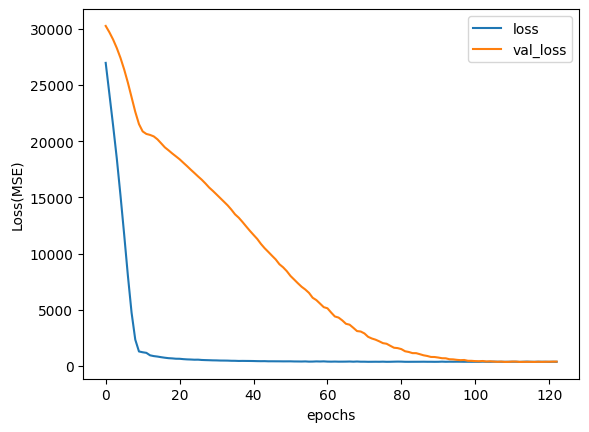

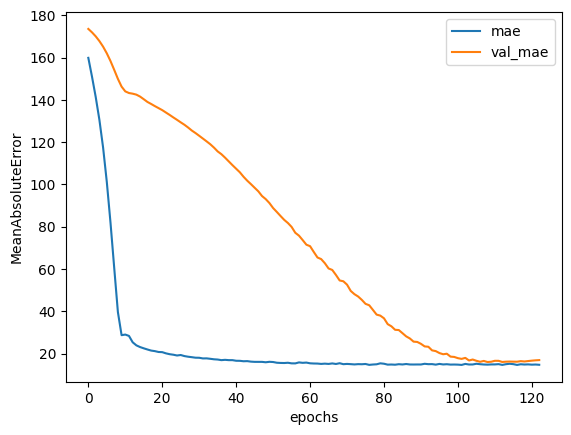

Best trial (test for office7):
  Value: 543.3518295288086
  Params: 
    activation: ELU
    batch_size: 64
    conv_layers_aircon: 3
    conv_layers_airvent: 3
    conv_layers_body: 2
    conv_layers_layout: 3
    dense_layers: 4
    dropout: None
    filters_aircon-0: 256
    filters_aircon-1: 192
    filters_aircon-2: 128
    filters_airvent-0: 96
    filters_airvent-1: 128
    filters_airvent-2: 224
    filters_body-0: 256
    filters_body-1: 64
    filters_layout-0: 224
    filters_layout-1: 160
    filters_layout-2: 192
    lr: 1.1257278546662467e-05
    units-0: 256
    units-1: 128
    units-2: 320
    units-3: 192


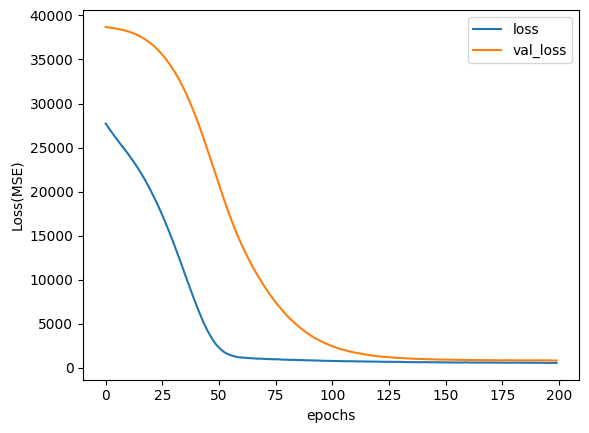

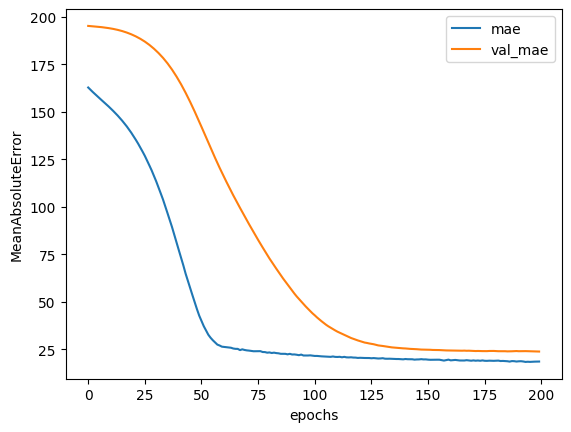

Best trial (test for office10):
  Value: 408.70652770996094
  Params: 
    activation: ELU
    batch_size: 32
    conv_layers_aircon: 2
    conv_layers_airvent: 2
    conv_layers_body: 3
    conv_layers_layout: 1
    dense_layers: 3
    dropout: None
    filters_aircon-0: 224
    filters_aircon-1: 224
    filters_airvent-0: 128
    filters_airvent-1: 64
    filters_body-0: 224
    filters_body-1: 96
    filters_body-2: 96
    filters_layout-0: 96
    lr: 2.259961164750641e-05
    units-0: 512
    units-1: 384
    units-2: 320


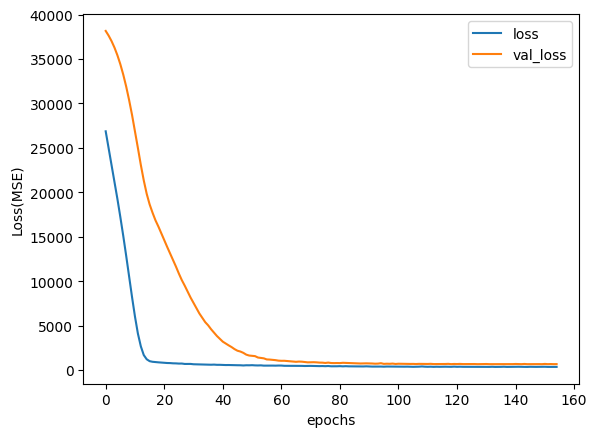

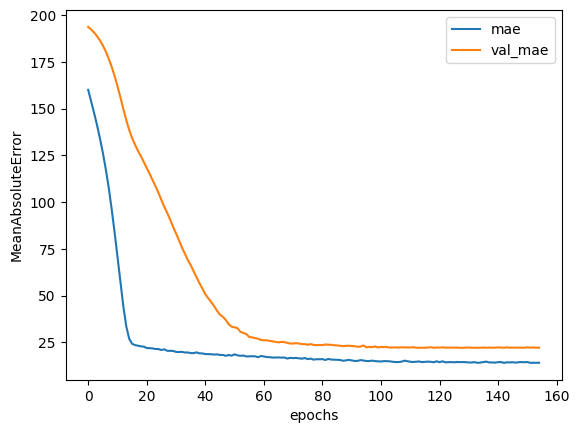

Best trial (test for office16):
  Value: 541.7028228759766
  Params: 
    activation: LeakyReLU
    batch_size: 64
    conv_layers_aircon: 1
    conv_layers_airvent: 3
    conv_layers_body: 2
    conv_layers_layout: 1
    dense_layers: 4
    dropout: None
    filters_aircon-0: 32
    filters_airvent-0: 192
    filters_airvent-1: 256
    filters_airvent-2: 96
    filters_body-0: 192
    filters_body-1: 128
    filters_layout-0: 160
    lr: 0.00017303353661973398
    units-0: 128
    units-1: 192
    units-2: 320
    units-3: 384


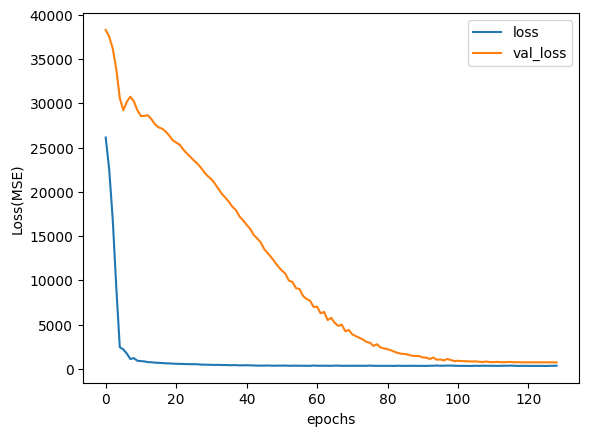

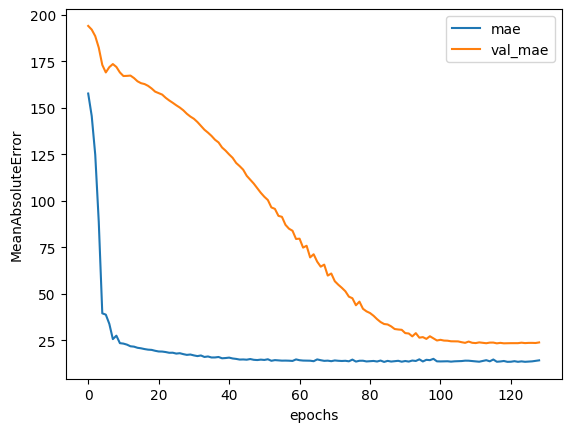

Best trial (test for office22):
  Value: 552.5176666259765
  Params: 
    activation: LeakyReLU
    batch_size: 32
    conv_layers_aircon: 3
    conv_layers_airvent: 1
    conv_layers_body: 3
    conv_layers_layout: 1
    dense_layers: 2
    dropout: 0.5
    filters_aircon-0: 32
    filters_aircon-1: 32
    filters_aircon-2: 128
    filters_airvent-0: 256
    filters_body-0: 32
    filters_body-1: 96
    filters_body-2: 160
    filters_layout-0: 224
    lr: 6.111377183013376e-05
    units-0: 320
    units-1: 256


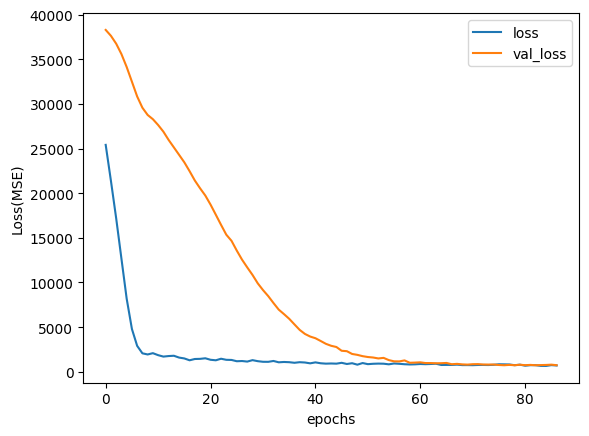

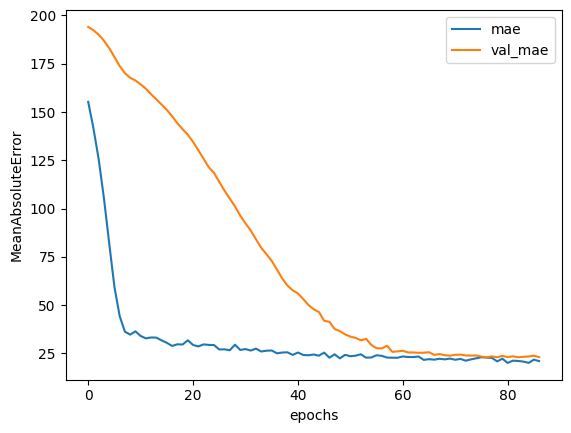

Best trial (test for office28):
  Value: 581.1790466308594
  Params: 
    batch_size: 64
    conv_layers_aircon: 1
    conv_layers_airvent: 1
    conv_layers_body: 3
    conv_layers_layout: 2
    dense_layers: 0
    filters_aircon-0: 256
    filters_airvent-0: 128
    filters_body-0: 160
    filters_body-1: 128
    filters_body-2: 32
    filters_layout-0: 64
    filters_layout-1: 96
    lr: 0.0005605830137360215


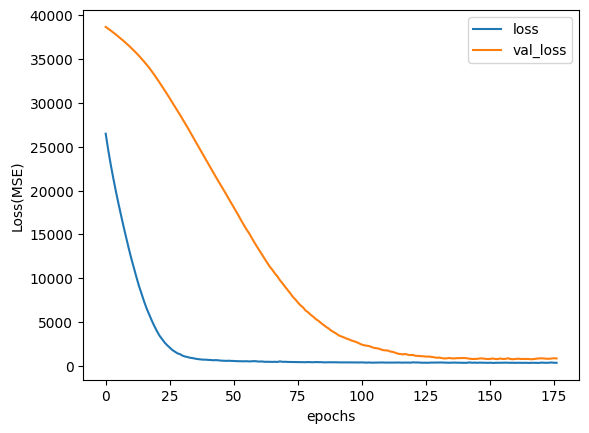

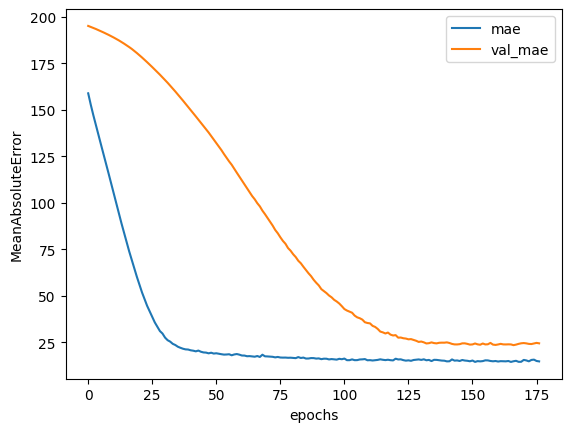

In [121]:
for test_office, result_dict in tuning_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
    plot_history(result_dict["history"].history)

In [122]:
"""
最終テスト
チューナーに与えなかったオフィスを使って検証
"""

# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

test_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=True)
    X_index_fit = X_index[fit_ID]
    
    X_dict_fit={}
    X_dict_test={}
    for key, X in X_dict.items():
        X_dict_fit[key], X_dict_test[key] = X_dict[key][fit_ID], X_dict[key][test_ID]
    
    y_fit, y_test = y[fit_ID], y[test_ID]
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)

    test_history = best_model.fit(
        X_dict_fit, y_fit,
        batch_size = loaded_study.best_params["batch_size"],
        epochs = 200,
        validation_data = (X_dict_test, y_test),
        # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
    )
    
    test_dict[test_office] = {"best_trial":best_trial, "history":test_history}


test_office: office1
Epoch 1/200
7/7 [==============================] - 4s 121ms/step - loss: 25396.1582 - mae: 155.3155 - val_loss: 38284.4180 - val_mae: 194.0956
Epoch 2/200
7/7 [==============================] - 0s 42ms/step - loss: 22560.6016 - mae: 146.0071 - val_loss: 37647.5312 - val_mae: 192.4480
Epoch 3/200
7/7 [==============================] - 0s 41ms/step - loss: 20155.2559 - mae: 137.5542 - val_loss: 36933.7188 - val_mae: 190.5845
Epoch 4/200
7/7 [==============================] - 0s 42ms/step - loss: 17569.1387 - mae: 127.8418 - val_loss: 36078.1328 - val_mae: 188.3264
Epoch 5/200
7/7 [==============================] - 0s 40ms/step - loss: 14632.3096 - mae: 115.7807 - val_loss: 35039.8945 - val_mae: 185.5494
Epoch 6/200
7/7 [==============================] - 0s 43ms/step - loss: 11306.4092 - mae: 100.2952 - val_loss: 33791.8125 - val_mae: 182.1550
Epoch 7/200
7/7 [==============================] - 0s 43ms/step - loss: 7745.6006 - mae: 80.9986 - val_loss: 32348.3906 - val_

Best trial (test for office1):
  Value: 386.8915054321289
  Params: 
    activation: ELU
    batch_size: 64
    conv_layers_aircon: 3
    conv_layers_airvent: 1
    conv_layers_body: 3
    conv_layers_layout: 1
    dense_layers: 3
    dropout: None
    filters_aircon-0: 32
    filters_aircon-1: 192
    filters_aircon-2: 224
    filters_airvent-0: 224
    filters_body-0: 256
    filters_body-1: 224
    filters_body-2: 192
    filters_layout-0: 64
    lr: 8.976107170262151e-05
    units-0: 320
    units-1: 256
    units-2: 128


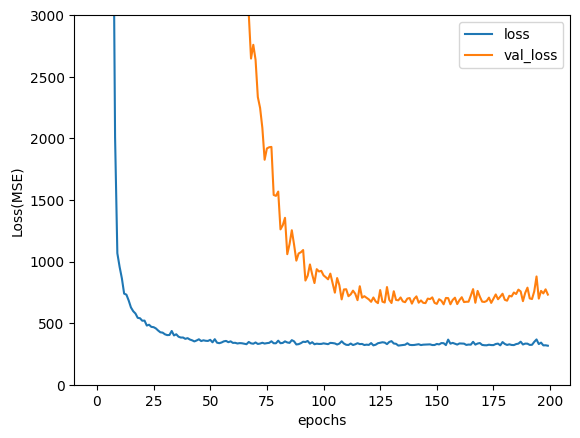

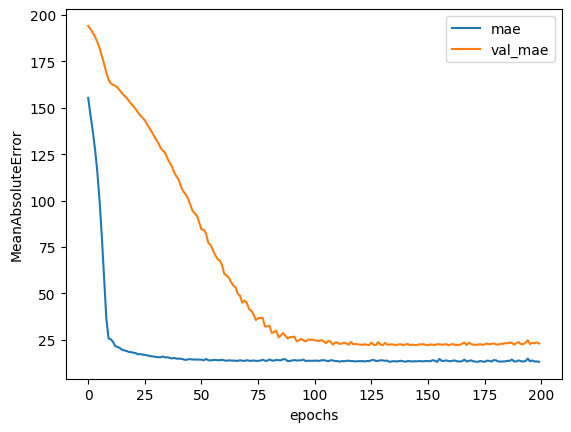

Best trial (test for office7):
  Value: 543.3518295288086
  Params: 
    activation: ELU
    batch_size: 64
    conv_layers_aircon: 3
    conv_layers_airvent: 3
    conv_layers_body: 2
    conv_layers_layout: 3
    dense_layers: 4
    dropout: None
    filters_aircon-0: 256
    filters_aircon-1: 192
    filters_aircon-2: 128
    filters_airvent-0: 96
    filters_airvent-1: 128
    filters_airvent-2: 224
    filters_body-0: 256
    filters_body-1: 64
    filters_layout-0: 224
    filters_layout-1: 160
    filters_layout-2: 192
    lr: 1.1257278546662467e-05
    units-0: 256
    units-1: 128
    units-2: 320
    units-3: 192


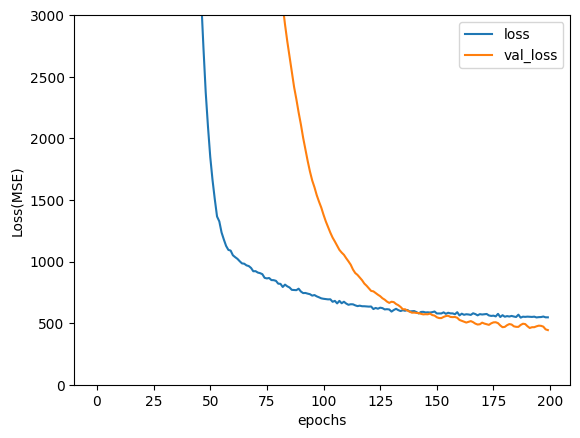

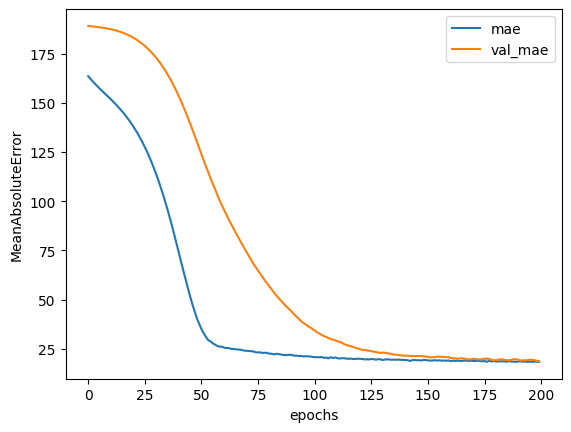

Best trial (test for office10):
  Value: 408.70652770996094
  Params: 
    activation: ELU
    batch_size: 32
    conv_layers_aircon: 2
    conv_layers_airvent: 2
    conv_layers_body: 3
    conv_layers_layout: 1
    dense_layers: 3
    dropout: None
    filters_aircon-0: 224
    filters_aircon-1: 224
    filters_airvent-0: 128
    filters_airvent-1: 64
    filters_body-0: 224
    filters_body-1: 96
    filters_body-2: 96
    filters_layout-0: 96
    lr: 2.259961164750641e-05
    units-0: 512
    units-1: 384
    units-2: 320


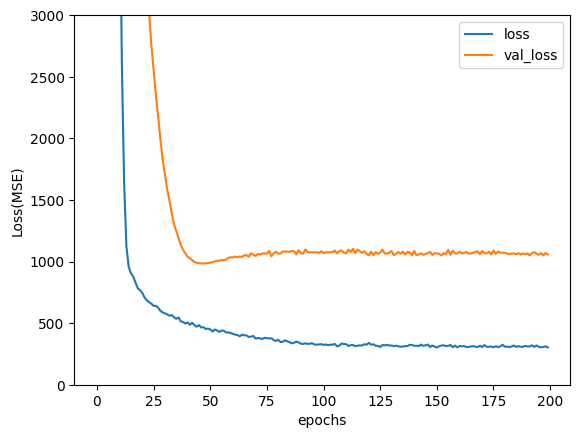

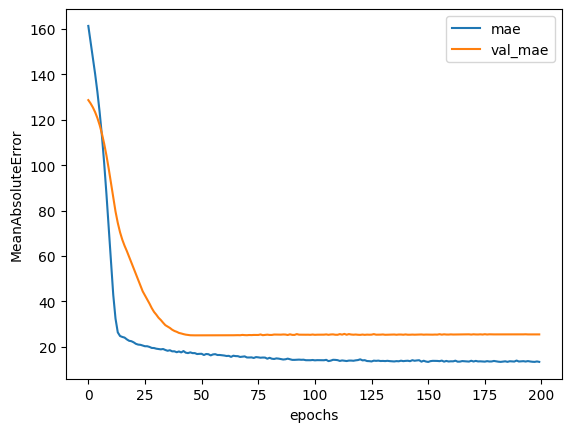

Best trial (test for office16):
  Value: 541.7028228759766
  Params: 
    activation: LeakyReLU
    batch_size: 64
    conv_layers_aircon: 1
    conv_layers_airvent: 3
    conv_layers_body: 2
    conv_layers_layout: 1
    dense_layers: 4
    dropout: None
    filters_aircon-0: 32
    filters_airvent-0: 192
    filters_airvent-1: 256
    filters_airvent-2: 96
    filters_body-0: 192
    filters_body-1: 128
    filters_layout-0: 160
    lr: 0.00017303353661973398
    units-0: 128
    units-1: 192
    units-2: 320
    units-3: 384


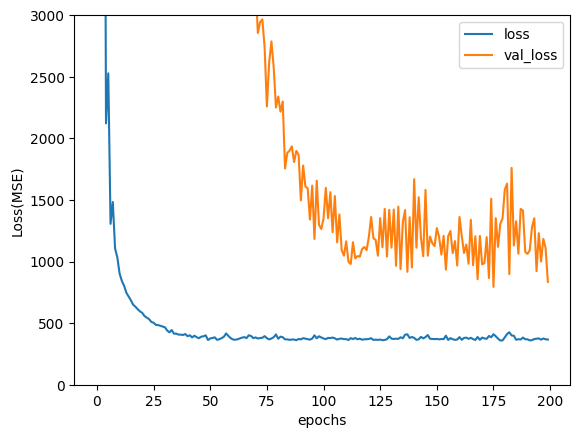

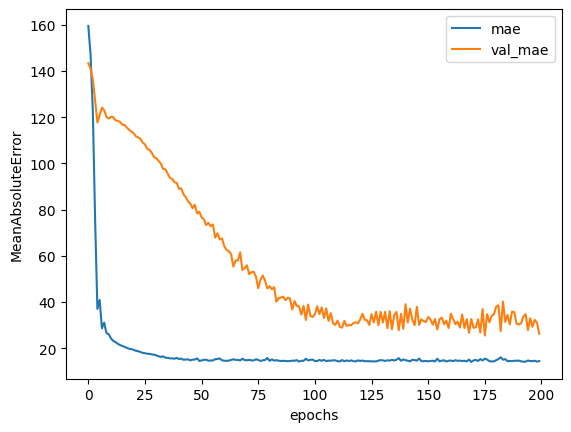

Best trial (test for office22):
  Value: 552.5176666259765
  Params: 
    activation: LeakyReLU
    batch_size: 32
    conv_layers_aircon: 3
    conv_layers_airvent: 1
    conv_layers_body: 3
    conv_layers_layout: 1
    dense_layers: 2
    dropout: 0.5
    filters_aircon-0: 32
    filters_aircon-1: 32
    filters_aircon-2: 128
    filters_airvent-0: 256
    filters_body-0: 32
    filters_body-1: 96
    filters_body-2: 160
    filters_layout-0: 224
    lr: 6.111377183013376e-05
    units-0: 320
    units-1: 256


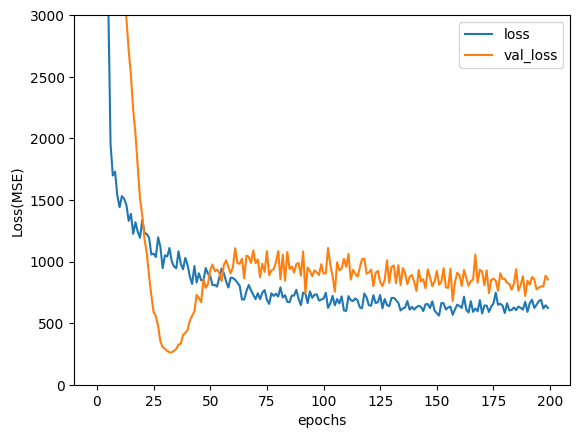

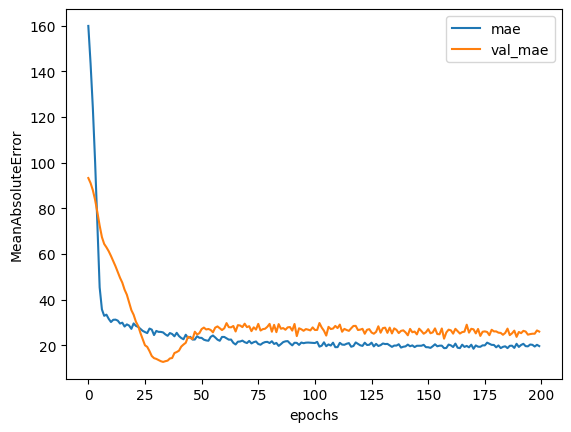

Best trial (test for office28):
  Value: 581.1790466308594
  Params: 
    batch_size: 64
    conv_layers_aircon: 1
    conv_layers_airvent: 1
    conv_layers_body: 3
    conv_layers_layout: 2
    dense_layers: 0
    filters_aircon-0: 256
    filters_airvent-0: 128
    filters_body-0: 160
    filters_body-1: 128
    filters_body-2: 32
    filters_layout-0: 64
    filters_layout-1: 96
    lr: 0.0005605830137360215


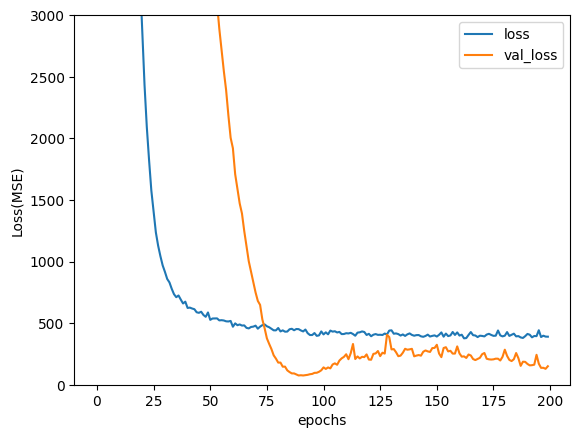

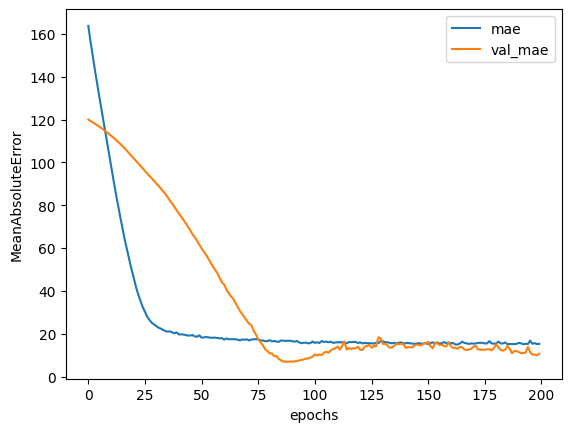

In [124]:
for test_office, result_dict in test_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
        
    plot_history(result_dict["history"].history, ymax=3000.)

test_office: office10
Epoch 1/200
7/7 [==============================] - 4s 112ms/step - loss: 27563.0527 - mae: 162.1791 - val_loss: 17636.4102 - val_mae: 129.0829
Epoch 2/200
7/7 [==============================] - 0s 33ms/step - loss: 24680.2363 - mae: 152.9875 - val_loss: 17243.6289 - val_mae: 127.5513
Epoch 3/200
7/7 [==============================] - 0s 34ms/step - loss: 22011.1465 - mae: 144.0097 - val_loss: 16794.3086 - val_mae: 125.7764
Epoch 4/200
7/7 [==============================] - 0s 35ms/step - loss: 19367.5762 - mae: 134.4280 - val_loss: 16269.9082 - val_mae: 123.6730
Epoch 5/200
7/7 [==============================] - 0s 34ms/step - loss: 16497.5430 - mae: 123.3929 - val_loss: 15657.9775 - val_mae: 121.1729
Epoch 6/200
7/7 [==============================] - 0s 32ms/step - loss: 13441.5654 - mae: 110.1514 - val_loss: 14935.7441 - val_mae: 118.1541
Epoch 7/200
7/7 [==============================] - 0s 41ms/step - loss: 10181.8008 - mae: 94.2362 - val_loss: 14104.9893 - va

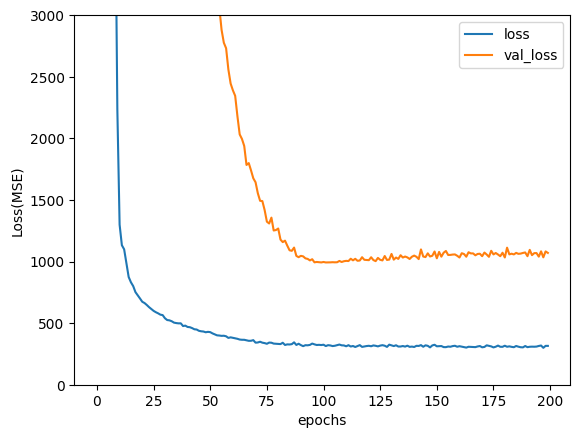

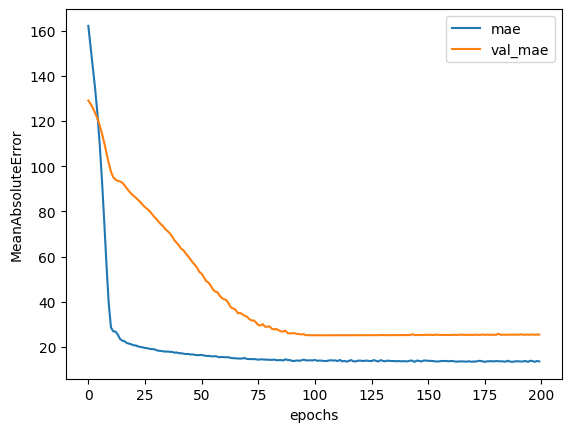

In [127]:
"""
最終テスト
only office10
"""

test_office="office10"

print("test_office:", test_office)
fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=True)
X_index_fit = X_index[fit_ID]

X_dict_fit={}
X_dict_test={}
for key, X in X_dict.items():
    X_dict_fit[key], X_dict_test[key] = X_dict[key][fit_ID], X_dict[key][test_ID]

y_fit, y_test = y[fit_ID], y[test_ID]

study_name = test_office + '_is_test'

loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial
best_model = total_model_builder(best_trial)

test_history = best_model.fit(
    X_dict_fit, y_fit,
    batch_size = loaded_study.best_params["batch_size"],
    epochs = 200,
    validation_data = (X_dict_test, y_test),
    # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
)

print("  Value: {}".format(best_trial.value))

print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

plot_history(test_history.history, ymax=3000.)

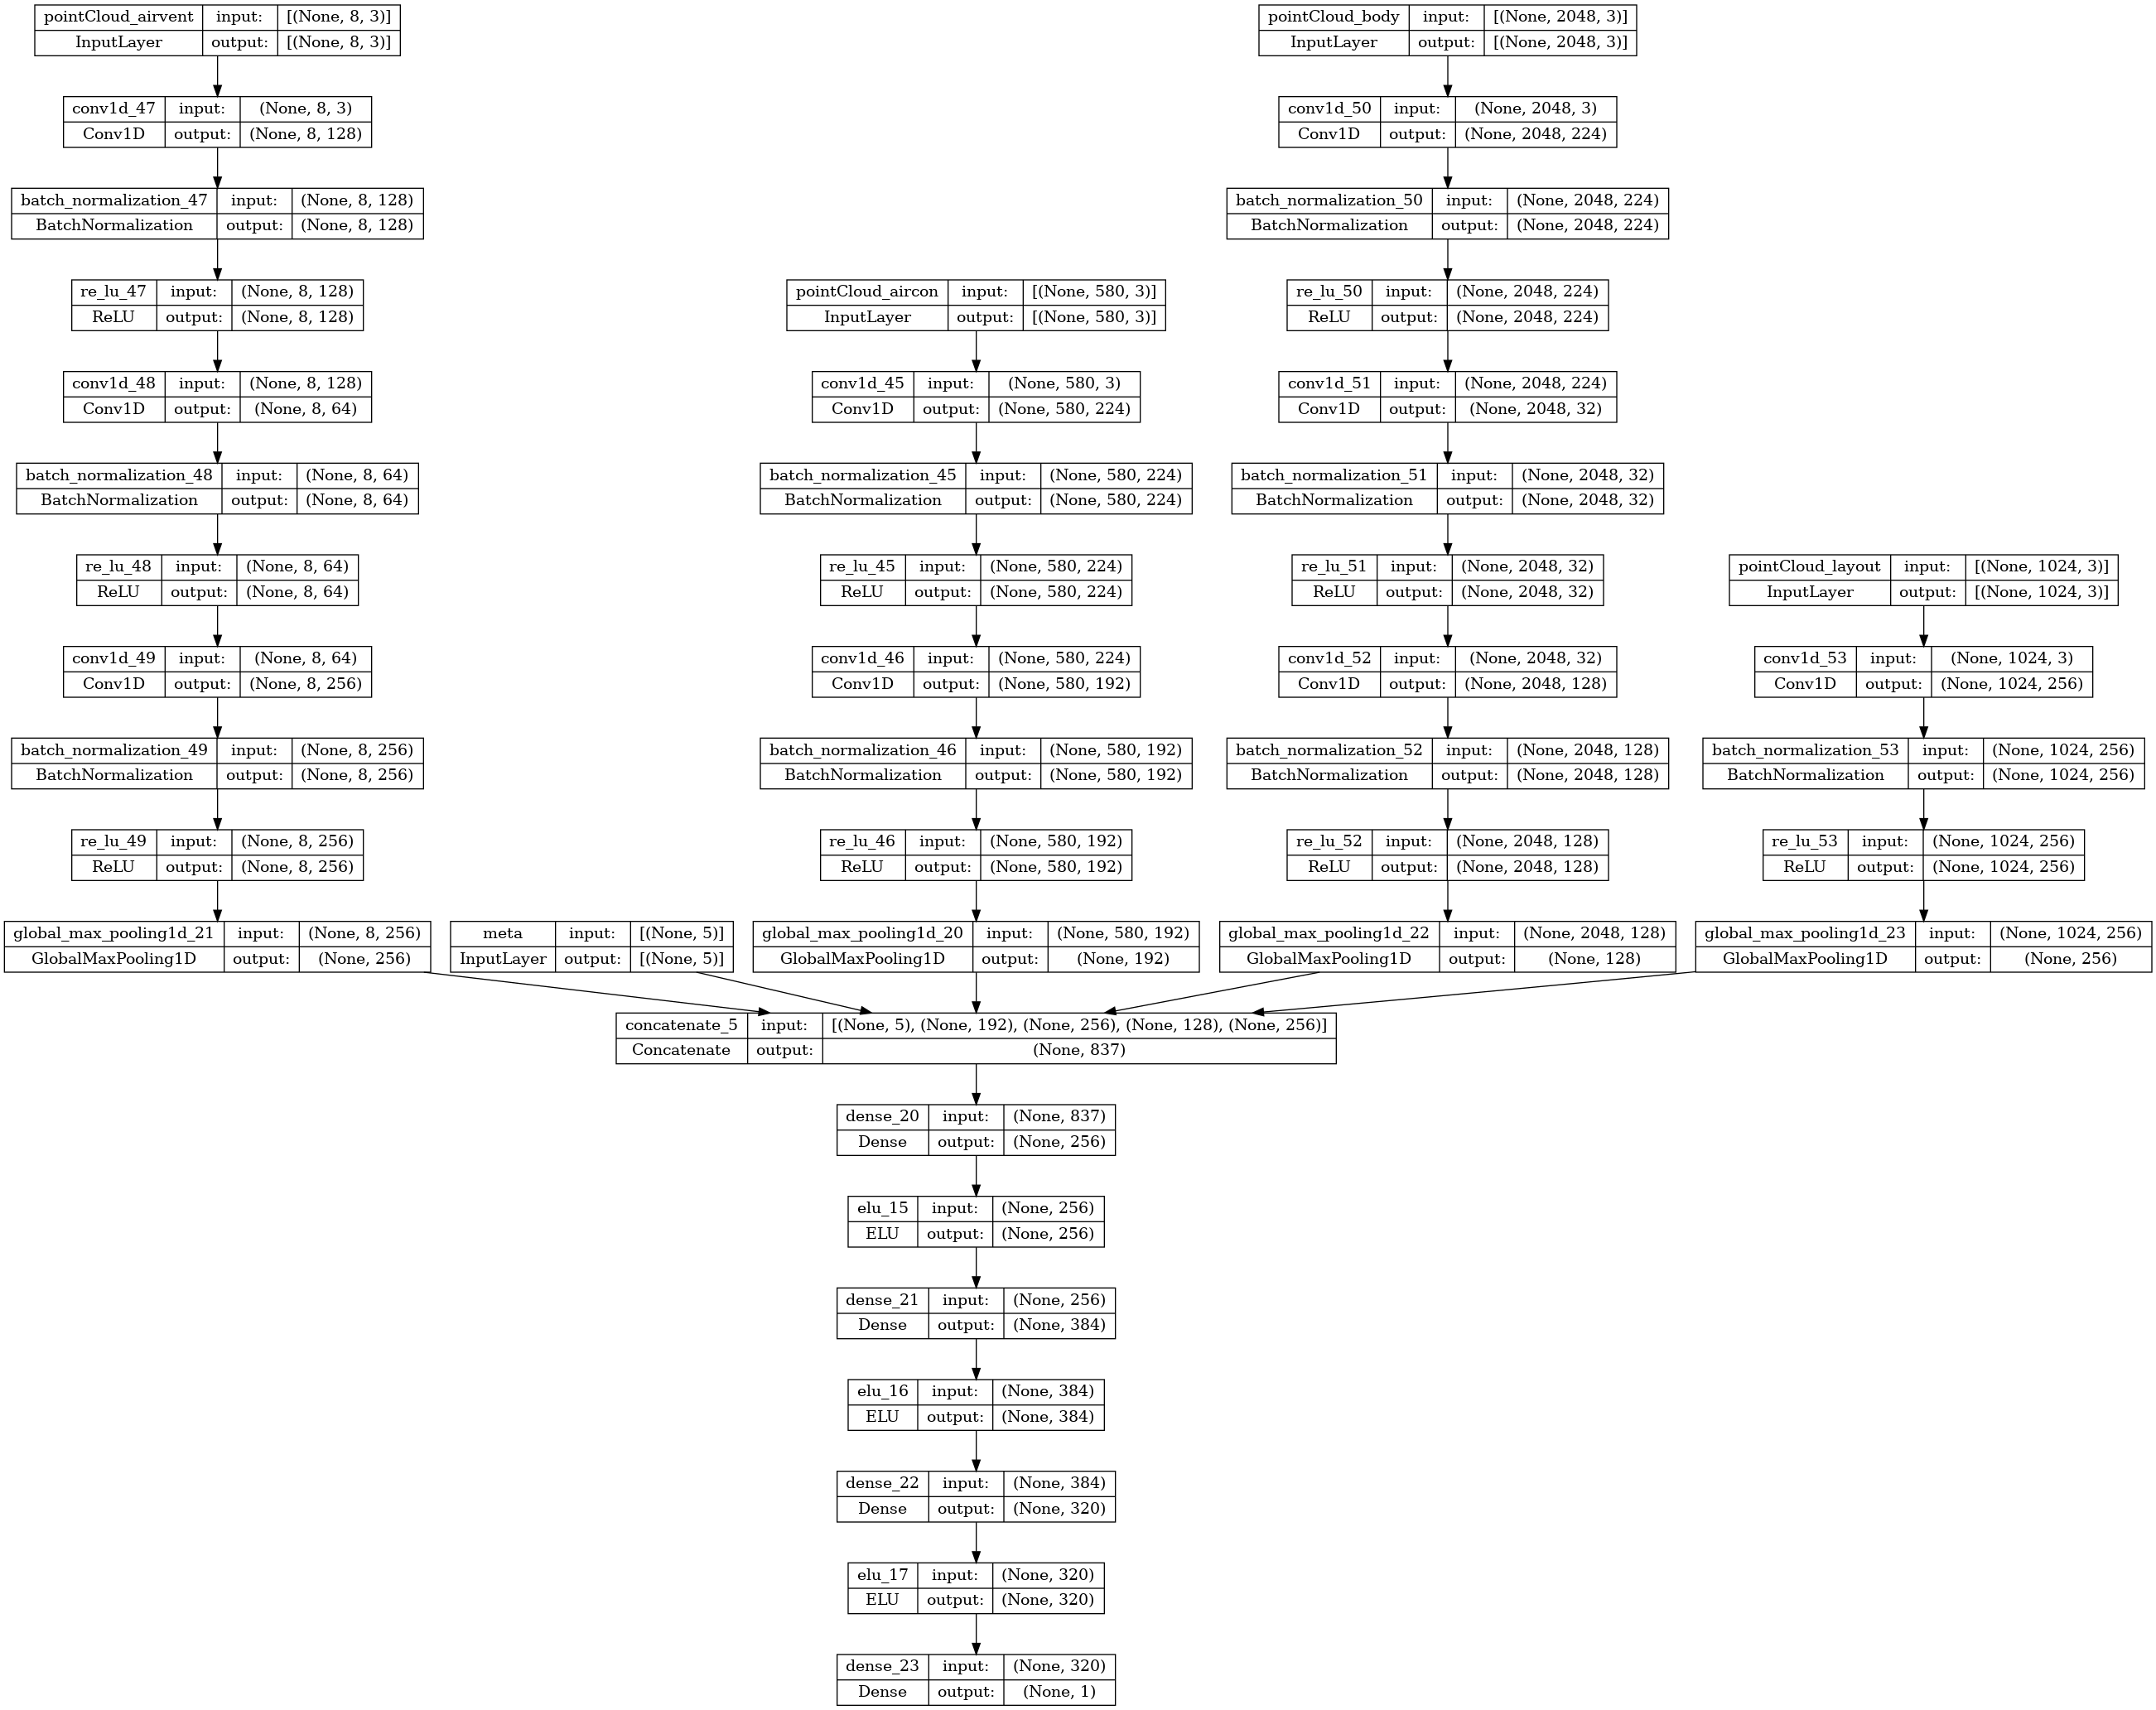

In [132]:
keras.utils.plot_model(best_model, show_shapes=True)

In [129]:
y_fit_pred = best_model.predict(X_dict_fit)
y_test_pred = best_model.predict(X_dict_test)

1/1 [==============================] - 0s 31ms/step


In [134]:
def show_office_residual_plot(train_x, train_y, test_x, test_y, office_array, figsize=[10, 8]):
    xlim = [min(min(train_x), min(test_x))-5, max(max(train_x), max(test_x))+5]
    fig= plt.figure(figsize=figsize)

    plt.figure(figsize=[10, 8])

    #カラーマップ等の準備
    markers = ("s", "x", "o", "^", "v", "<", ">", "1", "2", "3", "4", "8")
    colors = ("red", "blue", "limegreen", "gray", "cyan", "black", "purple", "green",
              "orange", "yellow", "crimson", "goldenrod", "orchid", "khaki", "darkgray")

    idx = 0
    for target_office_name in np.unique(office_list):
        if target_office_name == "office10":
            continue
            
        target_office_index = [i for i in range(len(office_array)) if target_office_name in  office_array[i]+'_']
        plt.scatter(train_x[target_office_index], train_y[target_office_index], 
                    s=80, c=colors[idx], marker=markers[2], edgecolor="white", label="Training:"+target_office_name)
        
        idx+=1
        
    plt.scatter(test_x, test_y, s=80, c="steelblue", marker="x", edgecolor="white", label="Test data")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.legend(loc="best")
    plt.hlines(y=0, xmin=xlim[0], xmax=xlim[1], color="black", lw=2)
    plt.xlim(xlim)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_3403424/2292935587.py:23: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(test_x, test_y, s=80, c="steelblue", marker="x", edgecolor="white", label="Test data")


<Figure size 1000x800 with 0 Axes>

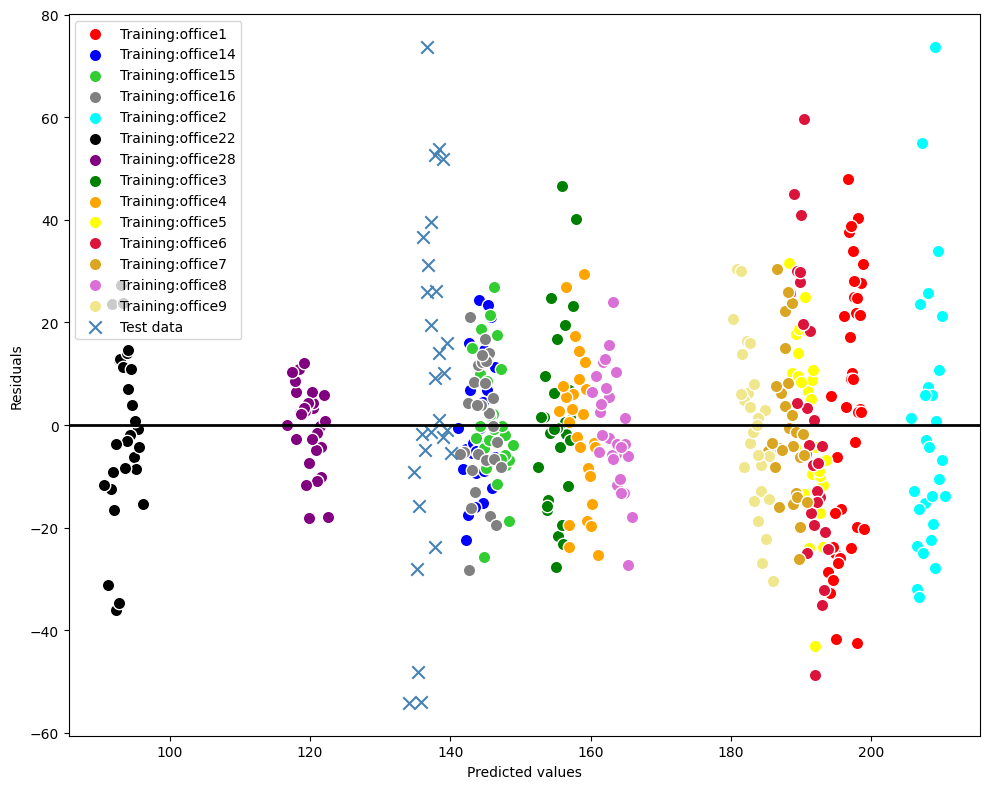

In [135]:
# #正規表現で書いており、.extractはパターンにマッチした最初の文字列のみを抜き出す。office+0-9までの数字1桁または2桁を探索
# office_array = X_index.str.extract("(office+[0-9]{1,2})").to_numpy()

#残差プロット
show_office_residual_plot(train_x=y_fit_pred, train_y=y_fit_pred - y_fit.reshape((-1,1)), 
                            test_x=y_test_pred, test_y=y_test_pred - y_test.reshape((-1,1)), 
                            office_array=X_index_fit
                                  )

In [133]:
X_dict_fit

{'meta': array([[-1.38455178,  1.2655225 , -0.87131147,  1.14769521, -0.39824886],
        [ 1.27873108,  1.2655225 ,  1.14769521, -0.87131147, -0.39824886],
        [-1.38455178,  1.2655225 ,  1.14769521, -0.87131147, -0.39824886],
        ...,
        [ 0.44645519,  1.2655225 , -0.87131147,  1.14769521, -0.39824886],
        [ 1.27873108, -0.68946029, -0.87131147,  1.14769521, -0.39824886],
        [ 0.44645519, -1.66695169, -0.87131147, -0.87131147,  2.51099278]]),
 'pointCloud_aircon': array([[[ 1.3765091 , -2.0106473 , -0.52029866],
         [ 1.3765091 , -1.8412895 , -0.52029866],
         [ 1.3765091 , -1.7396748 , -0.52029866],
         ...,
         [ 2.7313716 , -0.92675734, -0.52029866],
         [ 2.7313716 , -0.8251426 , -0.52029866],
         [ 2.7313716 , -0.6557848 , -0.52029866]],
 
        [[-0.6557848 , -0.99450046, -0.52029866],
         [-0.6557848 , -0.8251426 , -0.52029866],
         [-0.6557848 , -0.72352785, -0.52029866],
         ...,
         [ 0.6990778 ,  0

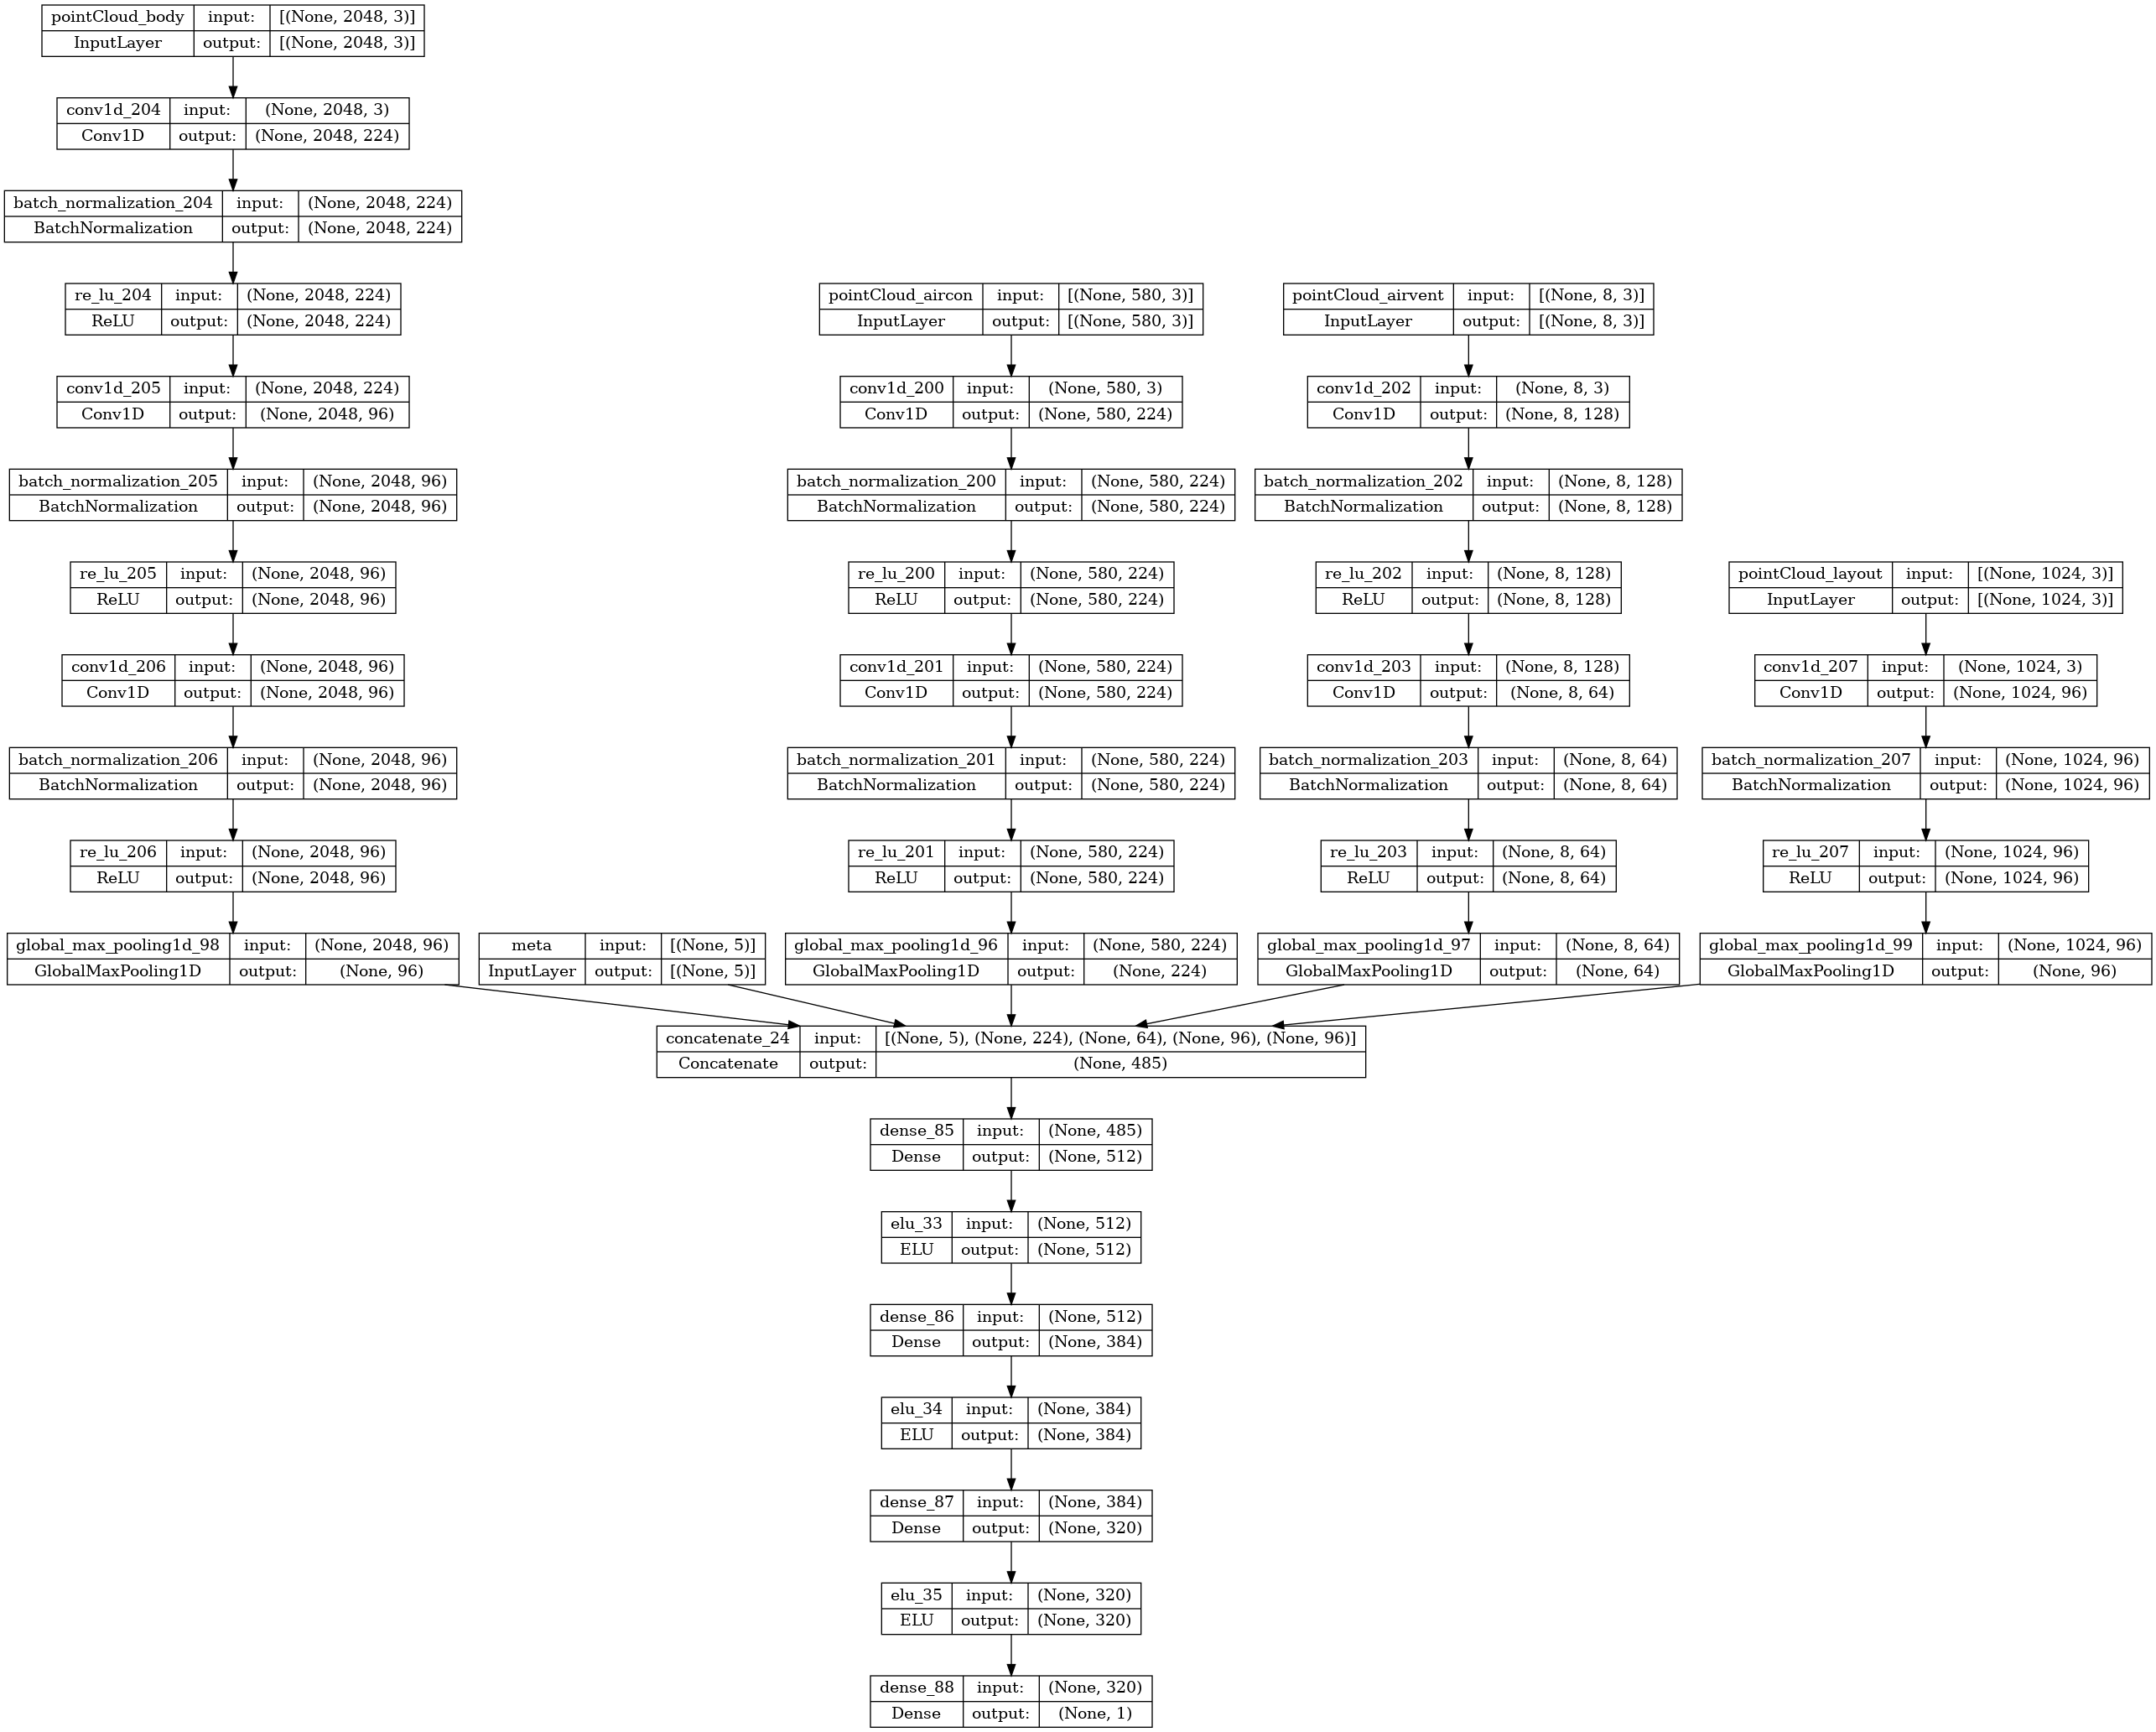

In [125]:
best_trial = test_dict["office10"]["best_trial"]

keras.utils.plot_model(total_model_builder(best_trial), show_shapes=True)

In [137]:
import gc
 
gc.collect()

38460

In [136]:
from keras.backend import clear_session

# Clear clutter from previous Keras session graphs.
clear_session()